# Applied Deep Learning

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
# sns.set(style="darkgrid")
np.random.seed(786)
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import pandas as pd


### Production Values Kenya

In [2]:
df_prod = pd.read_excel("D:\\kulea_projects\\r_project\\east_south_sugar\\Uganda.xlsx", sheet_name='Uganda', skiprows=1)
df_prod.head()

Crop Year  Year      Month  Opening Stock  Production  Bagged VHP Prod  \
0       2009  2009 2009-01-01      42.000000      20.000           20.000   
1       2009  2009 2009-02-01      36.978657      20.000           20.000   
2       2009  2009 2009-03-01      31.957314      20.000           20.000   
3       2009  2009 2009-04-01      38.935971      24.166           24.166   
4       2009  2009 2009-05-01      38.080628      24.166           24.166   

   High-Quality White Prod  Consumption  Bagged VHP Cons  \
0                      NaN    29.221343        22.471343   
1                      NaN    29.221343        22.471343   
2                      NaN    29.221343        22.471343   
3                      NaN    29.221343        22.471343   
4                      NaN    29.221343        22.471343   

   High-Quality(White) Cons  ...  HQW imp from Egypt  HQW imp from Thailand  \
0                      6.75  ...                 NaN                    NaN   
1                      6.75  ...                 NaN                    NaN   
2                      6.75  ...                 NaN                   12.0   
3                      6.75  ...                 NaN                    NaN   
4                      6.75  ...                 NaN                    NaN   

   HQW imp from others  HQW imp from Dubai  HQW imp from  saudi  \
0                  NaN                 1.6                  NaN   
1                  NaN                 1.6                  NaN   
2                  NaN                 1.6                  NaN   
3                  NaN                 1.6                  NaN   
4                  NaN                 1.6                  NaN   

   HQW imp from India  Bagged VHP Imp  VHP import from Brazil  \
0                 2.4             0.2                     0.2   
1                 2.4             0.2                     0.2   
2                 2.4             0.2                     0.2   
3                 2.4             0.2                     0.2   
4                 2.4             0.2                     0.2   

   VHP import from Kenya  Closing Stock  
0                    NaN      36.978657  
1                    NaN      31.957314  
2                    NaN      38.935971  
3                    NaN      38.080628  
4                    NaN      37.225285  

[5 rows x 33 columns]

In [3]:
new_df = df_prod[['Year', 'Month', 'Production']]
new_df.head(3)

Year      Month  Production
0  2009 2009-01-01        20.0
1  2009 2009-02-01        20.0
2  2009 2009-03-01        20.0

In [4]:
new_df.duplicated(keep=False).sum()

0

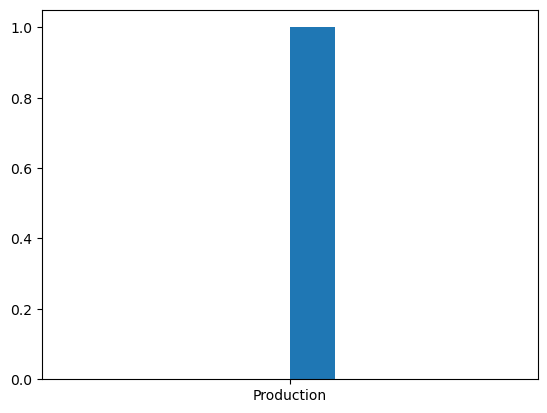

In [5]:
fig, ax = plt.subplots()
ax.hist(['Production']);

In [6]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Crop Year                             204 non-null    int64         
 1   Year                                  204 non-null    int64         
 2   Month                                 204 non-null    datetime64[ns]
 3   Opening Stock                         204 non-null    float64       
 4   Production                            204 non-null    float64       
 5   Bagged VHP Prod                       204 non-null    float64       
 6   High-Quality White Prod               60 non-null     float64       
 7   Consumption                           204 non-null    float64       
 8   Bagged VHP Cons                       204 non-null    float64       
 9   High-Quality(White) Cons              204 non-null    float64       
 10  Ex

In [7]:
new_df_prod = df_prod[['Month', 'Production']]
new_df_prod.head()

Month  Production
0 2009-01-01      20.000
1 2009-02-01      20.000
2 2009-03-01      20.000
3 2009-04-01      24.166
4 2009-05-01      24.166

In [8]:
new_df_prod.tail()

Month  Production
199 2025-08-01     40.4166
200 2025-09-01     42.4166
201 2025-10-01     52.4166
202 2025-11-01     53.4166
203 2025-12-01     49.4166

In [9]:
new_df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       204 non-null    datetime64[ns]
 1   Production  204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [10]:
# Set the desired float formatting
pd.options.display.float_format = '{:.2f}'.format

# Reset the float formatting to default
pd.options.display.float_format = None

new_df_prod['Year'] = new_df_prod['Month'].dt.year
new_df_prod.head(3)

# Calculate mean values for each year
yearly_statistics = new_df_prod.groupby('Year')['Production'].describe().apply(lambda x: x.apply('{:.2f}'.format))

yearly_statistics



count   mean    std    min    25%    50%    75%    max
Year                                                        
2009  12.00  22.87   1.93  20.00  20.87  24.17  24.17  24.17
2010  12.00  24.79   0.38  24.17  24.79  25.00  25.00  25.00
2011  12.00  22.70   1.56  21.66  21.66  21.66  24.37  25.00
2012  12.00  24.83   1.50  24.00  24.12  24.17  24.37  28.00
2013  12.00  27.91   2.26  24.17  27.91  29.16  29.16  29.16
2014  12.00  36.50   0.37  36.00  36.38  36.50  36.62  37.00
2015  12.00  34.91   1.34  32.00  34.92  34.92  35.31  36.50
2016  12.00  32.70   9.59  12.90  33.50  35.41  38.50  40.00
2017  12.00  30.42   8.88  12.00  31.50  32.75  35.50  37.00
2018  12.00  35.92  10.80  13.00  39.25  40.00  42.00  42.00
2019  12.00  42.83  11.65  18.00  47.00  47.00  48.00  50.00
2020  12.00  44.25   6.15  28.00  41.50  47.00  47.25  50.00
2021  12.00  51.83   6.31  40.00  49.88  53.00  55.75  59.00
2022  12.00  50.83   6.76  39.92  46.67  51.42  55.42  61.92
2023  12.00  36.67   3.58  34.33  34.33  34.33  37.58  44.33
2024  12.00  43.42   3.58  37.83  41.58  44.83  45.08  47.83
2025  12.00  47.42   6.03  40.42  40.42  49.42  52.67  54.42


## Time-Series Forecast of Wholesale Sugar Prices Nairobi


In [11]:
df = pd.read_excel("D:\\kulea_projects\\r_project\\east_south_sugar\\Wholesale Sugar Prices.xlsx")


In [12]:
df.head(30)

date  kampala  mombasa  nairobi  dar_es_salaam  kigali  durban  \
0  2019-08-22      NaN    786.0    805.0            NaN     NaN     NaN   
1  2019-08-26      NaN    786.0    805.0            NaN     NaN     NaN   
2  2019-08-29      NaN    786.0    805.0            NaN     NaN     NaN   
3  2019-09-02      NaN    776.0    786.0            NaN     NaN     NaN   
4  2019-09-05      NaN    766.0    790.0            NaN     NaN     NaN   
5  2019-09-09      NaN    760.0    785.0            NaN     NaN     NaN   
6  2019-09-12      NaN    765.0    785.0            NaN     NaN   626.0   
7  2019-09-16      NaN    765.0    785.0            NaN     NaN   638.0   
8  2019-09-19      NaN    748.0    775.0            NaN     NaN   643.0   
9  2019-09-23      NaN    742.0    767.0            NaN     NaN   643.0   
10 2019-09-26      NaN    748.0    767.0            NaN     NaN   643.0   
11 2019-09-30      NaN    755.0    780.0            NaN     NaN   643.0   
12 2019-10-03      NaN    780.0    785.0            NaN     NaN   660.0   
13 2019-10-07      NaN    782.0    786.0            NaN     NaN   645.0   
14 2019-10-10      NaN    780.0    789.0            NaN     NaN   645.0   
15 2019-10-14      NaN    785.0    792.0            NaN     NaN   651.0   
16 2019-10-17      NaN    785.0    792.0            NaN     NaN   651.0   
17 2019-10-21      NaN    785.0    792.0            NaN     NaN   675.0   
18 2019-10-24      NaN    769.0    765.0            NaN     NaN   675.0   
19 2019-10-29      NaN    769.0    765.0            NaN     NaN   675.0   
20 2019-11-01      NaN    773.0    782.0            NaN     NaN   675.0   
21 2019-11-05      NaN    783.0    782.0            NaN     NaN   675.0   
22 2019-11-08      NaN    809.0    829.0            NaN     NaN   675.0   
23 2019-11-12      NaN    809.0    812.0            NaN     NaN   707.0   
24 2019-11-15      NaN    809.0    812.0            NaN     NaN   707.0   
25 2019-11-19      NaN    824.0    844.0          680.0   731.0   707.0   
26 2019-11-22      NaN    824.0    844.0          680.0   731.0   707.0   
27 2019-11-26      NaN    823.0    840.0          680.0   731.0   710.0   
28 2019-11-29      NaN    825.0    845.0          680.0   710.0   710.0   
29 2019-12-03      NaN    878.0    887.0          680.0   710.0   710.0   

    cape_town  johannesburg  mogadishu w  djibouti b  berbera w  juba w  \
0         NaN           NaN          NaN         NaN        NaN     NaN   
1         NaN           NaN          NaN         NaN        NaN     NaN   
2         NaN           NaN          NaN         NaN        NaN     NaN   
3         NaN           NaN          NaN         NaN        NaN     NaN   
4         NaN           NaN          NaN         NaN        NaN     NaN   
5         NaN           NaN          NaN         NaN        NaN     NaN   
6       632.0         632.0          NaN         NaN        NaN     NaN   
7       652.0         672.0          NaN         NaN        NaN     NaN   
8       657.0         677.0          NaN         NaN        NaN     NaN   
9       657.0         677.0          NaN         NaN        NaN     NaN   
10      657.0         677.0          NaN         NaN        NaN     NaN   
11      657.0         677.0          NaN         NaN        NaN     NaN   
12      685.0         677.0          NaN         NaN        NaN     NaN   
13      675.0         660.0          NaN         NaN        NaN     NaN   
14      675.0         660.0          NaN         NaN        NaN     NaN   
15      686.0         672.0          NaN         NaN        NaN     NaN   
16      686.0         672.0          NaN         NaN        NaN     NaN   
17      737.0         693.0          NaN         NaN        NaN     NaN   
18      737.0         693.0          NaN         NaN        NaN     NaN   
19      737.0         693.0          NaN         NaN        NaN     NaN   
20      737.0         693.0          NaN         NaN        NaN     NaN   
21      737.0         693.0      

In [13]:
data = df[['date', 'kampala']]
data.head()

date  kampala
0 2019-08-22      NaN
1 2019-08-26      NaN
2 2019-08-29      NaN
3 2019-09-02      NaN
4 2019-09-05      NaN

In [14]:
data.tail()

date  kampala
473 2024-01-26   1000.0
474 2024-01-30   1000.0
475 2024-02-02    964.0
476 2024-02-06    964.0
477 2024-02-09    964.0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     478 non-null    datetime64[ns]
 1   kampala  424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [16]:
data.dropna(inplace=True)
data.head()

date  kampala
44 2020-01-24    723.0
45 2020-01-28    723.0
46 2020-01-31    723.0
47 2020-02-04    723.0
48 2020-02-07    723.0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 44 to 477
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     424 non-null    datetime64[ns]
 1   kampala  424 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.9 KB


In [18]:
data.describe()

kampala
count   424.000000
mean    916.443396
std     206.567012
min     679.000000
25%     738.000000
50%     856.000000
75%    1079.000000
max    1326.000000

In [19]:
df['Year'] = df['date'].dt.year
df.head(3)

# Calculate mean values for each year
yearly_statistics = df.groupby('Year')['kampala'].describe()
yearly_statistics

count         mean         std    min     25%     50%     75%     max
Year                                                                       
2019    0.0          NaN         NaN    NaN     NaN     NaN     NaN     NaN
2020   98.0   747.102041   22.686792  684.0   723.0   752.0   766.0   794.0
2021  105.0   741.485714   40.081195  679.0   720.0   738.0   743.0   879.0
2022  103.0   941.106796  102.495042  725.0   869.0   891.0  1035.0  1149.0
2023  106.0  1201.509434  118.094171  980.0  1099.0  1218.0  1326.0  1326.0
2024   12.0  1100.500000  131.117227  964.0   991.0  1056.0  1235.0  1287.0

In [20]:
data['Year'] = data['date'].dt.year
data.head(3)

# Calculate mean values for each year
yearly_statistics = data.groupby('Year')['kampala'].describe()
yearly_statistics

count         mean         std    min     25%     50%     75%     max
Year                                                                       
2020   98.0   747.102041   22.686792  684.0   723.0   752.0   766.0   794.0
2021  105.0   741.485714   40.081195  679.0   720.0   738.0   743.0   879.0
2022  103.0   941.106796  102.495042  725.0   869.0   891.0  1035.0  1149.0
2023  106.0  1201.509434  118.094171  980.0  1099.0  1218.0  1326.0  1326.0
2024   12.0  1100.500000  131.117227  964.0   991.0  1056.0  1235.0  1287.0

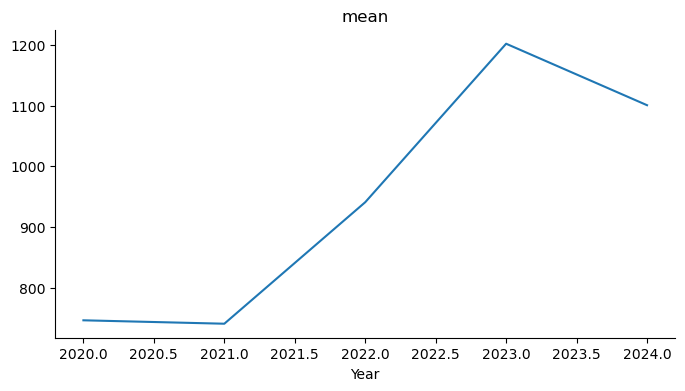

In [21]:
from matplotlib import pyplot as plt
yearly_statistics['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
data.tail(15)

date  kampala  Year
463 2023-12-22   1326.0  2023
464 2023-12-26   1326.0  2023
465 2023-12-29   1326.0  2023
466 2024-01-02   1287.0  2024
467 2024-01-05   1287.0  2024
468 2024-01-09   1235.0  2024
469 2024-01-12   1235.0  2024
470 2024-01-16   1158.0  2024
471 2024-01-19   1056.0  2024
472 2024-01-23   1056.0  2024
473 2024-01-26   1000.0  2024
474 2024-01-30   1000.0  2024
475 2024-02-02    964.0  2024
476 2024-02-06    964.0  2024
477 2024-02-09    964.0  2024

In [23]:
# Select relevant columns and rename them to 'ds' and 'y'
data = df[['date', 'kampala']].rename(columns={'date': 'ds', 'nairobi': 'y'})
data.dropna(inplace=True)

In [24]:
data.head()

ds  kampala
44 2020-01-24    723.0
45 2020-01-28    723.0
46 2020-01-31    723.0
47 2020-02-04    723.0
48 2020-02-07    723.0

In [25]:
data['ds']

44    2020-01-24
45    2020-01-28
46    2020-01-31
47    2020-02-04
48    2020-02-07
         ...    
473   2024-01-26
474   2024-01-30
475   2024-02-02
476   2024-02-06
477   2024-02-09
Name: ds, Length: 424, dtype: datetime64[ns]

In [26]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'yearly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Yearly seasonality exists.")
else:
    print("No yearly seasonality.")


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [27]:
import matplotlib.pyplot as plt

# Initialize Prophet model with weekly seasonality
model = Prophet(weekly_seasonality=True)

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'yearly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Yearly seasonality exists.")

    # Plot components of the model
    components_fig = model.plot_components(model.predict(data))

    # Customize the plot to include weekly seasonality
    for ax in components_fig.axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('Component')
        ax.legend(['Yearly', 'Weekly'])

    plt.show()
else:
    print("No yearly seasonality.")


AttributeError: 'Prophet' object has no attribute 'stan_backend'

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1106f9q/2j2wywmd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1106f9q/tnk1v33s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83563', 'data', 'file=/tmp/tmpw1106f9q/2j2wywmd.json', 'init=/tmp/tmpw1106f9q/tnk1v33s.json', 'output', 'file=/tmp/tmpw1106f9q/prophet_modelebep4_jk/prophet_model-20240321094520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:45:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:45:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Yearly seasonality exists.


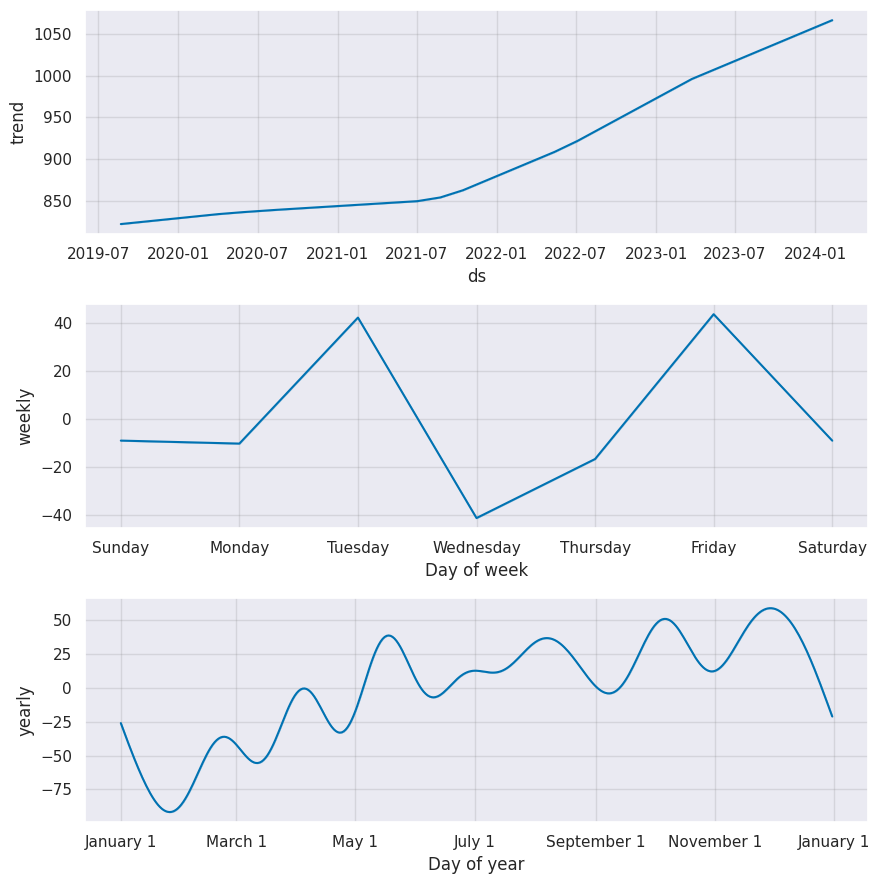

In [ ]:
import matplotlib.pyplot as plt

# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'yearly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Yearly seasonality exists.")

     # Plot components of the model
    components_fig = model.plot_components(model.predict(data))
    plt.show()
else:
    print("No yearly seasonality.")


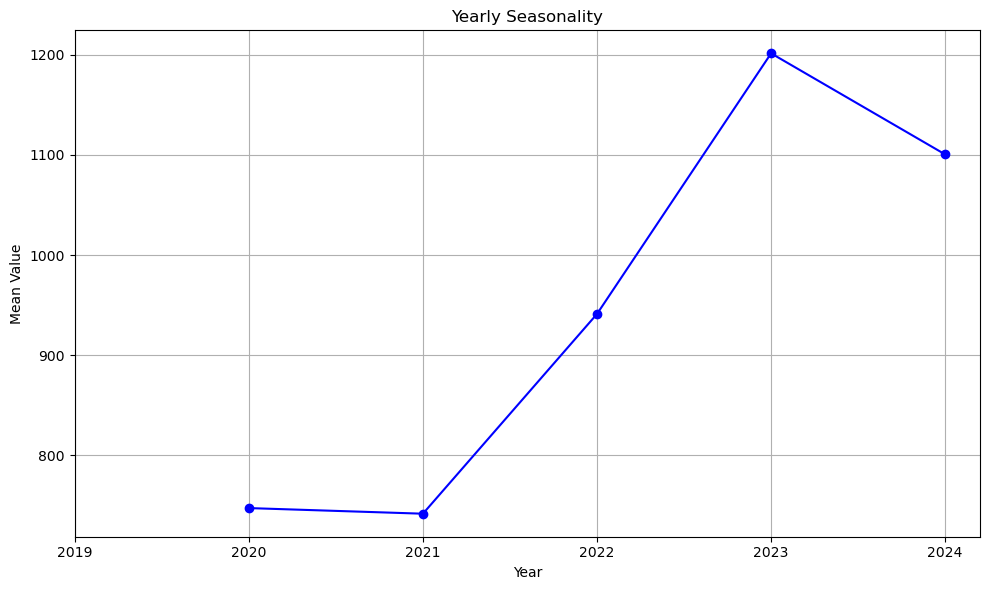

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Generate sample df
# np.random.seed(0)
# dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
# values = np.random.rand(len(dates))

# Create a DataFrame
# df = pd.DataFrame({'Date': dates, 'Value': values})
df['Year'] = df['date'].dt.year
df.head(3)

# Calculate mean values for each year
yearly_mean = df.groupby('Year')['kampala'].mean()

# Plot the yearly seasonality
plt.figure(figsize=(10, 6))
yearly_mean.plot(marker='o', color='blue')
plt.title('Yearly Seasonality')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.grid(True)
plt.xticks(yearly_mean.index)
plt.tight_layout()
plt.show()


In [31]:
yearly_mean

Year
2019            NaN
2020     747.102041
2021     741.485714
2022     941.106796
2023    1201.509434
2024    1100.500000
Name: kampala, dtype: float64

In [32]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'weekly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Weekly seasonality exists.")
else:
    print("No weekly seasonality.")


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'daily' in model.seasonalities.keys()

if yearly_seasonality:
    print("Daily seasonality exists.")
else:
    print("No daily seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/nw3x3je7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/vazdnos9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69897', 'data', 'file=/tmp/tmpqsjtg3d6/nw3x3je7.json', 'init=/tmp/tmpqsjtg3d6/vazdnos9.json', 'output', 'file=/tmp/tmpqsjtg3d6/prophet_modeldugx_uqg/prophet_model-20240311112922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


No daily seasonality.


In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'monthly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Monthly seasonality exists.")
else:
    print("No monthly seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/ipd4ppbs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/xgplqcr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59886', 'data', 'file=/tmp/tmpqsjtg3d6/ipd4ppbs.json', 'init=/tmp/tmpqsjtg3d6/xgplqcr6.json', 'output', 'file=/tmp/tmpqsjtg3d6/prophet_modelwsyddzr1/prophet_model-20240311112927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


No monthly seasonality.


In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'quarterly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Quarterly seasonality exists.")
else:
    print("No quarterly seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/683975qb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/p8hhhogh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19749', 'data', 'file=/tmp/tmpqsjtg3d6/683975qb.json', 'init=/tmp/tmpqsjtg3d6/p8hhhogh.json', 'output', 'file=/tmp/tmpqsjtg3d6/prophet_modelkmp7a6a8/prophet_model-20240311112932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:29:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:29:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


No quarterly seasonality.


In [ ]:
model.seasonalities.keys()

odict_keys(['yearly', 'weekly'])

In [35]:
# Load data
df = pd.read_excel("D:\\kulea_projects\\r_project\\east_south_sugar\\Wholesale Sugar Prices.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['date', 'kampala']].rename(columns={'date': 'ds', 'kampala': 'y'})

# Drop rows with any NaN values
data.dropna(inplace=True)

data.isna().sum()

# Initialize Prophet model
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                n_changepoints=1,
                interval_width = 0.80,
                seasonality_mode='additive')
# seasonality_mode='additive'
    # yearly_seasonality=True,
    #             weekly_seasonality=True,
    #             daily_seasonality=False,
    #             n_changepoints=1,
    # yearly_seasonality=True,)
    # yearly_seasonality=True,
    # weekly_seasonality=False,
    # daily_seasonality=False,
    # # changepoint_range=0.8,
    # # n_changepoints=261,
    # seasonality_mode='multiplicative')
    # # changepoint_prior_scale=0.08)

# Fit the model to your data
model.fit(data)

# Make one year forecast
future = model.make_future_dataframe(periods=184, freq='B')

# Generate forecast
forecast = model.predict(future)

# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat_lower']].tail(184).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(184).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat_lower']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat_lower']))
r2 = r2_score(actual_data['y'], forecast_data['yhat_lower'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat_lower'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()


AttributeError: 'Prophet' object has no attribute 'stan_backend'

MAPE: 11.535718365211197
RMSE: 137.51667080908305
R-squared: 0.015868488100349687


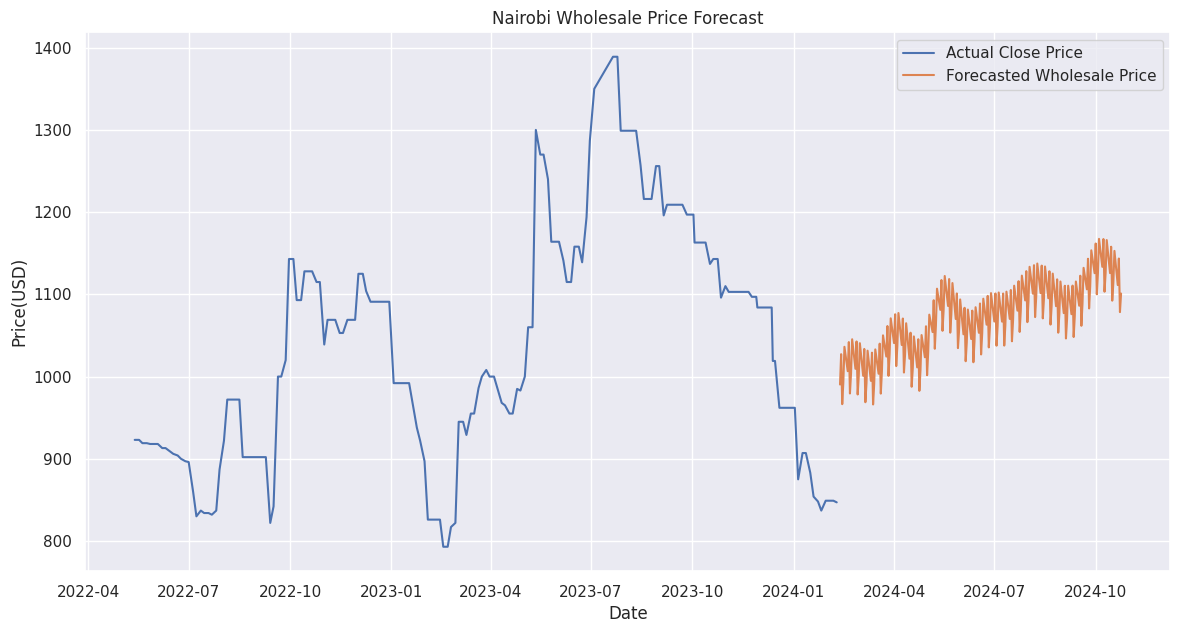

In [ ]:
# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat']].tail(184).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(184).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat']))
r2 = r2_score(actual_data['y'], forecast_data['yhat'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()

In [ ]:
forecast_data.head(30)

ds  yhat_lower
0  2024-02-12  890.423240
1  2024-02-13  946.719318
2  2024-02-14  869.602673
3  2024-02-15  906.466833
4  2024-02-16  966.929862
5  2024-02-19  913.107022
6  2024-02-20  971.561411
7  2024-02-21  886.837659
8  2024-02-22  916.018131
9  2024-02-23  968.313119
10 2024-02-26  914.031530
11 2024-02-27  964.331800
12 2024-02-28  887.006981
13 2024-02-29  901.020788
14 2024-03-01  963.606067
15 2024-03-04  901.578849
16 2024-03-05  957.262782
17 2024-03-06  869.516290
18 2024-03-07  896.882246
19 2024-03-08  960.252228
20 2024-03-11  906.718319
21 2024-03-12  952.027968
22 2024-03-13  873.328396
23 2024-03-14  896.652601
24 2024-03-15  954.189974
25 2024-03-18  912.908166
26 2024-03-19  969.847393
27 2024-03-20  888.301140
28 2024-03-21  923.004160
29 2024-03-22  976.574906

### Consider Tuesdays and Fridays for Forecasting

In [ ]:
# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['date', 'nairobi']].rename(columns={'date': 'ds', 'nairobi': 'y'})

# Drop rows with any NaN values
data.dropna(inplace=True)

data.isna().sum()

# # Create a Prophet model
# model = Prophet(yearly_seasonality=True,
#                 weekly_seasonality=True,
#                 daily_seasonality=False,)
#                 # n_changepoints=0,)
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                n_changepoints=12,
                changepoint_prior_scale=7,
                seasonality_prior_scale=2,
                seasonality_mode='additive')
# Fit the model on your data
model.fit(data)

# Create a DataFrame for forecast dates
future_monday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-MON'), columns=['ds'])
future_tuesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-TUE'), columns=['ds'])
future_wednesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-WED'), columns=['ds'])
future_thursday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-THU'), columns=['ds'])
future_friday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-FRI'), columns=['ds'])
forecast_dates = pd.concat([future_monday, future_tuesday, future_wednesday, future_thursday, future_friday])

# Make forecasts for the specified dates
forecast = model.predict(forecast_dates)

# Print the forecast for Tuesdays and Fridays
forecast[['ds', 'yhat_lower']][:50]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/rlpfe9xm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsjtg3d6/bq7l1r_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40472', 'data', 'file=/tmp/tmpqsjtg3d6/rlpfe9xm.json', 'init=/tmp/tmpqsjtg3d6/bq7l1r_f.json', 'output', 'file=/tmp/tmpqsjtg3d6/prophet_model1rrfcvk_/prophet_model-20240311123320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat_lower
0  2024-01-01  866.014116
1  2024-01-02  871.283434
2  2024-01-03  853.255890
3  2024-01-04  846.363782
4  2024-01-05  854.019471
5  2024-01-08  832.646578
6  2024-01-09  838.996049
7  2024-01-10  822.457579
8  2024-01-11  816.242988
9  2024-01-12  818.462780
10 2024-01-15  803.623533
11 2024-01-16  811.717003
12 2024-01-17  790.167622
13 2024-01-18  786.765051
14 2024-01-19  799.002319
15 2024-01-22  780.382524
16 2024-01-23  792.210567
17 2024-01-24  777.728305
18 2024-01-25  775.361013
19 2024-01-26  793.258352
20 2024-01-29  776.388931
21 2024-01-30  784.626196
22 2024-01-31  776.238778
23 2024-02-01  782.798842
24 2024-02-02  787.789521
25 2024-02-05  772.407887
26 2024-02-06  784.545350
27 2024-02-07  778.979117
28 2024-02-08  777.257116
29 2024-02-09  793.060071
30 2024-02-12  773.368016
31 2024-02-13  781.350584
32 2024-02-14  778.688939
33 2024-02-15  776.570470
34 2024-02-16  791.950108
35 2024-02-19  776.600022
36 2024-02-20  792.094692
37 2024-02-21  776.518463
38 2024-02-22  771.780315
39 2024-02-23  783.376629
40 2024-02-26  772.242287
41 2024-02-27  781.678927
42 2024-02-28  763.411649
43 2024-02-29  768.537775
44 2024-03-01  781.420090
45 2024-03-04  763.150248
46 2024-03-05  775.688937
47 2024-03-06  765.224091
48 2024-03-07  760.794724
49 2024-03-08  777.855514

MAPE: 50.773616399434154
RMSE: 727.7871103291621
R-squared: -29.49575845075908


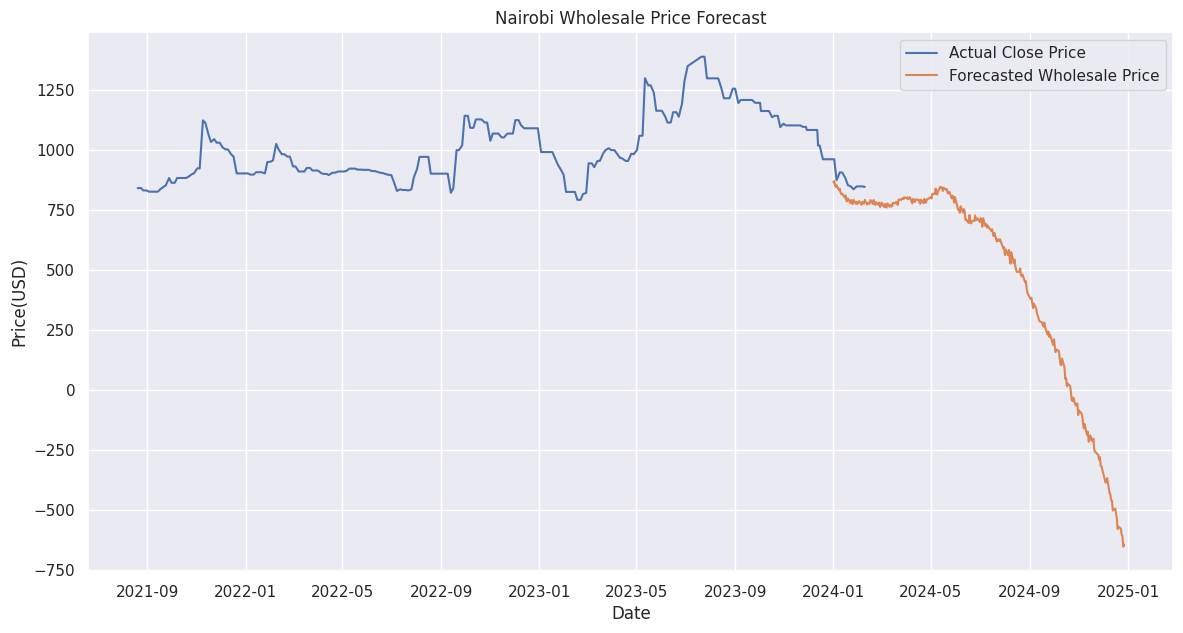

In [ ]:
# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat_lower']].tail(260).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(260).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat_lower']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat_lower']))
r2 = r2_score(actual_data['y'], forecast_data['yhat_lower'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat_lower'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()


MAPE: 10.05657558382009
RMSE: 126.04488416640748
R-squared: 0.08529476051926499


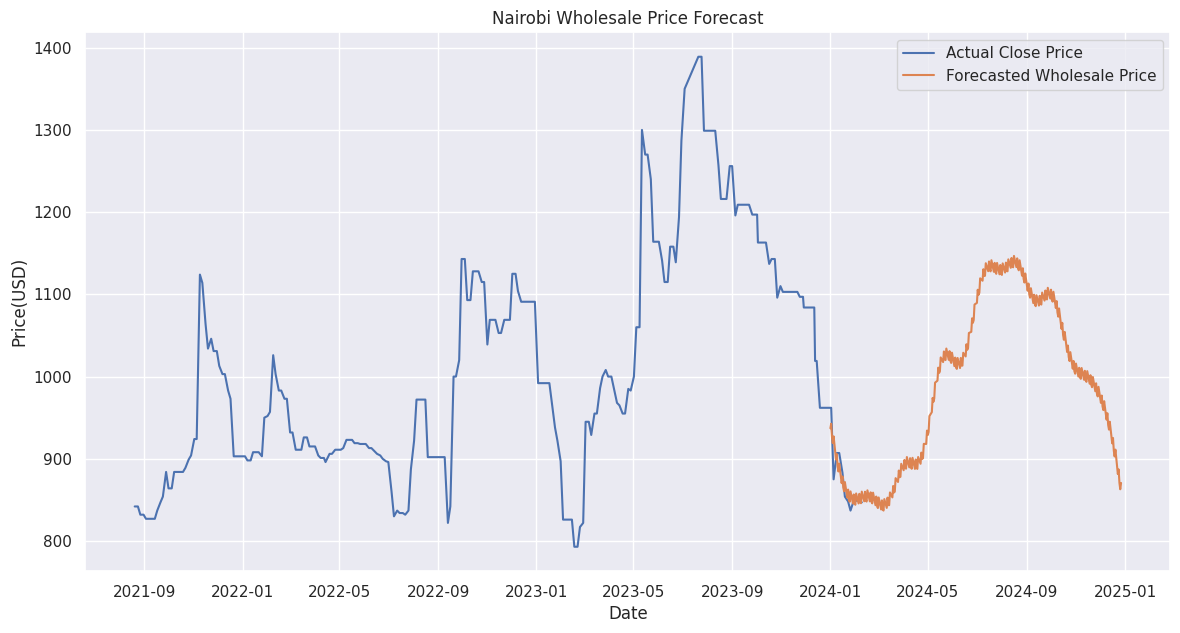

In [ ]:
# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat']].tail(260).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(260).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat']))
r2 = r2_score(actual_data['y'], forecast_data['yhat'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()


In [ ]:
forecast_data.head(50)

ds        yhat
0  2024-01-01  937.102889
1  2024-01-02  942.649967
2  2024-01-03  926.402453
3  2024-01-04  919.090979
4  2024-01-05  927.304379
5  2024-01-08  899.129849
6  2024-01-09  905.730681
7  2024-01-10  890.640792
8  2024-01-11  884.580442
9  2024-01-12  894.127738
10 2024-01-15  870.342898
11 2024-01-16  878.500776
12 2024-01-17  864.997885
13 2024-01-18  860.544996
14 2024-01-19  871.711257
15 2024-01-22  852.770881
16 2024-01-23  862.514827
17 2024-01-24  850.572411
18 2024-01-25  847.648172
19 2024-01-26  860.305252
20 2024-01-29  845.551951
21 2024-01-30  856.577095
22 2024-01-31  845.848850
23 2024-02-01  844.065799
24 2024-02-02  857.785104
25 2024-02-05  845.685891
26 2024-02-06  857.399688
27 2024-02-07  847.253844
28 2024-02-08  845.942974
29 2024-02-09  860.021167
30 2024-02-12  848.305716
31 2024-02-13  859.919197
32 2024-02-14  849.564397
33 2024-02-15  847.941940
34 2024-02-16  861.613847
35 2024-02-19  848.219522
36 2024-02-20  859.165241
37 2024-02-21  848.115296
38 2024-02-22  845.788333
39 2024-02-23  858.765348
40 2024-02-26  843.540535
41 2024-02-27  854.025813
42 2024-02-28  842.621025
43 2024-02-29  840.061277
44 2024-03-01  852.942092
45 2024-03-04  838.356188
46 2024-03-05  849.384770
47 2024-03-06  838.690680
48 2024-03-07  837.004962
49 2024-03-08  850.915371

In [ ]:
forecast_data.to_excel('Nairobi_Wholesale_Price_Forecast_Updated.xlsx')

In [ ]:
import pickle
# Save the model to a file
with open('nairobi_sugar_wholesale_price_prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Load the model from the file
with open('nairobi_sugar_wholesale_price_prophet_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['date', 'nairobi']].rename(columns={'date': 'ds', 'nairobi': 'y'})

# Drop rows with any NaN values
data.dropna(inplace=True)

data.isna().sum()

# # Create a Prophet model_2
# model_2 = Prophet(yearly_seasonality=True,
#                 weekly_seasonality=True,
#                 daily_seasonality=False,)
#                 # n_changepoints=0,)
model_2 = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                n_changepoints=12,
                changepoint_prior_scale=7,
                seasonality_prior_scale=2,
                seasonality_mode='additive')
# Fit the model_2 on your data
model_2.fit(data)

# Create a DataFrame for forecast_2 dates
future_monday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-MON'), columns=['ds'])
future_tuesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-TUE'), columns=['ds'])
future_wednesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-WED'), columns=['ds'])
future_thursday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-THU'), columns=['ds'])
future_friday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-FRI'), columns=['ds'])
forecast_dates = pd.concat([future_monday, future_tuesday, future_wednesday, future_thursday, future_friday])

# Make forecasts for the specified dates
forecast_2 = model_2.predict(forecast_dates)

# Print the forecast_2 for Tuesdays and Fridays
forecast_2[['ds', 'yhat_lower']][:50]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/mdqplznc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/s2wae88z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17556', 'data', 'file=/tmp/tmpv11__y2x/mdqplznc.json', 'init=/tmp/tmpv11__y2x/s2wae88z.json', 'output', 'file=/tmp/tmpv11__y2x/prophet_modeltfsqu9ui/prophet_model-20240314063225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  yhat_lower
0  2024-01-01  866.900911
1  2024-01-02  877.855266
2  2024-01-03  853.880495
3  2024-01-04  850.273479
4  2024-01-05  862.940480
5  2024-01-08  829.869430
6  2024-01-09  838.937083
7  2024-01-10  817.854378
8  2024-01-11  813.883003
9  2024-01-12  821.177239
10 2024-01-15  796.421595
11 2024-01-16  809.051587
12 2024-01-17  795.780397
13 2024-01-18  784.266057
14 2024-01-19  803.916433
15 2024-01-22  784.581996
16 2024-01-23  797.494917
17 2024-01-24  779.896453
18 2024-01-25  774.884246
19 2024-01-26  787.335566
20 2024-01-29  775.430881
21 2024-01-30  787.140929
22 2024-01-31  773.091723
23 2024-02-01  770.440944
24 2024-02-02  796.224300
25 2024-02-05  770.955269
26 2024-02-06  791.665679
27 2024-02-07  771.555225
28 2024-02-08  777.307263
29 2024-02-09  791.472957
30 2024-02-12  775.131202
31 2024-02-13  790.501131
32 2024-02-14  779.193881
33 2024-02-15  779.471503
34 2024-02-16  790.107807
35 2024-02-19  781.538334
36 2024-02-20  793.691560
37 2024-02-21  776.767570
38 2024-02-22  775.249805
39 2024-02-23  784.517000
40 2024-02-26  769.353956
41 2024-02-27  779.462343
42 2024-02-28  765.852651
43 2024-02-29  769.868998
44 2024-03-01  779.913215
45 2024-03-04  763.763274
46 2024-03-05  775.499607
47 2024-03-06  758.929129
48 2024-03-07  761.928709
49 2024-03-08  776.516065

In [ ]:
forecast_2[['ds', 'yhat']][:50]

ds        yhat
0  2024-01-01  937.102889
1  2024-01-02  942.649967
2  2024-01-03  926.402453
3  2024-01-04  919.090979
4  2024-01-05  927.304379
5  2024-01-08  899.129849
6  2024-01-09  905.730681
7  2024-01-10  890.640792
8  2024-01-11  884.580442
9  2024-01-12  894.127738
10 2024-01-15  870.342898
11 2024-01-16  878.500776
12 2024-01-17  864.997885
13 2024-01-18  860.544996
14 2024-01-19  871.711257
15 2024-01-22  852.770881
16 2024-01-23  862.514827
17 2024-01-24  850.572411
18 2024-01-25  847.648172
19 2024-01-26  860.305252
20 2024-01-29  845.551951
21 2024-01-30  856.577095
22 2024-01-31  845.848850
23 2024-02-01  844.065799
24 2024-02-02  857.785104
25 2024-02-05  845.685891
26 2024-02-06  857.399688
27 2024-02-07  847.253844
28 2024-02-08  845.942974
29 2024-02-09  860.021167
30 2024-02-12  848.305716
31 2024-02-13  859.919197
32 2024-02-14  849.564397
33 2024-02-15  847.941940
34 2024-02-16  861.613847
35 2024-02-19  848.219522
36 2024-02-20  859.165241
37 2024-02-21  848.115296
38 2024-02-22  845.788333
39 2024-02-23  858.765348
40 2024-02-26  843.540535
41 2024-02-27  854.025813
42 2024-02-28  842.621025
43 2024-02-29  840.061277
44 2024-03-01  852.942092
45 2024-03-04  838.356188
46 2024-03-05  849.384770
47 2024-03-06  838.690680
48 2024-03-07  837.004962
49 2024-03-08  850.915371

MAPE: 10.05657558382009
MSE: 15887.31282452308
RMSE: 126.04488416640748
R-squared: 0.08529476051926499


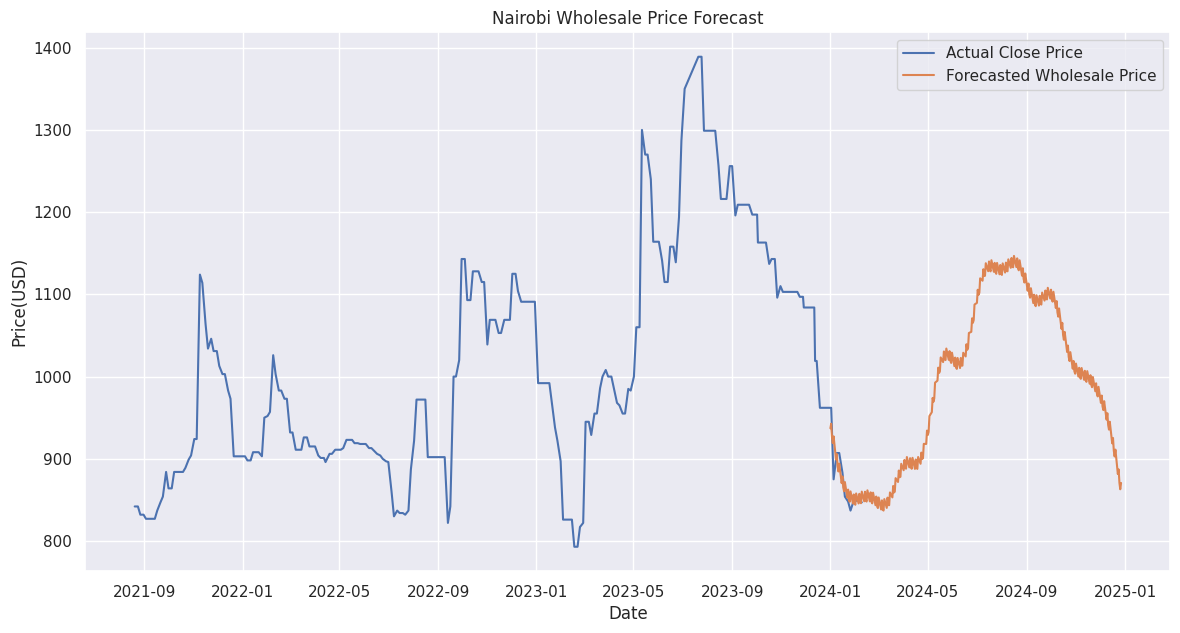

In [ ]:
# import the mean squared error
from sklearn.metrics import mean_squared_error

# Extracting actual and predicted values for the forecast_2 period
forecast_data_2 = forecast_2[['ds', 'yhat']].tail(260).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(260).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data_2['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data_2['yhat']))
mse = mean_squared_error(actual_data['y'], forecast_data_2['yhat'])
r2 = r2_score(actual_data['y'], forecast_data_2['yhat'])

# Print metrics
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast_2
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data_2['ds'], forecast_data_2['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()


### Introducing an additional factor

In [ ]:
import pandas as pd
from prophet import Prophet

# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")
df1 = df[['date', 'nairobi']]
data_ = df1[['date', 'nairobi']].rename(columns={'date': 'ds', 'nairobi': 'y'})

data_.dropna(inplace=True)

# Load production variability data (assuming it's stored in a CSV file)
production_data = pd.read_excel("/content/Sugar_Prices_Production_Indices.xlsx",
                                sheet_name='Sheet2')

production_data_ = production_data[['date', 'Production Indices']]
production_data_.isna().sum() # Check if there are any missing values
production_data_.info()
ds_production_data = production_data_[['date', 'Production Indices']].rename(columns={'date': 'ds', 'Production Indices': 'production_variability'})
ds_production_data.head()
ds_production_data.dropna(inplace=True)
ds_production_data.info()

# Merge the two datasets based on the common date column 'date'
data = pd.merge(data_, ds_production_data, on='ds')
data.head()

# # Select relevant columns and rename them to 'ds' and 'y'
# data = data[['date', 'nairobi_x', 'Production Indices']].rename(columns={'date': 'ds', 'nairobi_x': 'y'})
# data.head()
# # data.isna().sum()

# # ds_data = data[['ds', 'y']]
# # ds_data.head()

# # # # Drop rows with any NaN values
# # # data.dropna(inplace=True)

model = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                n_changepoints=2000, #1500
                changepoint_prior_scale=7, #7
                seasonality_prior_scale=10, #20 #10
                seasonality_mode='multiplicative')

# Add the additional regressor for production variability
model.add_regressor('production_variability')

# Fit the model_2 on your data
model.fit(data)

# Create forecast dates
future_dates = pd.DataFrame(pd.date_range(start='2019-08-22', periods=1190, freq='B'), columns=['ds'])

# # Create a DataFrame for forecast_2 dates
# future_monday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-MON'), columns=['ds'])
# future_tuesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-TUE'), columns=['ds'])
# future_wednesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-WED'), columns=['ds'])
# future_thursday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-THU'), columns=['ds'])
# future_friday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-FRI'), columns=['ds'])
# future_dates = pd.concat([future_monday, future_tuesday, future_wednesday, future_thursday, future_friday])

# Add production variability data to forecast dates
future_dates = pd.merge(future_dates, ds_production_data, on='ds')

# Make forecasts
forecast = model.predict(future_dates)

# Print the forecast
print(forecast[['ds', 'yhat_lower']][:50])


INFO:prophet:n_changepoints greater than number of observations. Using 373.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/6wz7ny34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/9eelqiug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                478 non-null    datetime64[ns]
 1   Production Indices  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 477
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      468 non-null    datetime64[ns]
 1   production_variability  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90188', 'data', 'file=/tmp/tmpv11__y2x/6wz7ny34.json', 'init=/tmp/tmpv11__y2x/9eelqiug.json', 'output', 'file=/tmp/tmpv11__y2x/prophet_modelcf_rn0he/prophet_model-20240314092238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds  yhat_lower
0  2019-08-22  774.422397
1  2019-08-26  773.284975
2  2019-08-29  767.525613
3  2019-09-02  765.697291
4  2019-09-05  760.056260
5  2019-09-09  759.508236
6  2019-09-12  752.951882
7  2019-09-16  752.227239
8  2019-09-19  745.746192
9  2019-09-23  746.520729
10 2019-09-26  745.542167
11 2019-09-30  750.619328
12 2019-10-03  751.995285
13 2019-10-07  759.981164
14 2019-10-10  760.945533
15 2019-10-14  762.017742
16 2019-10-17  761.728782
17 2019-10-21  763.695407
18 2019-10-24  759.987362
19 2019-10-29  757.138886
20 2019-11-01  761.243135
21 2019-11-05  766.500876
22 2019-11-08  771.719830
23 2019-11-12  776.626931
24 2019-11-15  785.377873
25 2019-11-19  795.217630
26 2019-11-22  807.594812
27 2019-11-26  826.085336
28 2019-11-29  843.797031
29 2019-12-03  875.860892
30 2019-12-06  898.720899
31 2019-12-10  915.972658
32 2019-12-13  922.243934
33 2019-12-16  929.119357
34 2019-12-20  914.086936
35 2019-12-24  895.572513
36 2019-12-27  881.730196
37 2019-12-3

In [ ]:
future_dates['ds']

0     2019-08-22
1     2019-08-26
2     2019-08-29
3     2019-09-02
4     2019-09-05
         ...    
463   2024-01-26
464   2024-01-30
465   2024-02-02
466   2024-02-06
467   2024-02-09
Name: ds, Length: 468, dtype: datetime64[ns]

In [ ]:
ds_production_data['ds']

0     2019-08-22
1     2019-08-26
2     2019-08-29
3     2019-09-02
4     2019-09-05
         ...    
473   2024-01-26
474   2024-01-30
475   2024-02-02
476   2024-02-06
477   2024-02-09
Name: ds, Length: 468, dtype: datetime64[ns]

In [ ]:
len(future_dates['ds'].unique())

468

In [ ]:
len(ds_production_data['ds'].unique())

468

In [ ]:
len(future_dates)

468

In [ ]:
len(data)

468

In [ ]:
data.head()

ds      y  production_variability
0 2019-08-22  805.0                    -2.0
1 2019-08-26  805.0                    -2.0
2 2019-08-29  805.0                    -2.0
3 2019-09-02  786.0                    -2.0
4 2019-09-05  790.0                    -2.0

MAPE: 1.5032454289433412
MSE: 450.6195017979421
RMSE: 21.227800210995536
R-squared: 0.972664880587542


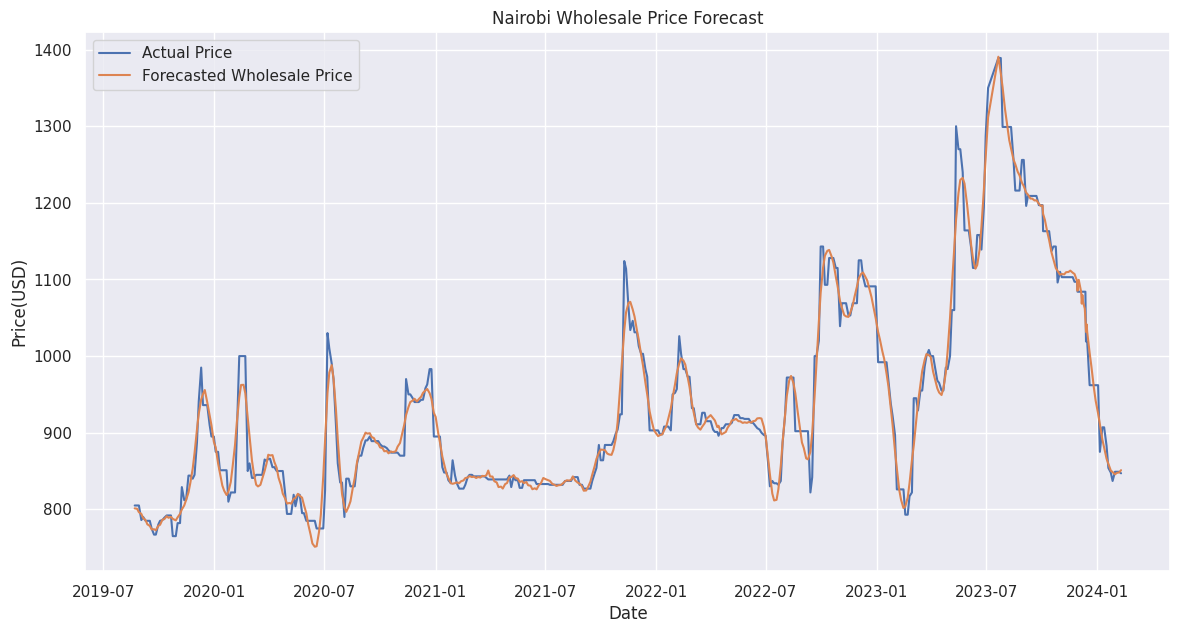

In [ ]:
# import the mean squared error
from sklearn.metrics import mean_squared_error

# # Extracting actual and predicted values for the forecast period
# forecast_data_prod = forecast[['ds', 'yhat']].tail(12).reset_index(drop=True)
# actual_data = data[['ds', 'y']].tail(12).reset_index(drop=True)

# Extracting actual and predicted values for the forecast period
forecast_data_prod = forecast[['ds', 'yhat']].head(1200).reset_index(drop=True)
actual_data = data[['ds', 'y']].head(1200).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data_prod['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data_prod['yhat']))
mse = mean_squared_error(actual_data['y'], forecast_data_prod['yhat'])
r2 = r2_score(actual_data['y'], forecast_data_prod['yhat'])

# Print metrics
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Price')
plt.plot(forecast_data_prod['ds'], forecast_data_prod['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()

### Get 2024 dates Tuesday and Friday

---



In [ ]:
future_friday = pd.DataFrame(pd.date_range(start='2024-02-06', periods=36, freq='W-FRI'), columns=['ds_f'],)
# future_friday

In [ ]:
future_tuesday = pd.DataFrame(pd.date_range(start='2024-02-06', periods=36, freq='W-TUE'), columns=['ds_t'])
# future_tuesday

In [ ]:
import pandas as pd

# Create a DataFrame for forecast_2 dates
forecast_dates_2024 = pd.concat([future_tuesday,future_friday], ignore_index=True)
forecast_dates_2024.to_excel('tuesday_friday_dates_2024.xlsx')


In [ ]:
# Create a DataFrame for forecast_2 dates
# future_monday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-MON'), columns=['ds'])
future_tuesday = pd.DataFrame(pd.date_range(start='2024-02-06', periods=26, freq='W-TUE'), columns=['ds'])
# future_wednesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-WED'), columns=['ds'])
# future_thursday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-THU'), columns=['ds'])
future_friday = pd.DataFrame(pd.date_range(start='2024-02-06', periods=26, freq='W-FRI'), columns=['ds'])
# forecast_dates = pd.concat([future_monday, future_tuesday, future_wednesday, future_thursday, future_friday])
forecast_dates_2024 = pd.concat([future_tuesday, future_friday])
# forecast_dates_2024

### Forecast for 2024

In [ ]:
import pandas as pd
from prophet import Prophet

# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")
df1 = df[['date', 'nairobi']]
data_ = df1[['date', 'nairobi']].rename(columns={'date': 'ds', 'nairobi': 'y'})

data_.dropna(inplace=True)

# Load production variability data
production_data = pd.read_excel("/content/Sugar_Prices_Production_Indices.xlsx",
                                sheet_name='Sheet2')

production_data_ = production_data[['date', 'Production Indices']]
production_data_.isna().sum() # Check if there are any missing values
production_data_.info()
ds_production_data = production_data_[['date', 'Production Indices']].rename(columns={'date': 'ds', 'Production Indices': 'production_variability'})
ds_production_data.head()
ds_production_data.dropna(inplace=True)
ds_production_data.info()

# Load production variability data for 2024 forecast
production_data_2024 = pd.read_excel("/content/Kenya_Sugar_Prices_Production_Indices_2024.xlsx",
                                sheet_name='Sheet2')

production_data_prod = production_data_2024[['date', 'Production Indices']]
production_data_prod.isna().sum() # Check if there are any missing values
production_data_prod.info()
ds_production_data_2024 = production_data_prod[['date', 'Production Indices']].rename(columns={'date': 'ds', 'Production Indices': 'production_variability'})
ds_production_data_2024.head()
ds_production_data_2024.dropna(inplace=True)
ds_production_data_2024.info()

# Merge the two datasets based on the common date column 'date'
data = pd.merge(data_, ds_production_data_2024, on='ds')
data.head()
# # Select relevant columns and rename them to 'ds' and 'y'
# data = data[['date', 'nairobi_x', 'Production Indices']].rename(columns={'date': 'ds', 'nairobi_x': 'y'})
# data.head()
# # data.isna().sum()

# # ds_data = data[['ds', 'y']]
# # ds_data.head()

# # # # Drop rows with any NaN values
# # # data.dropna(inplace=True)

model = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                n_changepoints=2000, #1500
                changepoint_prior_scale=7, #7
                seasonality_prior_scale=10, #20 #10
                seasonality_mode='multiplicative')

# Add the additional regressor for production variability
model.add_regressor('production_variability')

# Fit the model_2 on your data
model.fit(data)

# Create forecast dates
future_dates = pd.DataFrame(pd.date_range(start='2019-08-22', periods=1168, freq='B'), columns=['ds'])

# # Create a DataFrame for forecast_2 dates
# future_monday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-MON'), columns=['ds'])
# future_tuesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-TUE'), columns=['ds'])
# future_wednesday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-WED'), columns=['ds'])
# future_thursday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-THU'), columns=['ds'])
# future_friday = pd.DataFrame(pd.date_range(start='2024-01-01', periods=52, freq='W-FRI'), columns=['ds'])
# future_dates = pd.concat([future_monday, future_tuesday, future_wednesday, future_thursday, future_friday])

# Add production variability data to forecast dates
future_dates = pd.merge(future_dates, ds_production_data_2024, on='ds')

# Make forecasts
forecast = model.predict(future_dates)

# Print the forecast
print(forecast[['ds', 'yhat_lower']][:50])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                478 non-null    datetime64[ns]
 1   Production Indices  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 477
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      468 non-null    datetime64[ns]
 1   production_variability  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


INFO:prophet:n_changepoints greater than number of observations. Using 375.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/a2rr3v9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/bwnpety1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19191', 'data', 'file=/tmp/tmpv11__y2x/a2rr3v9j.json', 'init=/tmp/tmpv11__y2x/bwnpety1.json', 'output', 'file=/tmp/tmpv11__y2x/prophet_modeluz_a84cc/prophet_model-20240314122317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                550 non-null    datetime64[ns]
 1   Production Indices  540 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 549
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ds                      540 non-null    datetime64[ns]
 1   production_variability  540 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.7 KB


12:23:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds  yhat_lower
0  2019-08-22  779.302965
1  2019-08-26  775.037098
2  2019-08-29  768.748735
3  2019-09-02  770.013777
4  2019-09-05  758.440288
5  2019-09-09  758.392556
6  2019-09-12  752.612432
7  2019-09-16  753.221759
8  2019-09-19  748.579556
9  2019-09-23  749.272568
10 2019-09-26  745.685145
11 2019-09-30  751.847215
12 2019-10-03  755.039675
13 2019-10-07  759.275871
14 2019-10-10  756.805009
15 2019-10-14  756.930655
16 2019-10-17  756.800893
17 2019-10-21  758.745819
18 2019-10-24  754.795071
19 2019-10-29  749.855497
20 2019-11-01  753.516319
21 2019-11-05  762.038952
22 2019-11-08  769.371672
23 2019-11-12  777.564511
24 2019-11-15  786.356913
25 2019-11-19  798.603510
26 2019-11-22  810.464218
27 2019-11-26  831.516036
28 2019-11-29  850.871279
29 2019-12-03  875.898673
30 2019-12-06  895.021294
31 2019-12-10  909.942480
32 2019-12-13  918.202584
33 2019-12-16  927.421430
34 2019-12-20  908.707805
35 2019-12-24  893.460267
36 2019-12-27  881.804803
37 2019-12-3

In [ ]:
len(future_dates)

470

In [ ]:
future_dates

ds  production_variability
0   2019-08-22                    -2.0
1   2019-08-26                    -2.0
2   2019-08-29                    -2.0
3   2019-09-02                    -2.0
4   2019-09-05                    -2.0
..         ...                     ...
465 2024-02-02                     2.0
466 2024-02-06                     2.0
467 2024-02-06                     2.0
468 2024-02-09                     2.0
469 2024-02-09                     2.0

[470 rows x 2 columns]

In [ ]:
ds_production_data_2024.tail() #2024-02-09 to 2024-10-11

ds  production_variability
545 2024-09-27                     0.0
546 2024-10-01                    -2.0
547 2024-10-04                    -2.0
548 2024-10-08                    -2.0
549 2024-10-11                    -2.0

MAPE: 1.5118388780376526
MSE: 470.2840386217444
RMSE: 21.686033261565942
R-squared: 0.9714072526665252


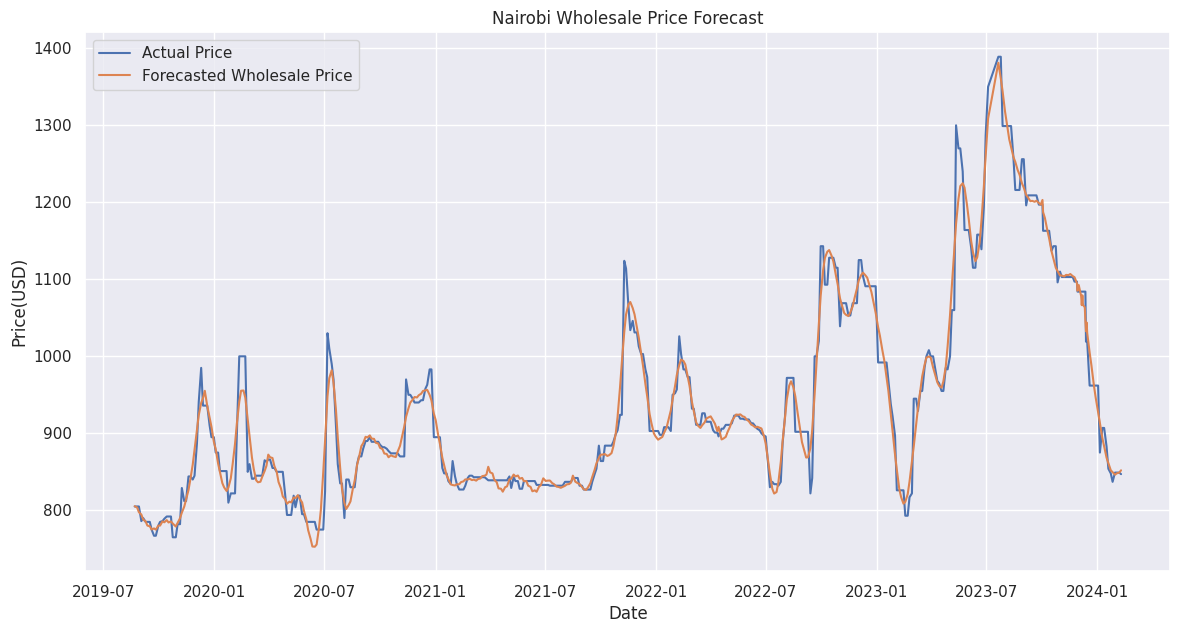

In [ ]:
# import the mean squared error
from sklearn.metrics import mean_squared_error

# # Extracting actual and predicted values for the forecast period
# forecast_data_prod = forecast[['ds', 'yhat']].tail(12).reset_index(drop=True)
# actual_data = data[['ds', 'y']].tail(12).reset_index(drop=True)

# Extracting actual and predicted values for the forecast period
forecast_data_prod = forecast[['ds', 'yhat']].head(1190).reset_index(drop=True)
actual_data = data[['ds', 'y']].head(1190).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data_prod['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data_prod['yhat']))
mse = mean_squared_error(actual_data['y'], forecast_data_prod['yhat'])
r2 = r2_score(actual_data['y'], forecast_data_prod['yhat'])

# Print metrics
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Price')
plt.plot(forecast_data_prod['ds'], forecast_data_prod['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()

In [ ]:
# Create forecast dates for 2025
future_dates_2024 = pd.DataFrame(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'), columns=['ds'])

# Add production variability data to forecast dates for 2025
future_dates_2024 = pd.merge(future_dates_2024, ds_production_data_2024, on='ds')

# Make forecasts for 2025
forecast_2024 = model.predict(future_dates_2024)
forecast_2024.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2024-01-02  190.054695  900.401938  955.122883   190.054695   190.054695   
1 2024-01-05  189.748677  886.902623  942.736055   189.748677   189.748677   
2 2024-01-09  189.340652  865.556293  921.729762   189.340652   189.340652   
3 2024-01-12  189.034633  855.225594  910.809507   189.034633   189.034633   
4 2024-01-16  188.626609  840.588623  896.353330   188.626609   188.626609   

     daily  daily_lower  daily_upper  extra_regressors_multiplicative  ...  \
0  4.21388      4.21388      4.21388                         0.014306  ...   
1  4.21388      4.21388      4.21388                         0.014306  ...   
2  4.21388      4.21388      4.21388                         0.014306  ...   
3  4.21388      4.21388      4.21388                         0.014306  ...   
4  4.21388      4.21388      4.21388                         0.014306  ...   

     weekly  weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0  0.194139      0.194139      0.194139 -0.544228     -0.544228     -0.544228   
1  0.200818      0.200818      0.200818 -0.615166     -0.615166     -0.615166   
2  0.194139      0.194139      0.194139 -0.700097     -0.700097     -0.700097   
3  0.200818      0.200818      0.200818 -0.755925     -0.755925     -0.755925   
4  0.194139      0.194139      0.194139 -0.818467     -0.818467     -0.818467   

   additive_terms  additive_terms_lower  additive_terms_upper        yhat  
0             0.0                   0.0                   0.0  927.105123  
1             0.0                   0.0                   0.0  913.419163  
2             0.0                   0.0                   0.0  894.109703  
3             0.0                   0.0                   0.0  883.373614  
4             0.0                   0.0                   0.0  868.409934  

[5 rows x 28 columns]

In [ ]:
len(forecast_2024)

84

MAPE: 19.601018496198126
MSE: 77175.82693298583
RMSE: 277.8053759972723
R-squared: -2.83874478593864


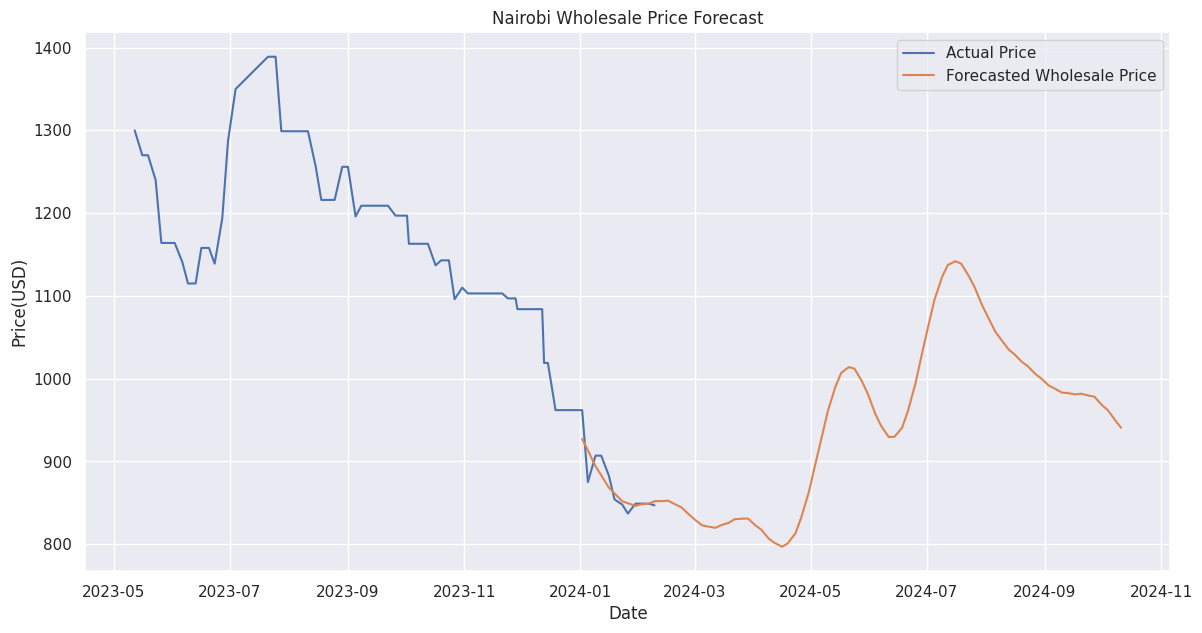

In [ ]:
# import the mean squared error
from sklearn.metrics import mean_squared_error

# # Extracting actual and predicted values for the forecast_2024 period
# forecast_data_prod = forecast_2024[['ds', 'yhat']].tail(12).reset_index(drop=True)
# actual_data = data[['ds', 'y']].tail(12).reset_index(drop=True)

# Extracting actual and predicted values for the forecast_2024 period
forecast_data_prod = forecast_2024[['ds', 'yhat']].head(84).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(84).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data_prod['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data_prod['yhat']))
mse = mean_squared_error(actual_data['y'], forecast_data_prod['yhat'])
r2 = r2_score(actual_data['y'], forecast_data_prod['yhat'])

# Print metrics
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast_2024
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Price')
plt.plot(forecast_data_prod['ds'], forecast_data_prod['yhat'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()

In [ ]:
forecast_2024[['ds', 'yhat']].head(30)

ds        yhat
0  2024-01-02  927.105123
1  2024-01-05  913.419163
2  2024-01-09  894.109703
3  2024-01-12  883.373614
4  2024-01-16  868.409934
5  2024-01-19  861.353037
6  2024-01-23  851.981338
7  2024-01-26  849.520948
8  2024-01-30  846.360104
9  2024-02-02  848.072412
10 2024-02-06  848.945759
11 2024-02-06  848.945759
12 2024-02-09  851.990866
13 2024-02-09  851.990866
14 2024-02-13  852.040245
15 2024-02-16  852.657385
16 2024-02-20  847.941215
17 2024-02-23  844.736465
18 2024-02-27  836.108694
19 2024-03-01  829.980632
20 2024-03-05  822.694479
21 2024-03-08  821.339864
22 2024-03-12  819.843249
23 2024-03-15  822.976383
24 2024-03-19  825.873738
25 2024-03-22  830.090779
26 2024-03-26  830.833137
27 2024-03-29  830.975920
28 2024-04-02  822.778602
29 2024-04-05  817.605705

In [ ]:
forecast_2024.to_excel('Kenya_Sugar_Forecast_Prod_Var_2024.xlsx')

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")

# Load production variability data (assuming it's stored in a CSV file)
production_data = pd.read_csv("/content/production_variability.csv")

# Merge the two datasets based on the common date column 'date'
data = pd.merge(df, production_data, on='date')

# Select relevant columns and rename them to 'ds' and 'y'
data = data[['date', 'nairobi', 'production_variability']].rename(columns={'date': 'ds', 'nairobi': 'y'})

# Drop rows with any NaN values
data.dropna(inplace=True)

# Create a Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Add the additional regressor for production variability
model.add_regressor('production_variability')

# Fit the model on your data
model.fit(data)

# Create forecast dates for 2025
future_dates_2024 = pd.DataFrame(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'), columns=['ds'])

# Add production variability data to forecast dates for 2025
future_dates_2024 = pd.merge(future_dates_2024, production_data, on='ds')

# Make forecasts for 2025
forecast_2024 = model.predict(future_dates_2024)

# Print the forecast for 2025
print(forecast_2024[['ds', 'yhat_lower']])


In [ ]:
forecast

ds        trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2024-01-02  1042.723927  848.786373  982.237995  1042.723927  1042.723927   
1  2024-01-05  1042.274180  839.904293  974.319150  1042.274180  1042.274180   
2  2024-01-09  1041.674517  819.857506  959.488117  1041.674517  1041.674517   
3  2024-01-12  1041.224769  813.301202  949.214434  1041.224769  1041.224769   
4  2024-01-16  1040.625106  798.279429  941.470827  1040.625106  1040.625106   
5  2024-01-19  1040.175358  799.708365  930.673271  1040.175358  1040.175358   
6  2024-01-23  1039.575695  788.959456  929.291686  1039.575695  1039.575695   
7  2024-01-26  1039.125947  785.349336  921.468597  1039.125947  1039.125947   
8  2024-01-30  1038.526284  785.233818  914.643981  1038.526284  1038.526284   
9  2024-02-02  1038.076537  782.425137  920.657992  1038.076537  1038.076537   
10 2024-02-06  1037.476873  785.492535  920.113126  1037.476873  1037.476873   
11 2024-02-09  1037.027126  787.552424  921.366100  1037.027126  1037.027126   

    additive_terms  additive_terms_lower  additive_terms_upper  \
0      -127.091184           -127.091184           -127.091184   
1      -136.317198           -136.317198           -136.317198   
2      -151.654570           -151.654570           -151.654570   
3      -159.017814           -159.017814           -159.017814   
4      -171.632337           -171.632337           -171.632337   
5      -176.569829           -176.569829           -176.569829   
6      -185.129363           -185.129363           -185.129363   
7      -186.340426           -186.340426           -186.340426   
8      -189.294767           -189.294767           -189.294767   
9      -186.294847           -186.294847           -186.294847   
10     -184.590898           -184.590898           -184.590898   
11     -179.478907           -179.478907           -179.478907   

    extra_regressors_additive  ...    weekly  weekly_lower  weekly_upper  \
0                  -30.559669  ... -7.920844     -7.920844     -7.920844   
1                  -30.559669  ... -6.099718     -6.099718     -6.099718   
2                  -30.559669  ... -7.920844     -7.920844     -7.920844   
3                  -30.559669  ... -6.099718     -6.099718     -6.099718   
4                  -30.559669  ... -7.920844     -7.920844     -7.920844   
5                  -30.559669  ... -6.099718     -6.099718     -6.099718   
6                  -30.559669  ... -7.920844     -7.920844     -7.920844   
7                  -30.559669  ... -6.099718     -6.099718     -6.099718   
8                  -30.559669  ... -7.920844     -7.920844     -7.920844   
9                  -30.559669  ... -6.099718     -6.099718     -6.099718   
10                 -30.559669  ... -7.920844     -7.920844     -7.920844   
11                 -30.559669  ... -6.099718     -6.099718     -6.099718   

        yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0   -88.610670    -88.610670    -88.610670                   0.0   
1   -99.657811    -99.657811    -99.657811                   0.0   
2  -113.174057   -113.174057   -113.174057                   0.0   
3  -122.358427   -122.358427   -122.358427                   0.0   
4  -133.151823   -133.151823   -133.151823                   0.0   
5  -139.910442   -139.910442   -139.910442                   0.0   
6  -146.648850   -146.648850   -146.648850                   0.0   
7  -149.681039   -149.681039   -149.681039                   0.0   
8  -150.814253   -150.814253   -150.814253                   0.0   
9  -149.635460   -149.635460   -149.635460                   0.0   
10 -146.110384   -146.110384   -146.110384                   0.0   
11 -142.819520   -142.819520   -142.819520                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                          0.0                         0.0  915.632744  
1                          0.0                         0.0  905.956982  
2                 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/xeynd5jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/jjm1v3em.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86933', 'data', 'file=/tmp/tmpv11__y2x/xeynd5jz.json', 'init=/tmp/tmpv11__y2x/jjm1v3em.json', 'output', 'file=/tmp/tmpv11__y2x/prophet_model2ihdke1v/prophet_model-20240314072949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:29:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:29:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
07:29:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv11__y2x/rqi7v7l6.json
DE

MAPE: 43.34615702931804
RMSE: 656.5590651972154
R-squared: -24.658427059271197


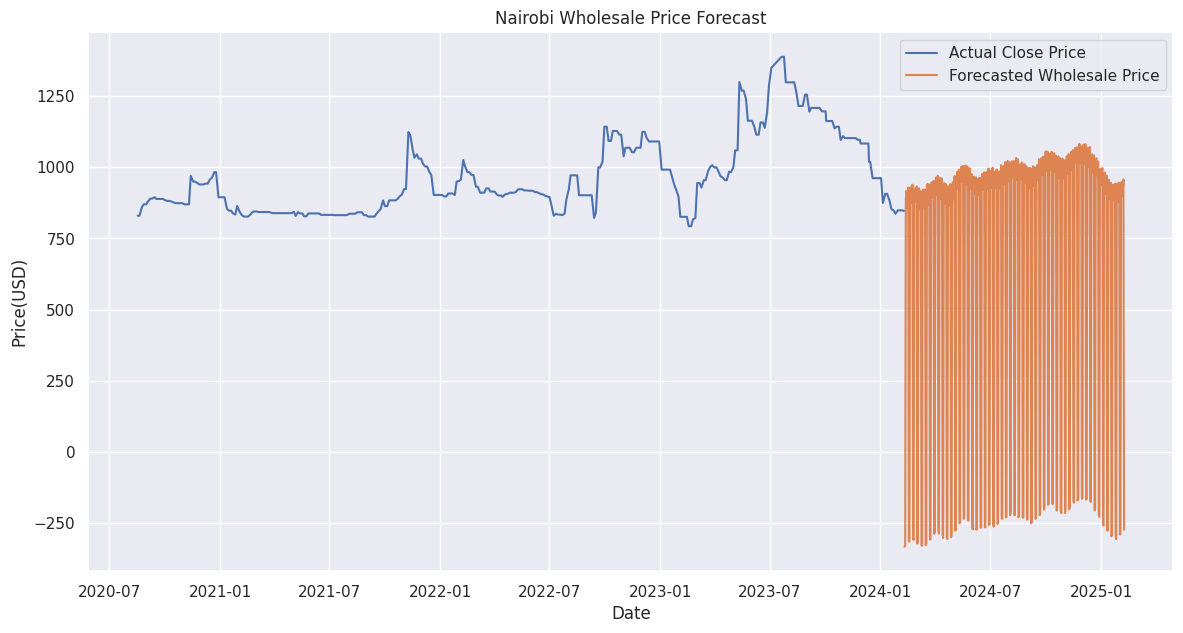

In [ ]:
# Load data
df = pd.read_excel("/content/Wholesale Sugar Prices.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['date', 'nairobi']].rename(columns={'date': 'ds', 'nairobi': 'y'})

# Drop rows with any NaN values
data.dropna(inplace=True)

data.isna().sum()

# Initialize Prophet model
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                n_changepoints=1,)
    # yearly_seasonality=True,)
    # yearly_seasonality=True,
    # weekly_seasonality=False,
    # daily_seasonality=False,
    # # changepoint_range=0.8,
    # # n_changepoints=261,
    # seasonality_mode='multiplicative')
    # # changepoint_prior_scale=0.08)

# Fit the model to your data
model.fit(data)

# Make one year forecast
future = model.make_future_dataframe(periods=365, freq='D')  # Generate dates for every day

# Filter out dates for Tuesdays and Fridays
future_tuesday = pd.DataFrame({'ds': pd.date_range(start=future['ds'].min(), end=future['ds'].max(), freq='W-TUE')})
future_friday = pd.DataFrame({'ds': pd.date_range(start=future['ds'].min(), end=future['ds'].max(), freq='W-FRI')})

# Concatenate the two date ranges
future_selected = pd.concat([future_tuesday, future_friday])#.sort_values('ds')

# Filter future dates that are within the forecast horizon
future_selected = future_selected[future_selected['ds'] > future['ds'].max()]

# Append the selected future dates to the existing DataFrame
future = pd.concat([future, future_selected])

# Reset index
future.reset_index(drop=True, inplace=True)

# Now, you can use this 'future' DataFrame for forecasting with Prophet

# Generate forecast
forecast = model.predict(future)

# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat_lower']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat_lower']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat_lower']))
r2 = r2_score(actual_data['y'], forecast_data['yhat_lower'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat_lower'], label='Forecasted Wholesale Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.title('Nairobi Wholesale Price Forecast')
plt.legend()
plt.show()


In [ ]:
future_selected

Empty DataFrame
Columns: [ds]
Index: []


## Time-Series Forecast of Global Sugar 11 Prices - SBY00


In [ ]:
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")


In [ ]:
df.head()

Date  Open  High   Low  Close  Change    %Chg  Volume  Open Int
0 2000-01-03  6.20  6.20  6.20   6.20    0.07  +1.14%       0         0
1 2000-01-04  5.84  5.84  5.84   5.84   -0.36 -0.0581       0         0
2 2000-01-05  5.86  5.86  5.86   5.86    0.02  +0.34%       0         0
3 2000-01-06  5.92  5.92  5.92   5.92    0.06  +1.02%       0         0
4 2000-01-07  5.85  5.85  5.85   5.85   -0.07 -0.0118       0         0

In [ ]:
df.tail()

Date   Open   High    Low  Close  Change    %Chg  Volume  Open Int
6061 2024-02-14  23.40  23.40  23.40  23.40    0.10  +0.43%       0         0
6062 2024-02-15  22.76  22.76  22.76  22.76   -0.64 -0.0274       0         0
6063 2024-02-16  23.05  23.05  23.05  23.05    0.29  +1.27%       0         0
6064 2024-02-20  22.79  22.79  22.79  22.79   -0.26 -0.0113       0         0
6065 2024-02-21  22.84  22.84  22.84  22.84    0.05  +0.22%       0         0

In [ ]:
data = df[['Date', 'Close']]
data.head()

Date  Close
0 2000-01-03   6.20
1 2000-01-04   5.84
2 2000-01-05   5.86
3 2000-01-06   5.92
4 2000-01-07   5.85

In [ ]:
Prophet

prophet.forecaster.Prophet

### Check for Yearly Seasonality

In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
yearly_seasonality = 'yearly' in model.seasonalities.keys()

if yearly_seasonality:
    print("Yearly seasonality exists.")
else:
    print("No yearly seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/p6zanu5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/ff0g86_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

Yearly seasonality exists.


In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
monthly_seasonality = 'monthly' in model.seasonalities.keys()

if monthly_seasonality:
    print("Monthly seasonality exists.")
else:
    print("No monthly seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/sacmiid4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/00rekp_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

No monthly seasonality.


In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
weekly_seasonality = 'weekly' in model.seasonalities.keys()

if monthly_seasonality:
    print("Weekly seasonality exists.")
else:
    print("No weekly seasonality.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See

No weekly seasonality.


In [ ]:
# Initialize Prophet model
model = Prophet()

# Add your data to the model (assuming your data is stored in a DataFrame named 'data')
model.fit(data)

# Check if there's yearly seasonality
daily_seasonality = 'daily' in model.seasonalities.keys()

if daily_seasonality:
    print("Daily seasonality exists.")
else:
    print("No daily seasonality.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/vkfkdets.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/frrpl_xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

No daily seasonality.


#### Automatically Generate Potential Changepoints

In [ ]:
import pandas as pd

def generate_changepoints(data, num_changepoints=6):
    """
    Generate potential changepoints based on evenly spaced intervals.

    Args:
        data (pd.DataFrame): Time series data.
        num_changepoints (int): Number of changepoints to generate.

    Returns:
        list: List of dates at which to include potential changepoints.
    """
    start_date = data['ds'].min()
    end_date = data['ds'].max()
    interval = (end_date - start_date) / (num_changepoints + 1)
    changepoints = [start_date + (i + 1) * interval for i in range(num_changepoints)]
    return changepoints


In [ ]:
# Generate potential changepoints based on specific criteria
changepoints = generate_changepoints(data)


In [ ]:
# Create a Prophet instance
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=1)

# Print default parameters
print("Default Prophet Parameters:")
print(model.params)


Default Prophet Parameters:
{}


In [ ]:
# Fit the model with some data
model.fit(data)

# Print parameters after fitting
print("Prophet Parameters after Fitting:")
model.params


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/vogs4ypb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/q5mvqd7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/p

Prophet Parameters after Fitting:


OrderedDict([('lp__', array([[16094.4]])),
             ('k', array([[4.9701]])),
             ('m', array([[0.120653]])),
             ('delta',
              array([[ -6.63997  ,   0.29547  ,   2.63477  ,  -3.19559  ,   4.34534  ,
                       -2.02492  ,   6.16294  , -12.1542   ,   6.22861  ,   0.789747 ,
                       -0.0572007,   4.63239  ,   1.22621  ,  -9.2327   ,  -4.35121  ,
                        3.49091  ,   2.02622  ,   0.650369 ,  -3.85619  ,   7.81098  ,
                        0.0247723,  -9.89904  ,   5.34067  ,  -0.424489 ,   2.97666  ]])),
             ('sigma_obs', array([[0.0420174]])),
             ('beta',
              array([[-5.20686e-03,  9.90250e-03,  3.23783e-03,  4.99627e-04,
                       3.18228e-03, -5.65141e-03,  3.90076e-03, -9.69180e-05,
                      -1.13798e-03,  4.98366e-04, -7.67291e-04,  1.01479e-03,
                      -2.24018e-04, -2.13456e-04,  1.15106e-03, -3.88333e-06,
                       3.28357e

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/700pa87m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/gwio2y5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

MAPE: 9.889124152822086
RMSE: 2.5356426266316467
R-squared: 0.2678736136271822


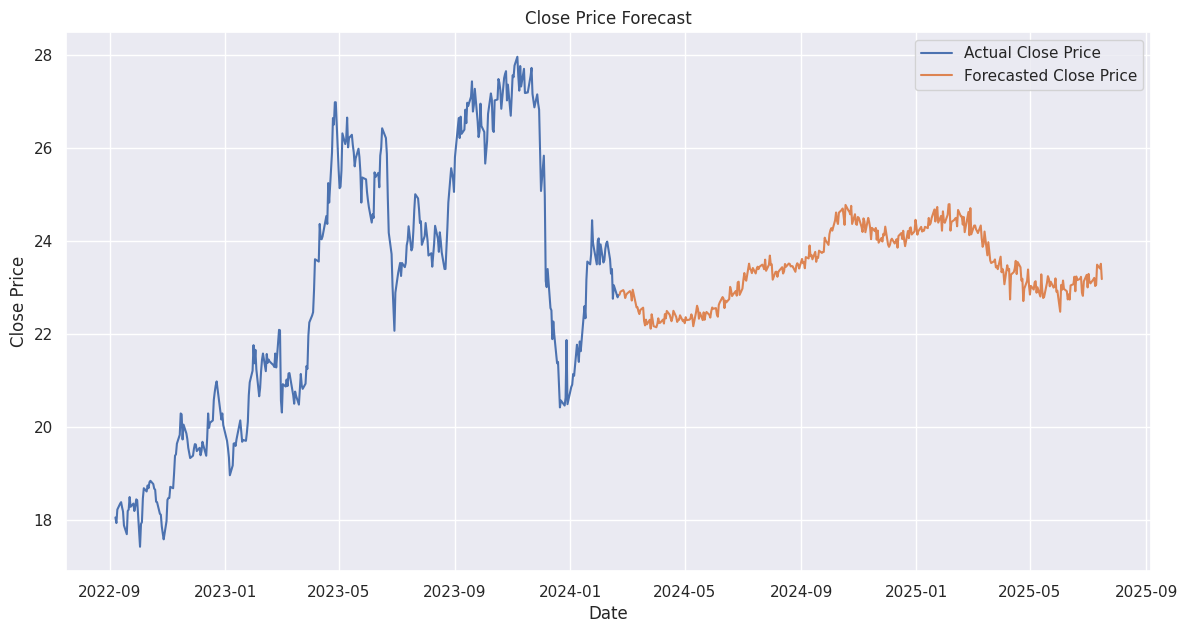

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True)
# n_changepoints=261,
                # yearly_seasonality=True,)
    # yearly_seasonality=True,
    # weekly_seasonality=False,
    # daily_seasonality=False,
    # # changepoint_range=0.8,
    # # n_changepoints=261,
    # seasonality_mode='multiplicative')
    # # changepoint_prior_scale=0.08)

# Fit the model to your data
model.fit(data)

# Make one year forecast
future = model.make_future_dataframe(periods=365, freq='B')

# Generate forecast
forecast = model.predict(future)

# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat_lower']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat_lower']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat_lower']))
r2 = r2_score(actual_data['y'], forecast_data['yhat_lower'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat_lower'], label='Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()


In [ ]:
import pickle
import pickle
from prophet import Prophet

# Assuming you have already trained a Prophet model named 'model'
# Serialize and save the model to a file
with open("prophet_model_2.pkl", "wb") as f:
    pickle.dump(model, f)
# Load the saved Prophet model from file
with open("prophet_model_2.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:
forecast_data.head(60)

ds  yhat_lower
0  2024-02-22   22.845694
1  2024-02-23   22.911207
2  2024-02-26   22.946361
3  2024-02-27   22.899063
4  2024-02-28   22.775302
5  2024-02-29   22.841313
6  2024-03-01   22.870887
7  2024-03-04   22.923802
8  2024-03-05   22.883830
9  2024-03-06   22.721436
10 2024-03-07   22.953443
11 2024-03-08   22.857950
12 2024-03-11   22.574955
13 2024-03-12   22.577269
14 2024-03-13   22.486571
15 2024-03-14   22.430072
16 2024-03-15   22.517639
17 2024-03-18   22.567611
18 2024-03-19   22.281127
19 2024-03-20   22.185722
20 2024-03-21   22.309817
21 2024-03-22   22.208532
22 2024-03-25   22.306339
23 2024-03-26   22.115301
24 2024-03-27   22.424565
25 2024-03-28   22.311393
26 2024-03-29   22.170431
27 2024-04-01   22.145496
28 2024-04-02   22.215172
29 2024-04-03   22.338400
30 2024-04-04   22.238874
31 2024-04-05   22.242868
32 2024-04-08   22.311206
33 2024-04-09   22.226225
34 2024-04-10   22.428676
35 2024-04-11   22.336409
36 2024-04-12   22.496612
37 2024-04-15   22.417925
38 2024-04-16   22.344112
39 2024-04-17   22.276248
40 2024-04-18   22.355678
41 2024-04-19   22.500118
42 2024-04-22   22.365942
43 2024-04-23   22.260499
44 2024-04-24   22.306166
45 2024-04-25   22.305309
46 2024-04-26   22.403193
47 2024-04-29   22.277430
48 2024-04-30   22.307317
49 2024-05-01   22.232821
50 2024-05-02   22.362902
51 2024-05-03   22.298898
52 2024-05-06   22.309242
53 2024-05-07   22.333584
54 2024-05-08   22.423780
55 2024-05-09   22.354284
56 2024-05-10   22.168617
57 2024-05-13   22.474847
58 2024-05-14   22.608752
59 2024-05-15   22.539167

MAPE: 15.817733652845739
RMSE: 3.9593190182042166
R-squared: -0.7850523753221939


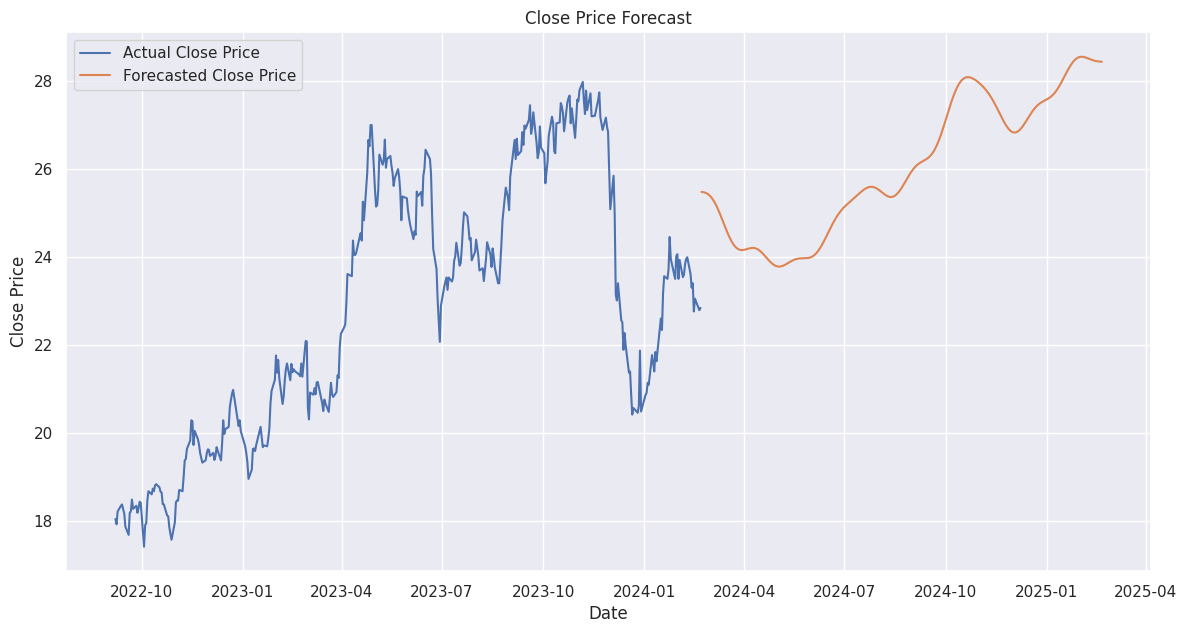

In [ ]:
7# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat']))
r2 = r2_score(actual_data['y'], forecast_data['yhat'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/1940d9i9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/wiv888g2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/p

MAPE: 15.817733652845739
RMSE: 3.9593190182042166
R-squared: -0.7850523753221939


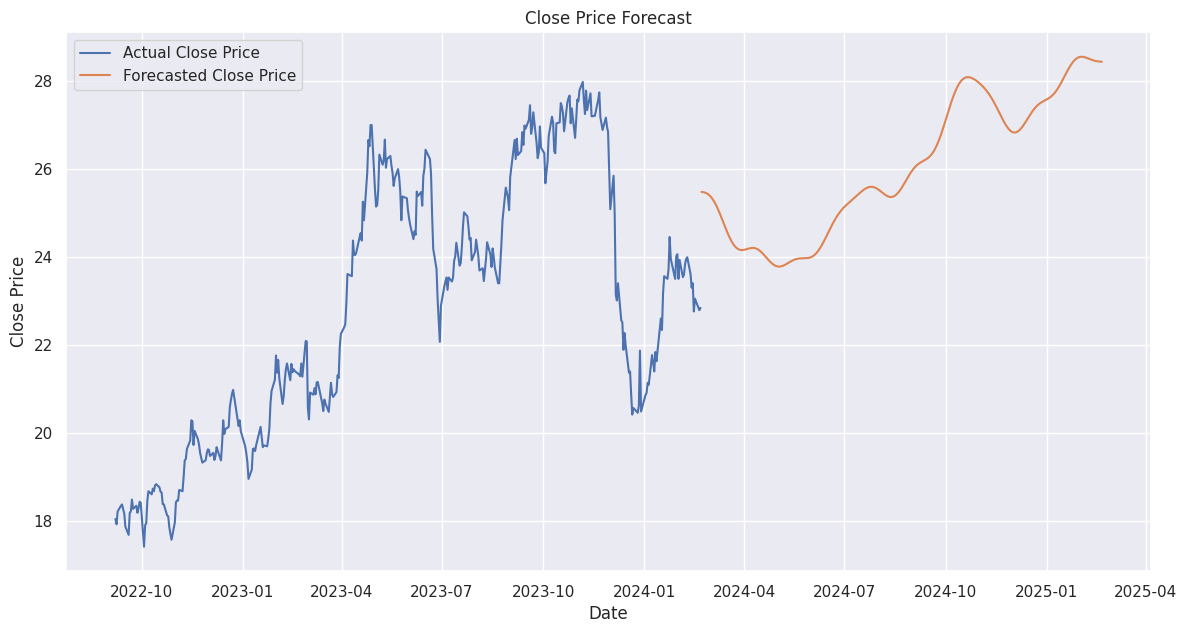

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_range=0.8,
                # n_changepoints=261,
                seasonality_mode='multiplicative')
                # changepoint_prior_scale=0.08)

# Fit the model to your data
model.fit(data)

# Make one year forecast
future = model.make_future_dataframe(periods=365, freq='D')

# Generate forecast
forecast = model.predict(future)

# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat']))
r2 = r2_score(actual_data['y'], forecast_data['yhat'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/x5kdqt31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/st7rwi_k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/p

MAPE: 10.002235460525338
RMSE: 2.5157986979491245
R-squared: 0.27928800978826673


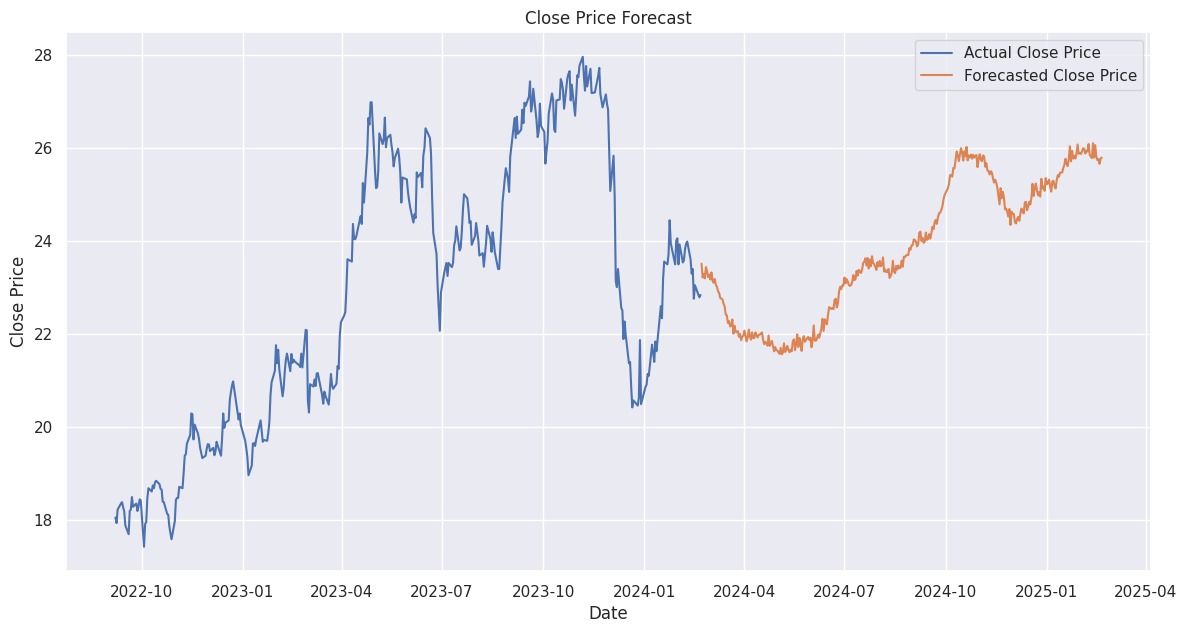

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_range=0.8,
                n_changepoints=261,
                seasonality_mode='multiplicative')
                # changepoint_prior_scale=0.08)

# Fit the model to your data
model.fit(data)

# Make one year forecast
future = model.make_future_dataframe(periods=365, freq='D')

# Generate forecast
forecast = model.predict(future)

# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat_lower']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat_lower']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat_lower']))
r2 = r2_score(actual_data['y'], forecast_data['yhat_lower'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat_lower'], label='Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()


MAPE: 15.654783634321928
RMSE: 3.910802102214735
R-squared: -0.741572872009578


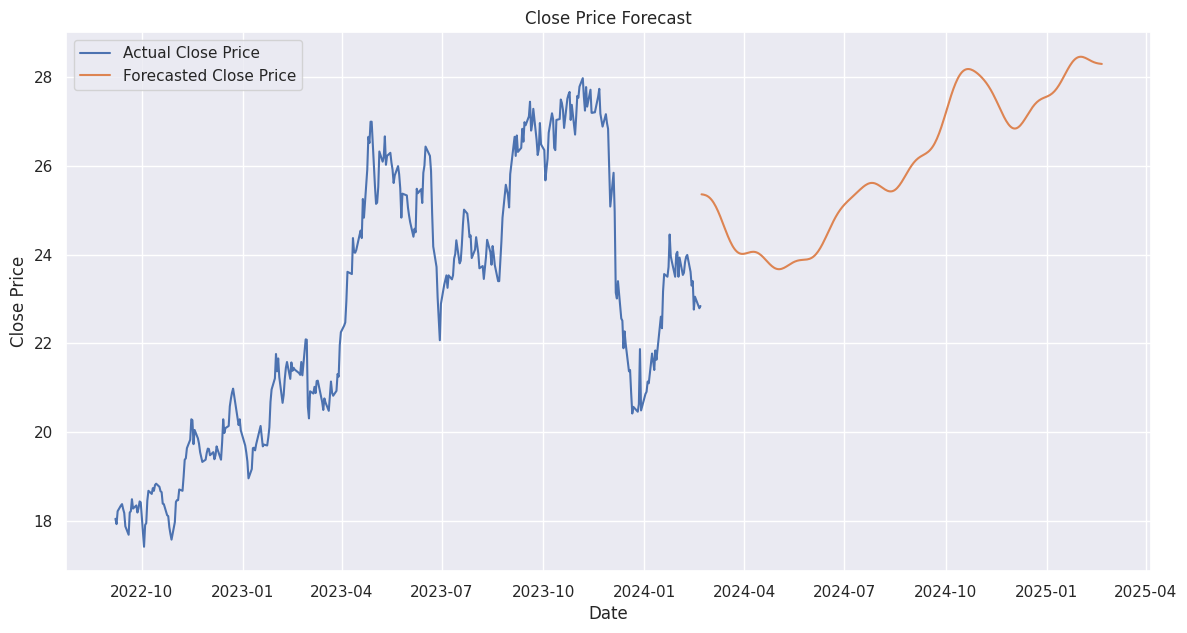

In [ ]:
7# Extracting actual and predicted values for the forecast period
forecast_data = forecast[['ds', 'yhat']].tail(365).reset_index(drop=True)
actual_data = data[['ds', 'y']].tail(365).reset_index(drop=True)

# Calculate metrics: MAPE, RMSE, R-squared
mape = np.mean(np.abs((actual_data['y'] - forecast_data['yhat']) / actual_data['y'])) * 100
rmse = np.sqrt(mean_squared_error(actual_data['y'], forecast_data['yhat']))
r2 = r2_score(actual_data['y'], forecast_data['yhat'])

# Print metrics
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-squared:", r2)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(actual_data['ds'], actual_data['y'], label='Actual Close Price')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Forecasted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()


#### Perform Cross Validation

In [ ]:
len(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6066

In [ ]:
# from prophet.diagnostics import cross_validation, performance_metrics


# # Load data
# df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# # Select relevant columns and rename them to 'ds' and 'y'
# data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# # Initialize Prophet model
# model = Prophet()

# # Fit the model to your data
# model.fit(data)

# # Perform cross-validation
# cv_results = cross_validation(model=model, initial='6066 days', period='261 days', horizon='730 days')

# # Compute performance metrics
# metrics = performance_metrics(cv_results)
# print(metrics)

# # Plot the forecast
# fig = plt.figure(figsize=(10, 6))
# model.plot(cv_results, xlabel='Date', ylabel='Close Price')
# plt.title('Cross-Validated Forecast')
# plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/c2jb05dj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/ixi8s90s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/fqsy4g32.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp11to7kg0/60ypkxh5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/p

     horizon        mse      rmse       mae      mape     mdape     smape  \
0    36 days  13.537518  3.679337  2.917301  0.177036  0.153155  0.184788   
1    37 days  13.648820  3.694431  2.934938  0.178325  0.164806  0.186055   
2    38 days  13.971656  3.737868  2.979633  0.180439  0.164806  0.188512   
3    39 days  14.043273  3.747435  2.993518  0.181548  0.158327  0.189572   
4    40 days  14.181451  3.765827  3.020738  0.183421  0.178137  0.191504   
..       ...        ...       ...       ...       ...       ...       ...   
325 361 days  25.227148  5.022663  4.030695  0.245973  0.217181  0.264700   
326 362 days  25.243889  5.024330  4.026253  0.245047  0.217181  0.264332   
327 363 days  25.126044  5.012589  4.005807  0.243588  0.212969  0.263388   
328 364 days  24.894133  4.989402  3.987307  0.242953  0.212969  0.263243   
329 365 days  25.025621  5.002561  4.014122  0.244882  0.218824  0.265109   

     coverage  
0    0.509960  
1    0.507684  
2    0.501992  
3    0.5004

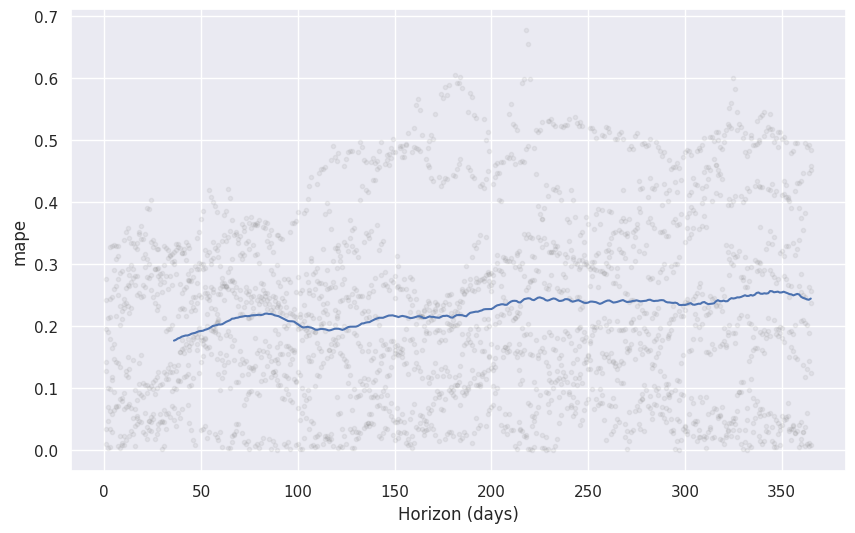

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
model = Prophet()
# Fit the model to your data
model.fit(data)
# Define a dictionary of hyperparameters to test
params_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Perform cross-validation with the specified hyperparameter grid
cv_results = cross_validation(model=model, initial='6066 days', period='261 days', horizon='365 days')

# Compute performance metrics
metrics = performance_metrics(cv_results)

# Print the performance metrics
print(metrics)

# Plot the performance metrics
fig = plot_cross_validation_metric(cv_results, metric='mape')


In [ ]:
# Find the row with the lowest 'mape' metric
best_metric_row = metrics.loc[metrics['mape'].idxmax()]

# Print the best metrics
print("Best metrics:")
print(best_metric_row)

Best metrics:
horizon     361 days 00:00:00
mse                 57.395529
rmse                 7.575984
mae                  5.713423
mape                 0.364818
mdape                0.277068
smape                0.368786
coverage             0.427965
Name: 324, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (D

RMSE for historical data: 1.603057022532158
R^2 for historical data: 0.9312208982661463
MAPE for historical data: 7.28504921049649
MAPE for forecasted data: 7.425750166913174


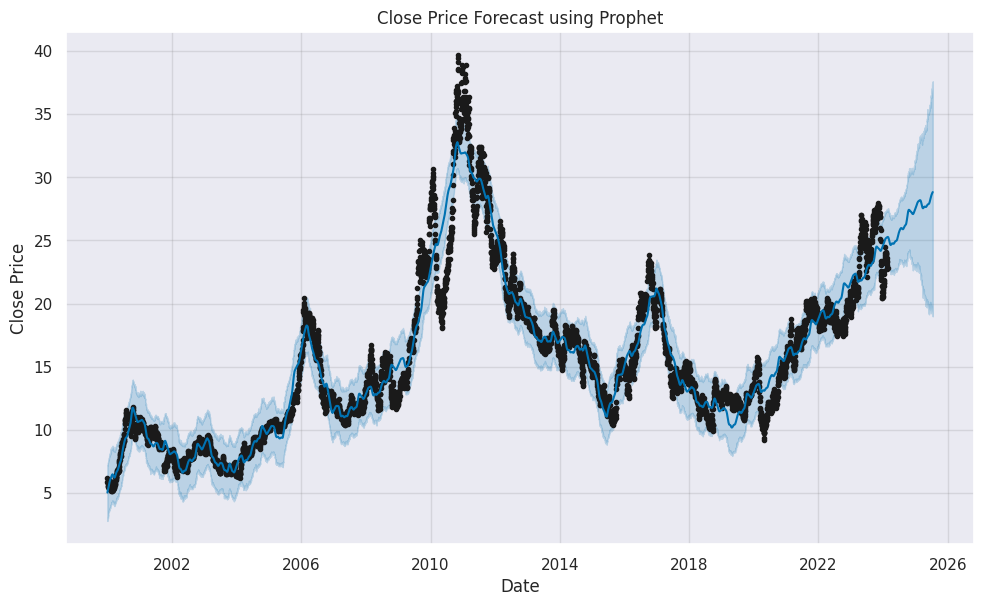

In [ ]:
# Generate future timestamps for one year forecast
future = model.make_future_dataframe(periods=365, freq='B')

# Make predictions
forecast = model.predict(future)

# Calculate RMSE and R2 for the historical data (training set)
train_data = data[data['ds'] <= df['Date'].iloc[-365]]  # Training data until last year
train_forecast = forecast.iloc[:len(train_data)]
rmse_train = np.sqrt(mean_squared_error(train_data['y'], train_forecast['yhat']))
r2_train = r2_score(train_data['y'], train_forecast['yhat'])

print("RMSE for historical data:", rmse_train)
print("R^2 for historical data:", r2_train)

# Calculate MAPE for historical data (training set)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

train_mape = calculate_mape(train_data['y'], train_forecast['yhat'])
print("MAPE for historical data:", train_mape)

# Calculate MAPE for forecasted data
forecast_mape = calculate_mape(data['y'], forecast['yhat'][:len(data)])
print("MAPE for forecasted data:", forecast_mape)


# Plot forecasts
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using Prophet')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


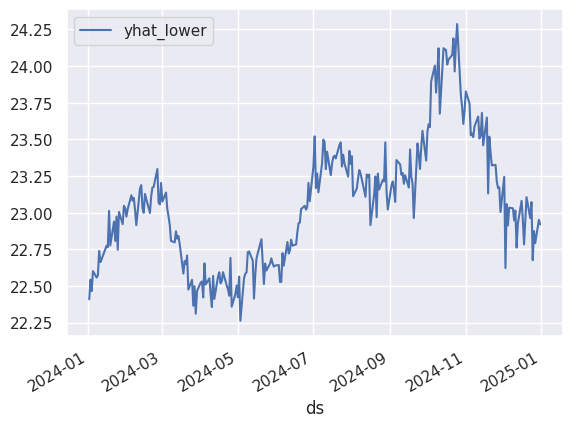

In [ ]:
forecast_results = forecast.query("ds >= '2024-01-01' & ds <= '2024-12-31'")#[:-165]

forecast_results.set_index('ds', inplace=True)
forecast_results[['yhat_lower']].plot();

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


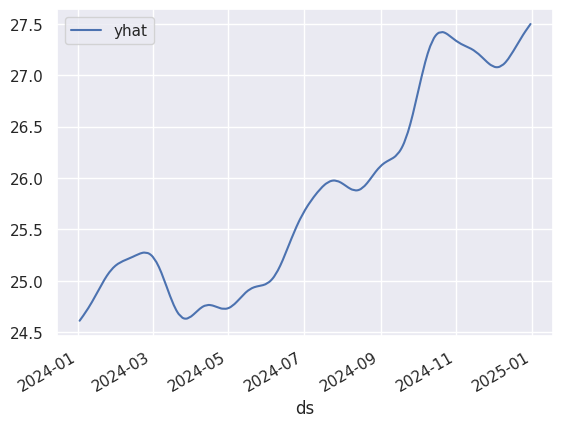

In [ ]:
forecast_results = forecast.query("ds >= '2024-01-01' & ds <= '2024-12-31'")#[:-165]

forecast_results.set_index('ds', inplace=True)
forecast_results[['yhat']].plot();

In [ ]:
forecast_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2024-01-02  24.367500   22.408938   26.862552    24.367500    24.367500   
2024-01-03  24.375464   22.543101   26.615755    24.375464    24.375464   
2024-01-04  24.383429   22.465012   26.901598    24.383429    24.383429   
2024-01-05  24.391393   22.601110   26.805594    24.391393    24.391393   
2024-01-08  24.415286   22.557188   26.721802    24.415286    24.415286   
...               ...         ...         ...          ...          ...   
2024-12-25  27.218756   22.675701   31.168712    23.169526    30.281400   
2024-12-26  27.226721   22.874915   31.283817    23.155511    30.303569   
2024-12-27  27.234685   22.792164   31.168684    23.141496    30.332406   
2024-12-30  27.258578   22.951398   31.228988    23.143410    30.376697   
2024-12-31  27.266543   22.919872   31.165264    23.129395    30.405060   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2024-01-02        0.242789              0.242789              0.242789   
2024-01-03        0.251509              0.251509              0.251509   
2024-01-04        0.260363              0.260363              0.260363   
2024-01-05        0.269458              0.269458              0.269458   
2024-01-08        0.299109              0.299109              0.299109   
...                    ...                   ...                   ...   
2024-12-25        0.174218              0.174218              0.174218   
2024-12-26        0.184833              0.184833              0.184833   
2024-12-27        0.194986              0.194986              0.194986   
2024-12-30        0.223086              0.223086              0.223086   
2024-12-31        0.231908              0.231908              0.231908   

              yearly  yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                       
2024-01-02  0.242789      0.242789      0.242789                   0.0   
2024-01-03  0.251509      0.251509      0.251509                   0.0   
2024-01-04  0.260363      0.260363      0.260363                   0.0   
2024-01-05  0.269458      0.269458      0.269458                   0.0   
2024-01-08  0.299109      0.299109      0.299109                   0.0   
...              ...           ...           ...                   ...   
2024-12-25  0.174218      0.174218      0.174218                   0.0   
2024-12-26  0.184833      0.184833      0.184833                   0.0   
2024-12-27  0.194986      0.194986      0.194986                   0.0   
2024-12-30  0.223086      0.223086      0.223086                   0.0   
2024-12-31  0.231908      0.231908      0.231908                   0.0   

            multiplicative_terms_lower  multiplicative_terms_upper       yhat  
ds                                                                             
2024-01-02                         0.0                         0.0  24.610289  
2024-01-03                         0.0                         0.0  24.626974  
2024-01-04                         0.0                         0.0  24.643792  
2024-01-05                         0.0                         0.0  24.660851  
2024-01-08                         0.0                         0.0  24.714395  
...                                ...                         ...        ...  
2024-12-25                         0.0                         0.0  27.392974  
2024-12-26                         0.0                         0.0  27.411554  
2024-12-27                         0.0                         0.0  27.429671  
2024-12-30                         0.0                         0.0  27.481665  
2024-12-31                         0.0                         0.0  27.498451  

[259 rows x 15 columns]

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-pack

RMSE for historical data: 1.7338473838991144
R^2 for historical data: 0.9195399510143076
MAPE for historical data: 8.579201599153977
MAPE for forecasted data: 8.643407637415065


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


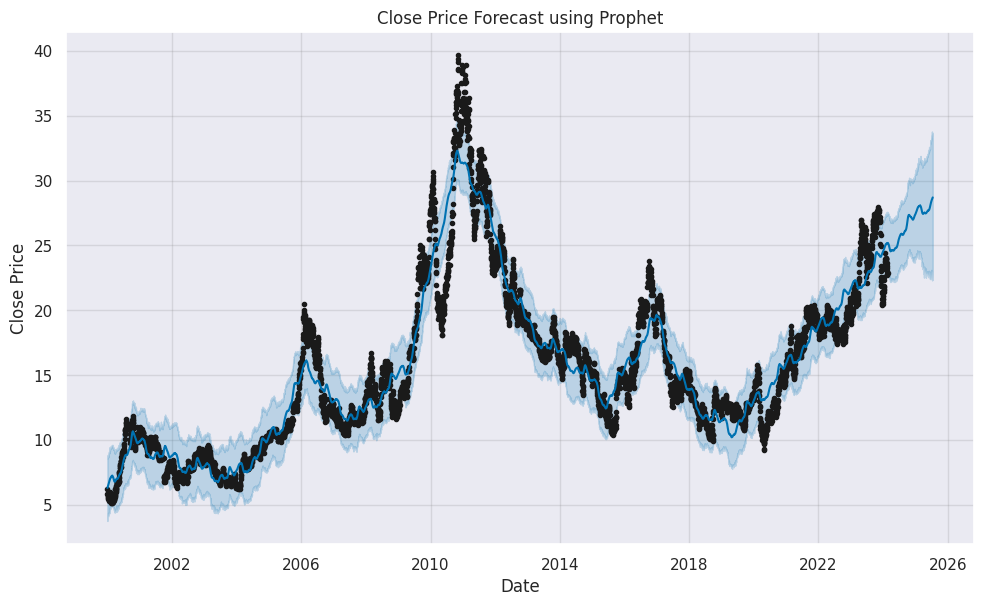

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(data)

# Generate future timestamps for one year forecast
future = model.make_future_dataframe(periods=365, freq='B')

# Make predictions
forecast = model.predict(future)

# Calculate RMSE and R2 for the historical data (training set)
train_data = data[data['ds'] <= df['Date'].iloc[-365]]  # Training data until last year
train_forecast = forecast.iloc[:len(train_data)]
rmse_train = np.sqrt(mean_squared_error(train_data['y'], train_forecast['yhat']))
r2_train = r2_score(train_data['y'], train_forecast['yhat'])

print("RMSE for historical data:", rmse_train)
print("R^2 for historical data:", r2_train)

# Calculate MAPE for historical data (training set)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

train_mape = calculate_mape(train_data['y'], train_forecast['yhat'])
print("MAPE for historical data:", train_mape)

# Calculate MAPE for forecasted data
forecast_mape = calculate_mape(data['y'], forecast['yhat'][:len(data)])
print("MAPE for forecasted data:", forecast_mape)


# Plot forecasts
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using Prophet')
plt.show()


#### Better Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3dq4miu4/x5br6wp2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3dq4miu4/5y3_7tn9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running 

RMSE for historical data: 1.7338473838991144
R^2 for historical data: 0.9195399510143076
MAPE for historical data: 8.579201599153977
MAPE for forecasted data: 8.643407637415065


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


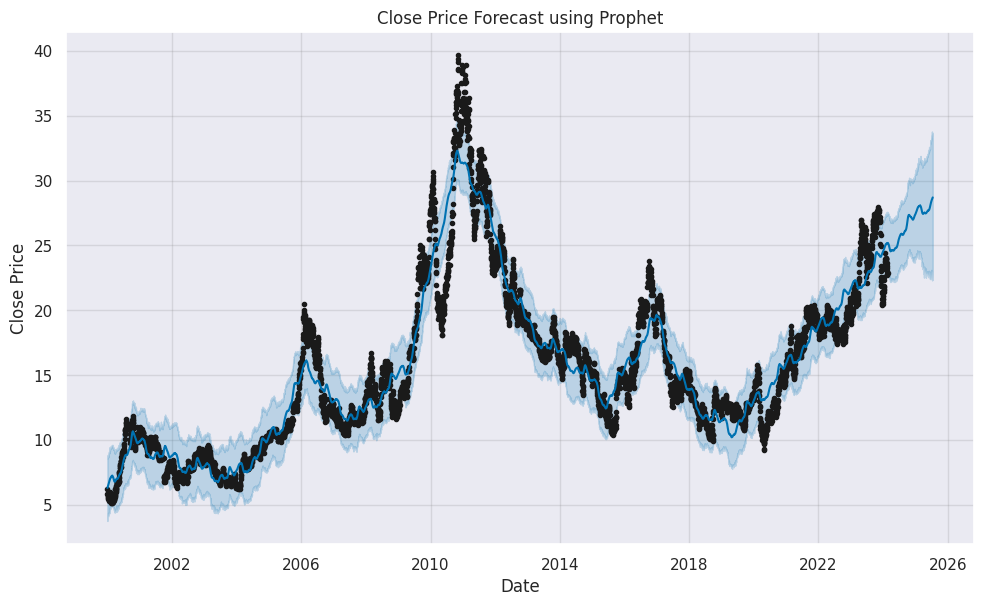

In [ ]:
# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns and rename them to 'ds' and 'y'
data = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit Prophet model
model = Prophet()
model.fit(data)

# Generate future timestamps for one year forecast
future = model.make_future_dataframe(periods=365, freq='B')

# Make predictions
forecast = model.predict(future)

# Calculate RMSE and R2 for the historical data (training set)
train_data = data[data['ds'] <= df['Date'].iloc[-365]]  # Training data until last year
train_forecast = forecast.iloc[:len(train_data)]
rmse_train = np.sqrt(mean_squared_error(train_data['y'], train_forecast['yhat']))
r2_train = r2_score(train_data['y'], train_forecast['yhat'])

print("RMSE for historical data:", rmse_train)
print("R^2 for historical data:", r2_train)

# Calculate MAPE for historical data (training set)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

train_mape = calculate_mape(train_data['y'], train_forecast['yhat'])
print("MAPE for historical data:", train_mape)

# Calculate MAPE for forecasted data
forecast_mape = calculate_mape(data['y'], forecast['yhat'][:len(data)])
print("MAPE for forecasted data:", forecast_mape)


# Plot forecasts
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using Prophet')
plt.show()


In [ ]:
# Convert Date to a datetime column
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')

# Set the index to the 'Date' column
# Make Date the index
data.set_index('Date', inplace=True)

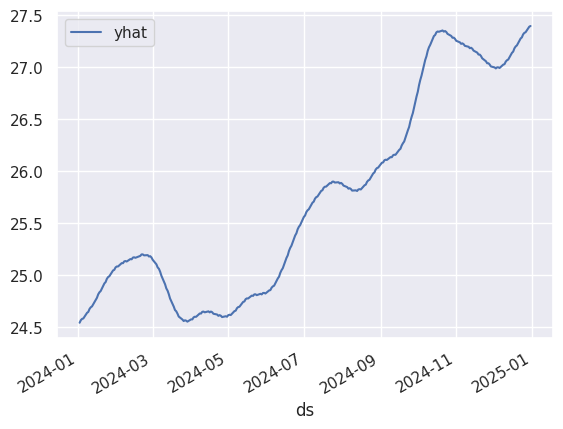

In [ ]:
forecast_results = forecast.query("ds >= '2024-01-01' & ds <= '2024-12-31'")#[:-165]

forecast_results.set_index('ds', inplace=True)
forecast_results[['yhat']].plot();

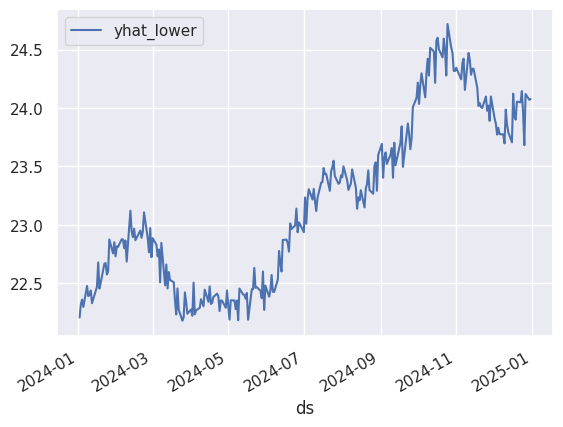

In [ ]:
forecast_results[['yhat_lower']].plot();

In [ ]:
forecast_results.to_excel('SBY00_2024_Forecast_2_23_2024.xlsx')

In [ ]:
forecast_results.head(60)

trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
ds                                                                        
2024-01-02  24.296392   22.205300   26.856049    24.296392    24.296392   
2024-01-03  24.304263   22.320289   26.988606    24.304263    24.304263   
2024-01-04  24.312134   22.358620   26.951062    24.312134    24.312134   
2024-01-05  24.320005   22.295454   26.867747    24.320005    24.320005   
2024-01-08  24.343617   22.475273   26.964783    24.343617    24.343617   
2024-01-09  24.351488   22.388507   26.798424    24.351488    24.351488   
2024-01-10  24.359359   22.399257   26.931834    24.359359    24.359359   
2024-01-11  24.367230   22.436435   26.943045    24.367230    24.367230   
2024-01-12  24.375101   22.327884   27.067601    24.375101    24.375101   
2024-01-16  24.406585   22.468620   26.977207    24.406585    24.406585   
2024-01-17  24.414456   22.676961   27.142026    24.414456    24.414456   
2024-01-18  24.422327   22.453121   27.145197    24.422327    24.422327   
2024-01-19  24.430198   22.501146   27.175827    24.430198    24.430198   
2024-01-22  24.453811   22.666418   27.276781    24.453811    24.453811   
2024-01-23  24.461682   22.671062   27.225441    24.461682    24.461682   
2024-01-24  24.469553   22.573719   27.153749    24.469553    24.469553   
2024-01-25  24.477424   22.599331   27.302168    24.477424    24.477424   
2024-01-26  24.485295   22.873607   27.215991    24.485295    24.485295   
2024-01-29  24.508908   22.753872   27.436390    24.508908    24.508908   
2024-01-30  24.516779   22.850099   27.237347    24.516779    24.516779   
2024-01-31  24.524650   22.729171   27.401272    24.524650    24.524650   
2024-02-01  24.532521   22.814370   27.274863    24.532521    24.532521   
2024-02-02  24.540392   22.810046   27.265754    24.540392    24.540392   
2024-02-05  24.564005   22.875560   27.502940    24.564005    24.564005   
2024-02-06  24.571876   22.874400   27.445393    24.571876    24.571876   
2024-02-07  24.579747   22.798481   27.402779    24.579747    24.579747   
2024-02-08  24.587617   22.864640   27.459881    24.587617    24.587617   
2024-02-09  24.595488   22.684335   27.369320    24.595488    24.595488   
2024-02-12  24.619101   23.120010   27.528343    24.619101    24.619101   
2024-02-13  24.626972   22.944559   27.593554    24.626972    24.626972   
2024-02-14  24.634843   22.893131   27.436100    24.634843    24.634843   
2024-02-15  24.642714   22.966435   27.449500    24.642714    24.642714   
2024-02-16  24.650585   22.867324   27.281122    24.650585    24.650585   
2024-02-20  24.682069   22.949668   27.455684    24.682069    24.682069   
2024-02-21  24.689940   22.887498   27.344154    24.689940    24.689940   
2024-02-22  24.697811   22.941062   27.578835    24.697811    24.697811   
2024-02-23  24.705682   23.105770   27.463201    24.705682    24.705682   
2024-02-26  24.729295   22.883869   27.440091    24.729295    24.729295   
2024-02-27  24.737166   22.764252   27.479067    24.737166    24.737166   
2024-02-28  24.745037   22.971050   27.485512    24.745037    24.745037   
2024-02-29  24.752908   22.722343   27.473172    24.752908    24.752908   
2024-03-01  24.760779   22.884656   27.419197    24.760779    24.760779   
2024-03-04  24.784392   22.829215   27.430934    24.784392    24.784392   
2024-03-05  24.792263   22.729281   27.337513    24.792263    24.792263   
2024-03-06  24.800134   22.787798   27.313630    24.800134    24.800134   
2024-03-07  24.808005   22.505869   27.305085    24.808005    24.808005   
2024-03-08  24.815876   22.844724   27.294303    24.815876    24.815876   
2024-03-11  24.839489   22.480437   27.110094    24.839489    24.839489   
2024-03-12  24.847360   22.659475   27.278627    24.847360    24.847360   
2024-03-13  24.855230   22.454161   27.111168    24.855230    24.855230   
2024-03-14  24.863101   22.594116   27.147260    24.863101    24.863101   
2024-03-15  24.870972   22.527069   27.09

In [ ]:
import pickle
from prophet import Prophet

# Assuming you have already trained a Prophet model named 'model'
# Serialize and save the model to a file
with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
import pickle

# Load the saved Prophet model from file
with open("prophet_model.pkl", "rb") as f:
    model = pickle.load(f)

#### Including Weekends

<ipython-input-10-57b89beab2ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWar

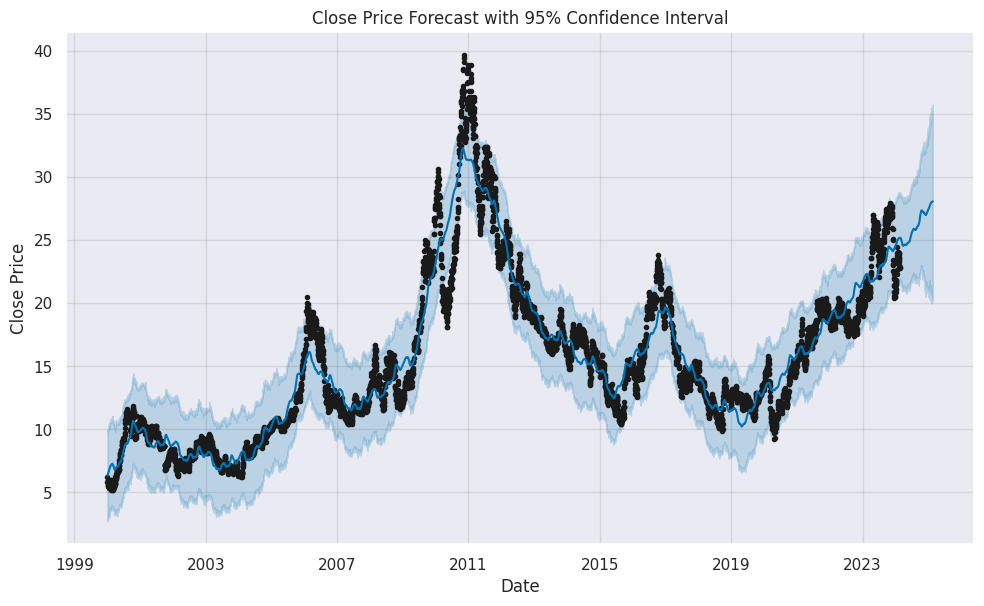

In [ ]:
# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet(interval_width=0.95)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.7858325073232704
R-squared: 0.918536168200205


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### Removing Weekends and Seasonality

<ipython-input-12-4f2356faf56f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-12-4f2356faf56f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

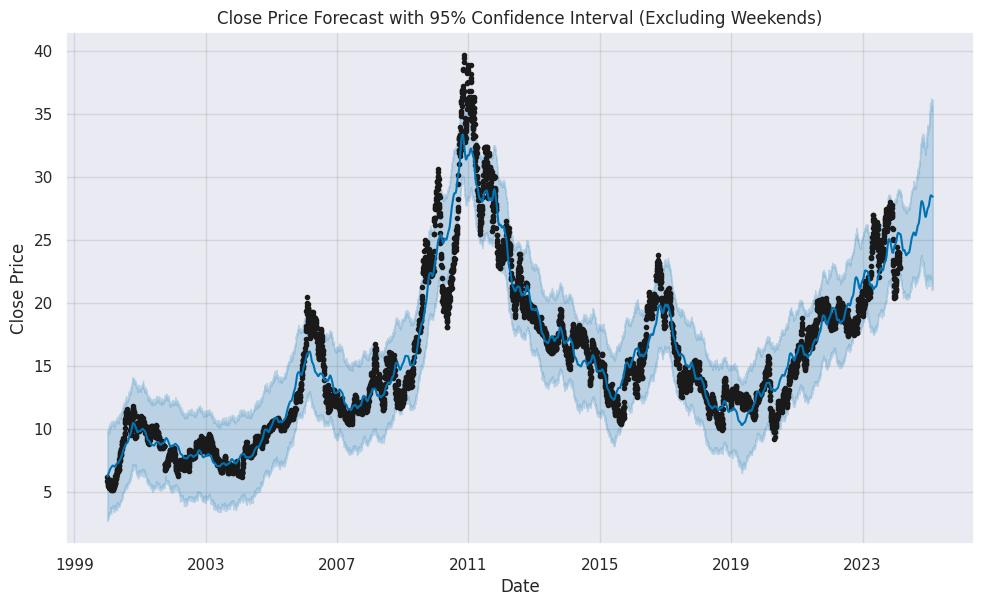

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.95,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.05,  # Regularization parameter for automatic changepoint detection
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=False,  # Disable weekly seasonality
    daily_seasonality=False,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.7443603606894331
R-squared: 0.9222758817202711


In [ ]:
# Assuming 'Date' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter dates up to December 2023
forecasted_df = forecast[forecast['ds'] >= '2023-11-01']

# Print the filtered data
forecasted_df.head(60)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
5990 2023-11-01  23.717817   21.660950   28.331725    23.717817    23.717817   
5991 2023-11-02  23.725617   21.871574   28.126337    23.725617    23.725617   
5992 2023-11-03  23.733417   21.547376   28.438561    23.733417    23.733417   
5993 2023-11-06  23.756818   21.449545   28.480203    23.756818    23.756818   
5994 2023-11-07  23.764619   21.421062   28.330653    23.764619    23.764619   
5995 2023-11-08  23.772419   21.425439   28.230986    23.772419    23.772419   
5996 2023-11-09  23.780219   21.756234   28.134494    23.780219    23.780219   
5997 2023-11-10  23.788020   21.194028   28.273517    23.788020    23.788020   
5998 2023-11-13  23.811421   21.178718   28.155102    23.811421    23.811421   
5999 2023-11-14  23.819221   21.130137   27.899906    23.819221    23.819221   
6000 2023-11-15  23.827021   21.260211   28.151569    23.827021    23.827021   
6001 2023-11-16  23.834822   21.091581   27.680677    23.834822    23.834822   
6002 2023-11-17  23.842622   20.925789   27.887238    23.842622    23.842622   
6003 2023-11-20  23.866023   20.817408   27.797180    23.866023    23.866023   
6004 2023-11-21  23.873823   21.036296   27.513461    23.873823    23.873823   
6005 2023-11-22  23.881624   20.713600   27.740112    23.881624    23.881624   
6006 2023-11-24  23.897224   20.588809   27.952157    23.897224    23.897224   
6007 2023-11-27  23.920625   20.735279   27.363816    23.920625    23.920625   
6008 2023-11-28  23.928426   20.529825   27.398785    23.928426    23.928426   
6009 2023-11-29  23.936226   20.522272   27.420406    23.936226    23.936226   
6010 2023-11-30  23.944026   20.848821   27.309020    23.944026    23.944026   
6011 2023-12-01  23.951827   20.538870   27.536267    23.951827    23.951827   
6012 2023-12-04  23.975228   20.722517   27.206796    23.975228    23.975228   
6013 2023-12-05  23.983028   20.496235   27.344891    23.983028    23.983028   
6014 2023-12-06  23.990828   20.767888   27.365341    23.990828    23.990828   
6015 2023-12-07  23.998629   20.641655   27.262404    23.998629    23.998629   
6016 2023-12-08  24.006429   20.685985   27.532654    24.006429    24.006429   
6017 2023-12-11  24.029830   20.507311   27.495180    24.029830    24.029830   
6018 2023-12-12  24.037630   20.730515   27.262450    24.037630    24.037630   
6019 2023-12-13  24.045431   20.853270   27.501074    24.045431    24.045431   
6020 2023-12-14  24.053231   20.723133   27.681690    24.053231    24.053231   
6021 2023-12-15  24.061032   20.835045   27.821805    24.061032    24.061032   
6022 2023-12-18  24.084433   21.052507   27.986559    24.084433    24.084433   
6023 2023-12-19  24.092233   20.753960   28.021179    24.092233    24.092233   
6024 2023-12-20  24.100033   21.307838   28.015123    24.100033    24.100033   
6025 2023-12-21  24.107834   20.859314   27.989772    24.107834    24.107834   
6026 2023-12-22  24.115634   21.046762   28.209717    24.115634    24.115634   
6027 2023-12-26  24.146835   21.174271   27.772835    24.146835    24.146835   
6028 2023-12-27  24.154636   21.320199   28.127924    24.154636    24.154636   
6029 2023-12-28  24.162436   20.985801   27.891663    24.162436    24.162436   
6030 2023-12-29  24.170236   21.368201   27.975456    24.170236    24.170236   
6031 2024-01-02  24.201438   21.129797   28.139554    24.201438    24.201438   
6032 2024-01-03  24.209238   21.188391   28.198173    24.209238    24.209238   
6033 2024-01-04  24.217038   21.336246   28.134426    24.217038    24.217038   
6034 2024-01-05  24.224839   21.712432   28.328960    24.224839    24.224839   
6035 2024-01-08  24.248240   21.347343   28.233264    24.248240    24.248240   
6036 2024-01-09  24.256040   21.651927   28.277642    24.256040    24.256040   
6037 2024-01-10  24.263840   21.219602   28.089680    24.263840    24.263840   
6038 2024-01-11  24.271641   21.407389   28.217552    24.271641    24.271641   
6039 2024-01-

In [ ]:
forecasted_df.to_excel('SBY00_forecast_2024_2025_92.xlsx')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### Removing Weekends but adding Seasonality 90% Confidence

<ipython-input-19-165447fcca28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-19-165447fcca28>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

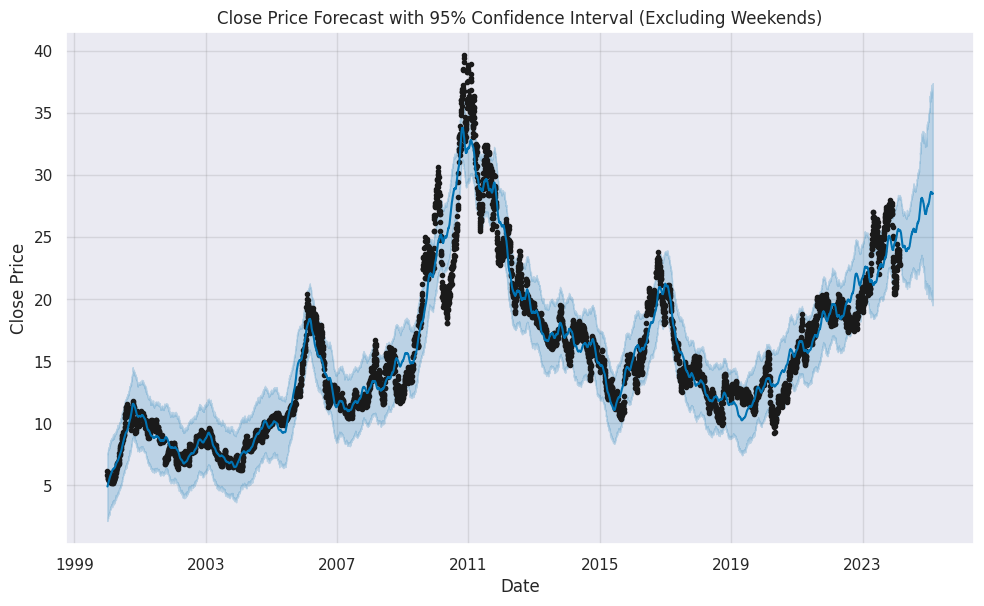

In [ ]:
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

data = df[['Date', 'Close']]

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.90,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.05,  # Regularization parameter for automatic changepoint detection
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=True,  # Disable weekly seasonality
    daily_seasonality=True,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)
print('MAPE:', mape)


RMSE: 1.6248221553679048
R-squared: 0.9325634955934194
MAPE: 7.365977964174962


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'Date' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# # Filter dates up to December 2023
# forecasted_df = forecast[forecast['ds'] >= '2023-11-01']

# Filter dates up to December 2023
forecasted_df = forecast[forecast['ds'] >= '2024-02-18']

# Print the filtered data
forecasted_df.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
6064 2024-02-20  2.038561   22.864236   28.393128     2.038561     2.038561   
6065 2024-02-21  2.039213   23.039467   28.342321     2.039213     2.039213   
6066 2024-02-22  2.039864   22.987018   28.175509     2.039864     2.039864   
6067 2024-02-23  2.040516   22.677756   28.056576     2.040516     2.040516   
6068 2024-02-26  2.042470   22.881250   28.142694     2.042470     2.042470   
6069 2024-02-27  2.043122   22.749788   28.264596     2.043122     2.043122   
6070 2024-02-28  2.043773   22.859962   28.161449     2.043773     2.043773   
6071 2024-02-29  2.044425   22.914921   28.075029     2.044425     2.044425   
6072 2024-03-01  2.045076   22.658689   28.007657     2.045076     2.045076   
6073 2024-03-04  2.047031   22.605169   28.083369     2.047031     2.047031   

        daily  daily_lower  daily_upper  multiplicative_terms  ...    weekly  \
6064  10.5608      10.5608      10.5608             11.522715  ...  0.526156   
6065  10.5608      10.5608      10.5608             11.524529  ...  0.532510   
6066  10.5608      10.5608      10.5608             11.514797  ...  0.527681   
6067  10.5608      10.5608      10.5608             11.495632  ...  0.514025   
6068  10.5608      10.5608      10.5608             11.498745  ...  0.539828   
6069  10.5608      10.5608      10.5608             11.474639  ...  0.526156   
6070  10.5608      10.5608      10.5608             11.468757  ...  0.532510   
6071  10.5608      10.5608      10.5608             11.449710  ...  0.527681   
6072  10.5608      10.5608      10.5608             11.419710  ...  0.514025   
6073  10.5608      10.5608      10.5608             11.382952  ...  0.539828   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
6064      0.526156      0.526156  0.435758      0.435758      0.435758   
6065      0.532510      0.532510  0.431219      0.431219      0.431219   
6066      0.527681      0.527681  0.426316      0.426316      0.426316   
6067      0.514025      0.514025  0.420807      0.420807      0.420807   
6068      0.539828      0.539828  0.398116      0.398116      0.398116   
6069      0.526156      0.526156  0.387682      0.387682      0.387682   
6070      0.532510      0.532510  0.375447      0.375447      0.375447   
6071      0.527681      0.527681  0.361229      0.361229      0.361229   
6072      0.514025      0.514025  0.344885      0.344885      0.344885   
6073      0.539828      0.539828  0.282324      0.282324      0.282324   

      additive_terms  additive_terms_lower  additive_terms_upper       yhat  
6064             0.0                   0.0                   0.0  25.528320  
6065             0.0                   0.0                   0.0  25.540180  
6066             0.0                   0.0                   0.0  25.528488  
6067             0.0                   0.0                   0.0  25.497533  
6068             0.0                   0.0                   0.0  25.528315  
6069             0.0                   0.0                   0.0  25.487207  
6070             0.0                   0.0                   0.0  25.483313  
6071             0.0                   0.0                   0.0  25.452496  
6072             0.0                   0.0                   0.0  25.399255  
6073             0.0                   0.0                   0.0  25.348287  

[10 rows x 22 columns]

#### Removing Weekends but adding Seasonality 95% Confidence

<ipython-input-38-4c2193a048db>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-38-4c2193a048db>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

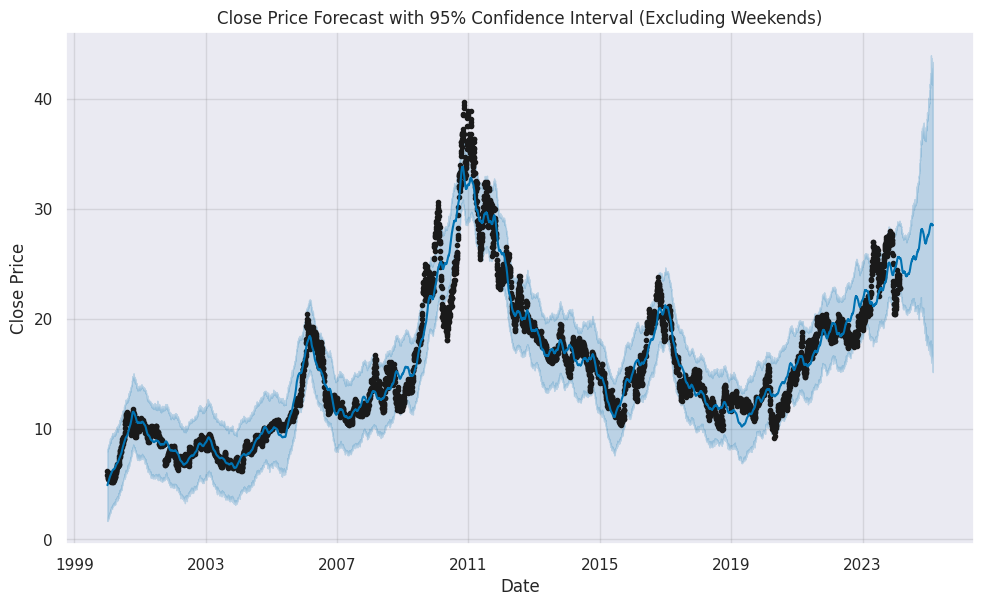

In [ ]:
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

data = df[['Date', 'Close']]

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.95,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.05,  # Regularization parameter for automatic changepoint detection
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=True,  # Disable weekly seasonality
    daily_seasonality=True,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.6248221553679048
R-squared: 0.9325634955934194


In [ ]:
# Assuming 'Date' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter dates up to December 2023
forecasted_df = forecast[forecast['ds'] >= '2023-11-01']

# Print the filtered data
forecasted_df.head(60)


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
5990 2023-11-01  1.966242   21.573741   28.123815     1.966242     1.966242   
5991 2023-11-02  1.966894   21.720292   28.076920     1.966894     1.966894   
5992 2023-11-03  1.967546   21.855342   27.979716     1.967546     1.967546   
5993 2023-11-06  1.969500   21.716931   28.178379     1.969500     1.969500   
5994 2023-11-07  1.970152   21.651247   27.941913     1.970152     1.970152   
5995 2023-11-08  1.970803   21.745178   28.194934     1.970803     1.970803   
5996 2023-11-09  1.971455   21.525702   27.843340     1.971455     1.971455   
5997 2023-11-10  1.972106   21.685807   27.888187     1.972106     1.972106   
5998 2023-11-13  1.974061   21.475919   27.847697     1.974061     1.974061   
5999 2023-11-14  1.974712   21.533988   27.501592     1.974712     1.974712   
6000 2023-11-15  1.975364   21.581010   27.593263     1.975364     1.975364   
6001 2023-11-16  1.976015   21.244985   27.742502     1.976015     1.976015   
6002 2023-11-17  1.976667   21.282437   27.719229     1.976667     1.976667   
6003 2023-11-20  1.978621   21.216942   27.424304     1.978621     1.978621   
6004 2023-11-21  1.979273   21.258566   27.716651     1.979273     1.979273   
6005 2023-11-22  1.979924   21.254564   27.404126     1.979924     1.979924   
6006 2023-11-24  1.981227   21.119352   27.193887     1.981227     1.981227   
6007 2023-11-27  1.983182   20.867681   27.501740     1.983182     1.983182   
6008 2023-11-28  1.983834   20.909432   27.338714     1.983834     1.983834   
6009 2023-11-29  1.984485   20.708542   27.078164     1.984485     1.984485   
6010 2023-11-30  1.985137   20.826042   27.224556     1.985137     1.985137   
6011 2023-12-01  1.985788   20.781290   27.048929     1.985788     1.985788   
6012 2023-12-04  1.987743   20.840118   27.194740     1.987743     1.987743   
6013 2023-12-05  1.988394   20.703900   27.055429     1.988394     1.988394   
6014 2023-12-06  1.989046   20.849462   27.294754     1.989046     1.989046   
6015 2023-12-07  1.989697   20.842682   27.203655     1.989697     1.989697   
6016 2023-12-08  1.990349   20.833131   27.131015     1.990349     1.990349   
6017 2023-12-11  1.992303   20.970002   27.234390     1.992303     1.992303   
6018 2023-12-12  1.992955   20.939119   27.491582     1.992955     1.992955   
6019 2023-12-13  1.993606   21.235105   27.538237     1.993606     1.993606   
6020 2023-12-14  1.994258   21.091319   27.371471     1.994258     1.994258   
6021 2023-12-15  1.994909   21.022369   27.547915     1.994909     1.994909   
6022 2023-12-18  1.996864   21.114612   27.623052     1.996864     1.996864   
6023 2023-12-19  1.997515   21.159838   27.662222     1.997515     1.997515   
6024 2023-12-20  1.998167   21.167739   27.634804     1.998167     1.998167   
6025 2023-12-21  1.998818   21.281258   27.966579     1.998818     1.998818   
6026 2023-12-22  1.999470   21.321736   27.766519     1.999470     1.999470   
6027 2023-12-26  2.002076   21.462303   27.756119     2.002076     2.002076   
6028 2023-12-27  2.002728   21.429303   27.800798     2.002728     2.002728   
6029 2023-12-28  2.003379   21.341421   27.699343     2.003379     2.003379   
6030 2023-12-29  2.004031   21.341629   27.759447     2.004031     2.004031   
6031 2024-01-02  2.006637   21.795637   27.644997     2.006637     2.006637   
6032 2024-01-03  2.007288   21.194917   27.970869     2.007288     2.007288   
6033 2024-01-04  2.007940   21.674835   28.262762     2.007940     2.007940   
6034 2024-01-05  2.008591   21.529176   27.944620     2.008591     2.008591   
6035 2024-01-08  2.010546   21.517826   27.893733     2.010546     2.010546   
6036 2024-01-09  2.011197   21.674394   28.003341     2.011197     2.011197   
6037 2024-01-10  2.011849   21.997420   28.243661     2.011849     2.011849   
6038 2024-01-11  2.012500   21.822549   28.384736     2.012500     2.012500   
6039 2024-01-12  2.013152   21.982844   28.089768     2.013152 

In [ ]:
forecasted_df.to_excel('SBY00_Forecast_2024_2025_93.25.xlsx')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### Removing Weekly Seasonality

<ipython-input-48-d2dbbe374059>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-48-d2dbbe374059>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

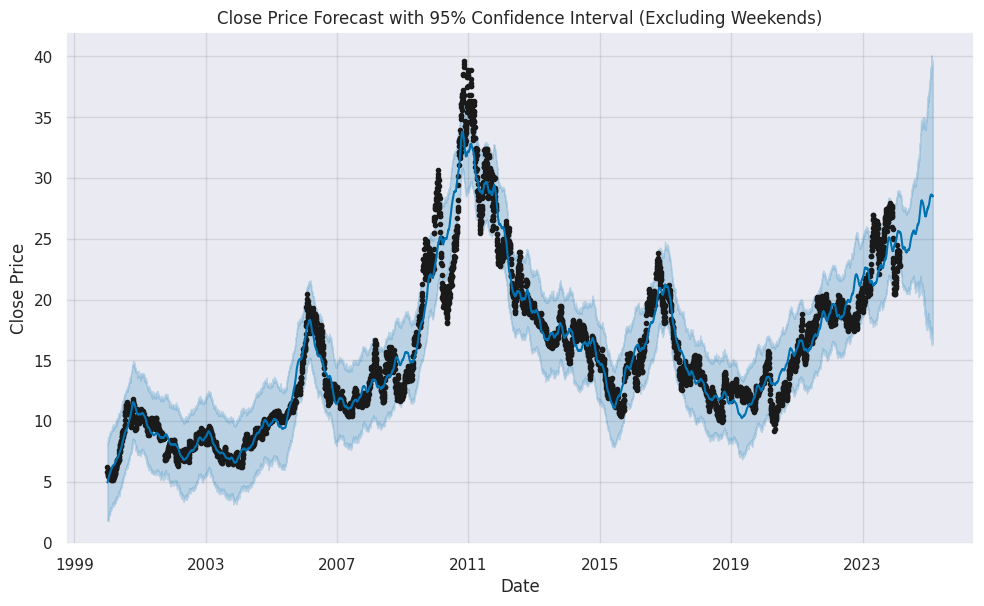

In [ ]:
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

data = df[['Date', 'Close']]

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.95,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.051,  # Regularization parameter for automatic changepoint detection
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=True,  # Disable weekly seasonality
    daily_seasonality=True,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.6255723634794592
R-squared: 0.9325012080477791


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'Date' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter dates up to December 2023
forecasted_df = forecast[forecast['ds'] >= '2023-11-01']

# Print the filtered data
forecasted_df.head(60)


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
5990 2023-11-01  1.925083   21.766924   28.229439     1.925083     1.925083   
5991 2023-11-02  1.925720   21.972289   28.182234     1.925720     1.925720   
5992 2023-11-03  1.926357   21.679156   28.358787     1.926357     1.926357   
5993 2023-11-06  1.928268   21.578758   28.008797     1.928268     1.928268   
5994 2023-11-07  1.928905   21.665802   28.148825     1.928905     1.928905   
5995 2023-11-08  1.929542   21.680352   28.173155     1.929542     1.929542   
5996 2023-11-09  1.930179   21.485372   28.086823     1.930179     1.930179   
5997 2023-11-10  1.930815   21.614451   27.919335     1.930815     1.930815   
5998 2023-11-13  1.932726   21.461919   27.934946     1.932726     1.932726   
5999 2023-11-14  1.933363   21.627156   27.801479     1.933363     1.933363   
6000 2023-11-15  1.934000   21.301357   27.635091     1.934000     1.934000   
6001 2023-11-16  1.934637   21.193353   27.613814     1.934637     1.934637   
6002 2023-11-17  1.935274   21.176132   27.392724     1.935274     1.935274   
6003 2023-11-20  1.937185   21.263849   27.301985     1.937185     1.937185   
6004 2023-11-21  1.937822   21.175634   27.417658     1.937822     1.937822   
6005 2023-11-22  1.938459   20.994505   27.497621     1.938459     1.938459   
6006 2023-11-24  1.939732   20.894600   27.267990     1.939732     1.939732   
6007 2023-11-27  1.941643   21.160933   27.400495     1.941643     1.941643   
6008 2023-11-28  1.942280   20.998941   27.173792     1.942280     1.942280   
6009 2023-11-29  1.942917   20.736572   27.357273     1.942917     1.942917   
6010 2023-11-30  1.943554   20.698025   27.300584     1.943554     1.943554   
6011 2023-12-01  1.944191   20.628381   27.355988     1.944191     1.944191   
6012 2023-12-04  1.946102   20.923302   27.545761     1.946102     1.946102   
6013 2023-12-05  1.946738   20.628251   27.133386     1.946738     1.946738   
6014 2023-12-06  1.947375   21.040052   27.389847     1.947375     1.947375   
6015 2023-12-07  1.948012   20.989675   27.200315     1.948012     1.948012   
6016 2023-12-08  1.948649   20.898092   27.336601     1.948649     1.948649   
6017 2023-12-11  1.950560   21.061222   27.467910     1.950560     1.950560   
6018 2023-12-12  1.951197   21.224041   27.325681     1.951197     1.951197   
6019 2023-12-13  1.951834   21.047181   27.265887     1.951834     1.951834   
6020 2023-12-14  1.952471   21.122223   27.467563     1.952471     1.952471   
6021 2023-12-15  1.953108   21.056461   27.698040     1.953108     1.953108   
6022 2023-12-18  1.955018   21.116692   27.620692     1.955018     1.955018   
6023 2023-12-19  1.955655   21.053096   27.861179     1.955655     1.955655   
6024 2023-12-20  1.956292   21.336313   27.477594     1.956292     1.956292   
6025 2023-12-21  1.956929   21.193198   27.415518     1.956929     1.956929   
6026 2023-12-22  1.957566   21.232400   27.682022     1.957566     1.957566   
6027 2023-12-26  1.960114   21.383634   27.708842     1.960114     1.960114   
6028 2023-12-27  1.960751   21.415602   27.780244     1.960751     1.960751   
6029 2023-12-28  1.961388   21.566394   27.691388     1.961388     1.961388   
6030 2023-12-29  1.962025   21.351122   27.915075     1.962025     1.962025   
6031 2024-01-02  1.964572   21.342127   27.916016     1.964572     1.964572   
6032 2024-01-03  1.965209   21.613061   27.916814     1.965209     1.965209   
6033 2024-01-04  1.965846   21.573995   27.952299     1.965846     1.965846   
6034 2024-01-05  1.966483   21.563571   27.953214     1.966483     1.966483   
6035 2024-01-08  1.968394   21.521124   27.870981     1.968394     1.968394   
6036 2024-01-09  1.969031   21.732728   27.910515     1.969031     1.969031   
6037 2024-01-10  1.969668   21.819817   28.108275     1.969668     1.969668   
6038 2024-01-11  1.970305   21.531093   28.253819     1.970305     1.970305   
6039 2024-01-12  1.970941   21.675007   28.159885     1.970941 

<ipython-input-59-ed74796cc719>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-59-ed74796cc719>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  

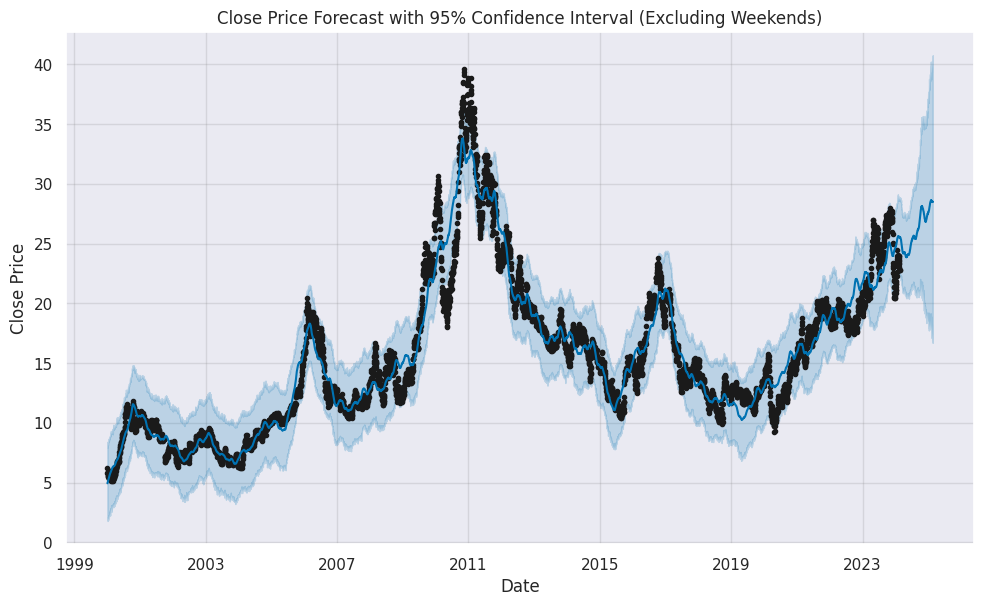

In [ ]:
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

data = df[['Date', 'Close']]

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.95,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.051,  # Regularization parameter for automatic changepoint detection
    seasonality_prior_scale=10.0,
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=True,  # Disable weekly seasonality
    daily_seasonality=True,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)
forecast = model.predict(future)

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.6255723634794592
R-squared: 0.9325012080477791


#### Performing Normalization

<ipython-input-69-9315d9f31697>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
<ipython-input-69-9315d9f31697>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_week'] = data['ds'].dt.dayofweek
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
 

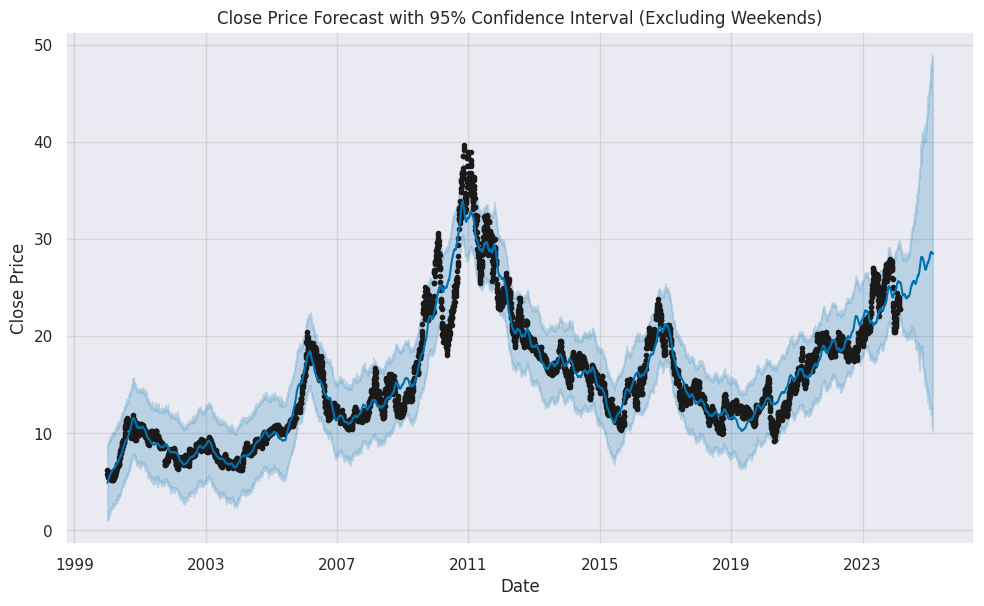

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Assuming you have a DataFrame named 'data' with columns 'Date' and 'Close'
# Prophet requires the input DataFrame to have columns 'ds' and 'y'
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Filter out weekends from the data
data['day_of_week'] = data['ds'].dt.dayofweek
data = data[data['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
data.drop(columns=['day_of_week'], inplace=True)

# Normalize the 'Close' prices
scaler = MinMaxScaler()
data['y_normalized'] = scaler.fit_transform(data[['y']])

# Create a Prophet model with additional parameters for better performance
model = Prophet(
    interval_width=0.98,  # 95% confidence interval
    seasonality_mode='multiplicative',  # Additive seasonality
    changepoint_prior_scale=0.05,  # Regularization parameter for automatic changepoint detection
    seasonality_prior_scale=10.0,
    yearly_seasonality='auto',  # Automatically detect yearly seasonality
    weekly_seasonality=True,  # Disable weekly seasonality
    daily_seasonality=True,   # Disable daily seasonality
    holidays=None  # No holidays specified (you can include holidays if they affect close prices)
)

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecast for one year
future['day_of_week'] = future['ds'].dt.dayofweek
future = future[future['day_of_week'] < 5]  # Exclude Saturday (5) and Sunday (6)
future.drop(columns=['day_of_week'], inplace=True)

# Predict
forecast = model.predict(future)

# Reverse the normalization on the forecasted values
forecast['yhat_unnormalized'] = scaler.inverse_transform(forecast[['yhat']])

# Plot forecast with uncertainty intervals
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Excluding Weekends)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have the actual test data in a DataFrame named 'test_data'
# Merge the forecasted values with the actual values
merged_df = forecast.set_index('ds')[['yhat']].join(data.set_index('ds'))

# Remove NaN values
merged_df.dropna(inplace=True)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(merged_df['y'], merged_df['yhat']))

# Calculate R2
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print('RMSE:', rmse)
print('R-squared:', r2)


RMSE: 1.6248221553679048
R-squared: 0.9325634955934194


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming 'Date' column is in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Filter dates up to December 2023
forecasted_df = forecast[forecast['ds'] >= '2023-11-01']

# Print the filtered data
forecasted_df.head(60)


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
5990 2023-11-01  1.966242   21.304839   28.500986     1.966242     1.966242   
5991 2023-11-02  1.966894   21.169578   28.677224     1.966894     1.966894   
5992 2023-11-03  1.967546   21.373316   28.724047     1.967546     1.967546   
5993 2023-11-06  1.969500   21.151110   28.359469     1.969500     1.969500   
5994 2023-11-07  1.970152   21.138456   28.582027     1.970152     1.970152   
5995 2023-11-08  1.970803   21.080471   28.286232     1.970803     1.970803   
5996 2023-11-09  1.971455   20.935225   28.405741     1.971455     1.971455   
5997 2023-11-10  1.972106   20.974513   28.335174     1.972106     1.972106   
5998 2023-11-13  1.974061   21.076425   28.349372     1.974061     1.974061   
5999 2023-11-14  1.974712   20.758486   28.124155     1.974712     1.974712   
6000 2023-11-15  1.975364   20.570701   28.209409     1.975364     1.975364   
6001 2023-11-16  1.976015   20.570177   28.177059     1.976015     1.976015   
6002 2023-11-17  1.976667   20.547783   28.207226     1.976667     1.976667   
6003 2023-11-20  1.978621   20.957506   28.083241     1.978621     1.978621   
6004 2023-11-21  1.979273   20.468602   28.109934     1.979273     1.979273   
6005 2023-11-22  1.979924   20.484998   27.667223     1.979924     1.979924   
6006 2023-11-24  1.981227   20.602394   27.859054     1.981227     1.981227   
6007 2023-11-27  1.983182   20.242091   27.966696     1.983182     1.983182   
6008 2023-11-28  1.983834   20.508810   27.808720     1.983834     1.983834   
6009 2023-11-29  1.984485   20.397987   27.613311     1.984485     1.984485   
6010 2023-11-30  1.985137   20.528307   27.643101     1.985137     1.985137   
6011 2023-12-01  1.985788   20.194176   27.641697     1.985788     1.985788   
6012 2023-12-04  1.987743   20.392226   28.035614     1.987743     1.987743   
6013 2023-12-05  1.988394   20.235200   27.788508     1.988394     1.988394   
6014 2023-12-06  1.989046   20.340199   27.656118     1.989046     1.989046   
6015 2023-12-07  1.989697   20.286646   27.582422     1.989697     1.989697   
6016 2023-12-08  1.990349   20.561344   27.917949     1.990349     1.990349   
6017 2023-12-11  1.992303   20.526999   27.916887     1.992303     1.992303   
6018 2023-12-12  1.992955   20.339987   27.846069     1.992955     1.992955   
6019 2023-12-13  1.993606   20.351401   27.900533     1.993606     1.993606   
6020 2023-12-14  1.994258   20.293391   27.952449     1.994258     1.994258   
6021 2023-12-15  1.994909   20.593281   27.917552     1.994909     1.994909   
6022 2023-12-18  1.996864   20.719356   28.314006     1.996864     1.996864   
6023 2023-12-19  1.997515   20.736550   28.228261     1.997515     1.997515   
6024 2023-12-20  1.998167   20.860293   28.197992     1.998167     1.998167   
6025 2023-12-21  1.998818   20.990366   28.098293     1.998818     1.998818   
6026 2023-12-22  1.999470   20.669570   28.328862     1.999470     1.999470   
6027 2023-12-26  2.002076   20.940765   28.153887     2.002076     2.002076   
6028 2023-12-27  2.002728   20.695729   28.495175     2.002728     2.002728   
6029 2023-12-28  2.003379   21.045263   28.567803     2.003379     2.003379   
6030 2023-12-29  2.004031   20.610966   28.499635     2.004031     2.004031   
6031 2024-01-02  2.006637   21.027405   28.655625     2.006637     2.006637   
6032 2024-01-03  2.007288   21.013438   28.356214     2.007288     2.007288   
6033 2024-01-04  2.007940   20.986163   28.772935     2.007940     2.007940   
6034 2024-01-05  2.008591   20.788337   27.957928     2.008591     2.008591   
6035 2024-01-08  2.010546   20.951156   28.719583     2.010546     2.010546   
6036 2024-01-09  2.011197   20.922482   28.592724     2.011197     2.011197   
6037 2024-01-10  2.011849   21.233431   28.519035     2.011849     2.011849   
6038 2024-01-11  2.012500   21.132890   28.691590     2.012500     2.012500   
6039 2024-01-12  2.013152   21.372926   28.827480     2.013152 

In [ ]:
forecasted_df.to_excel('SBY00_Forcast_2024_2025_Norm_93.25.xlsx')

#### LSTM Model

<ipython-input-46-97ebc1927367>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


Epoch 1/10
342/342 [==============================] - 6s 5ms/step - loss: 0.0347
Epoch 2/10
342/342 [==============================] - 2s 5ms/step - loss: 0.0082
Epoch 3/10
342/342 [==============================] - 2s 5ms/step - loss: 9.5465e-04
Epoch 4/10
342/342 [==============================] - 2s 5ms/step - loss: 1.2744e-04
Epoch 5/10
342/342 [==============================] - 2s 6ms/step - loss: 1.1435e-04
Epoch 6/10
342/342 [==============================] - 2s 7ms/step - loss: 1.1202e-04
Epoch 7/10
342/342 [==============================] - 2s 5ms/step - loss: 1.1024e-04
Epoch 8/10
342/342 [==============================] - 2s 5ms/step - loss: 1.0807e-04
Epoch 9/10
342/342 [==============================] - 1s 3ms/step - loss: 1.0654e-04
Epoch 10/10
19/19 [==============================] - 0s 2ms/step
Train RMSE: 0.3515338015914604
Test RMSE: 0.38475978546342454
Train R^2 Score: 0.9967713801412795
Test R^2 Score: 0.9838474612839245
Train MAPE: 1.7248223486588912
Test MAPE: 1.3

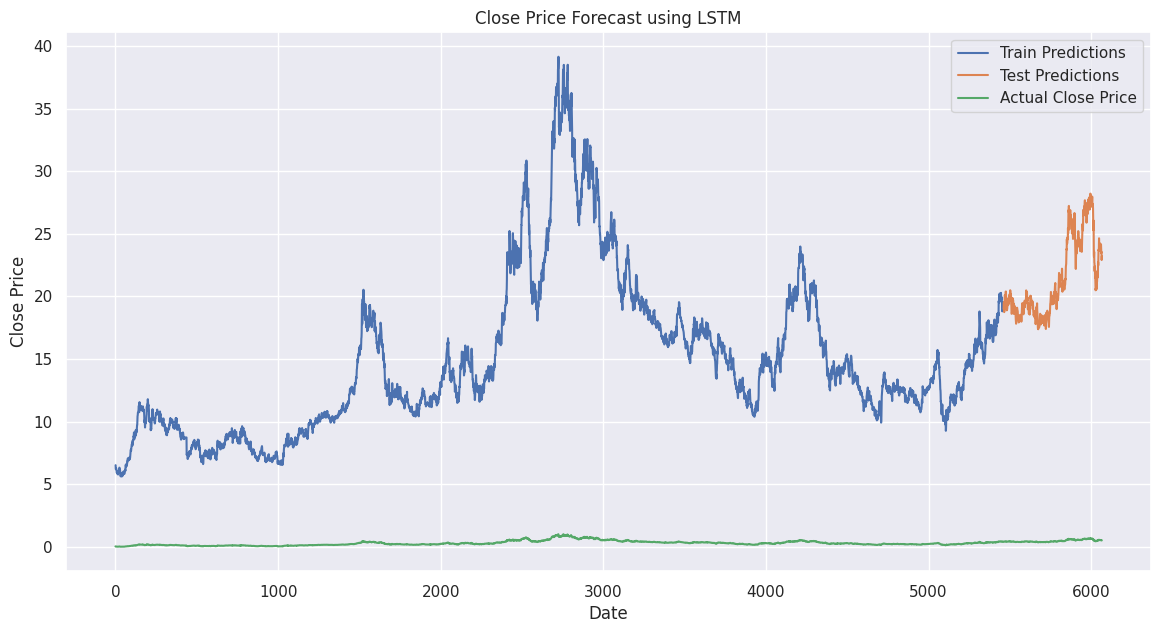

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Create and fit the LSTM model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
# model.add(LSTM(units=50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Create and fit the LSTM model with one layer
model = Sequential()
model.add(LSTM(units=5, input_shape=(time_step, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

train_mape = calculate_mape(y_train[0], train_predict[:, 0])
test_mape = calculate_mape(y_test[0], test_predict[:, 0])

print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 0s 22ms/step


Date   Forecast
0 2024-02-21  22.988899
1 2024-02-22  23.142298
2 2024-02-23  23.300257
3 2024-02-26  23.462845
4 2024-02-27  23.630104

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


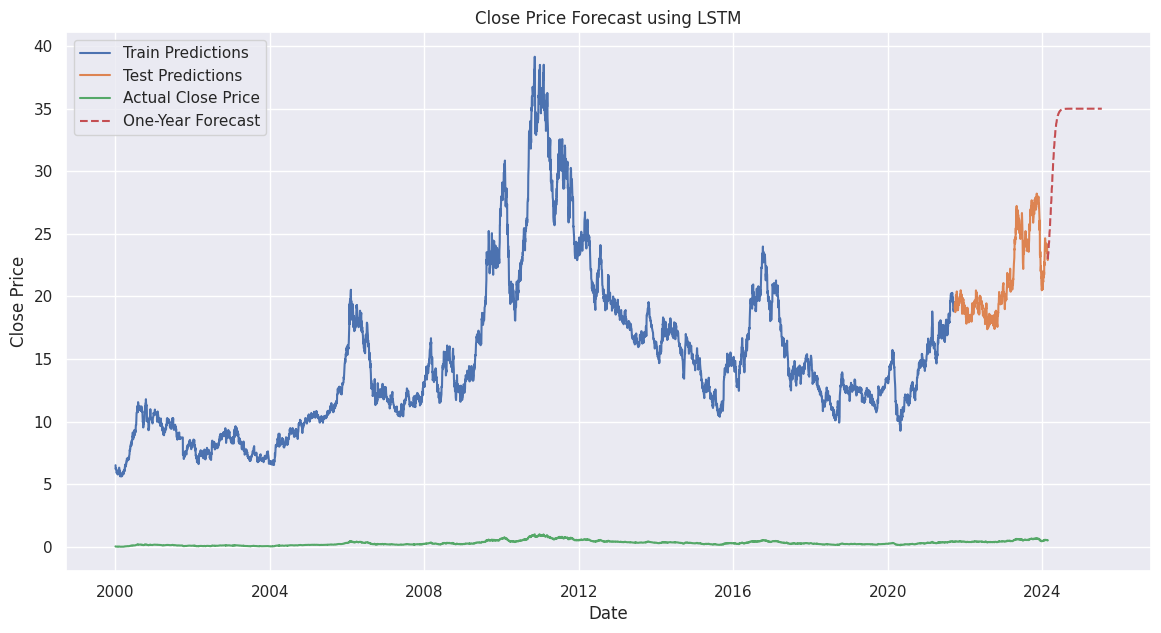

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


<ipython-input-78-39580ee0ad11>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


Epoch 1/100
75/75 [==============================] - 15s 88ms/step - loss: 0.0054
Epoch 2/100
75/75 [==============================] - 8s 101ms/step - loss: 5.8957e-04
Epoch 3/100
75/75 [==============================] - 7s 89ms/step - loss: 5.3867e-04
Epoch 4/100
75/75 [==============================] - 8s 101ms/step - loss: 4.9815e-04
Epoch 5/100
75/75 [==============================] - 7s 97ms/step - loss: 4.6702e-04
Epoch 6/100
75/75 [==============================] - 7s 90ms/step - loss: 4.2170e-04
Epoch 7/100
75/75 [==============================] - 7s 99ms/step - loss: 3.7950e-04
Epoch 8/100
75/75 [==============================] - 7s 88ms/step - loss: 3.6857e-04
Epoch 9/100
75/75 [==============================] - 7s 99ms/step - loss: 3.4653e-04
Epoch 10/100
75/75 [==============================] - 7s 88ms/step - loss: 3.3748e-04
Epoch 11/100
75/75 [==============================] - 7s 100ms/step - loss: 3.2130e-04
Epoch 12/100
75/75 [==============================] - 7s 100ms/

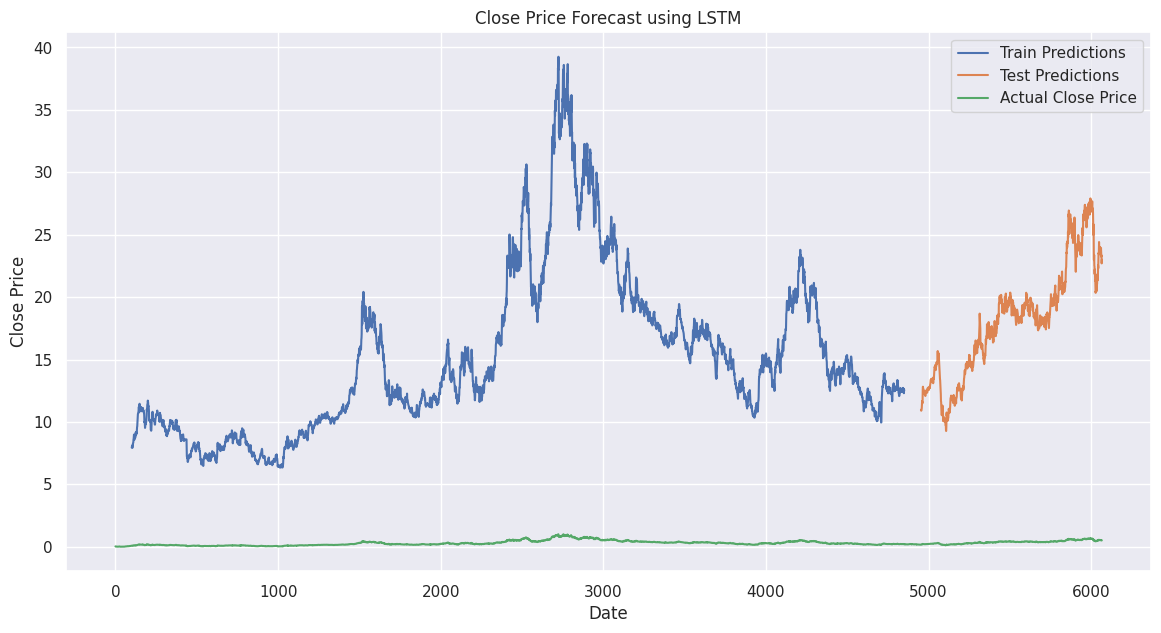

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

train_mape = calculate_mape(y_train[0], train_predict[:, 0])
test_mape = calculate_mape(y_test[0], test_predict[:, 0])

print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


Note: The above code took 12 mins

In [ ]:
# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)


Train R^2 Score: 0.9969643697950555
Test R^2 Score: 0.9944370564131081


In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='D')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 41ms/step


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 0s 26ms/step


Date   Forecast
0 2024-02-21  22.794788
1 2024-02-22  22.751144
2 2024-02-23  22.704744
3 2024-02-24  22.656227
4 2024-02-25  22.605740

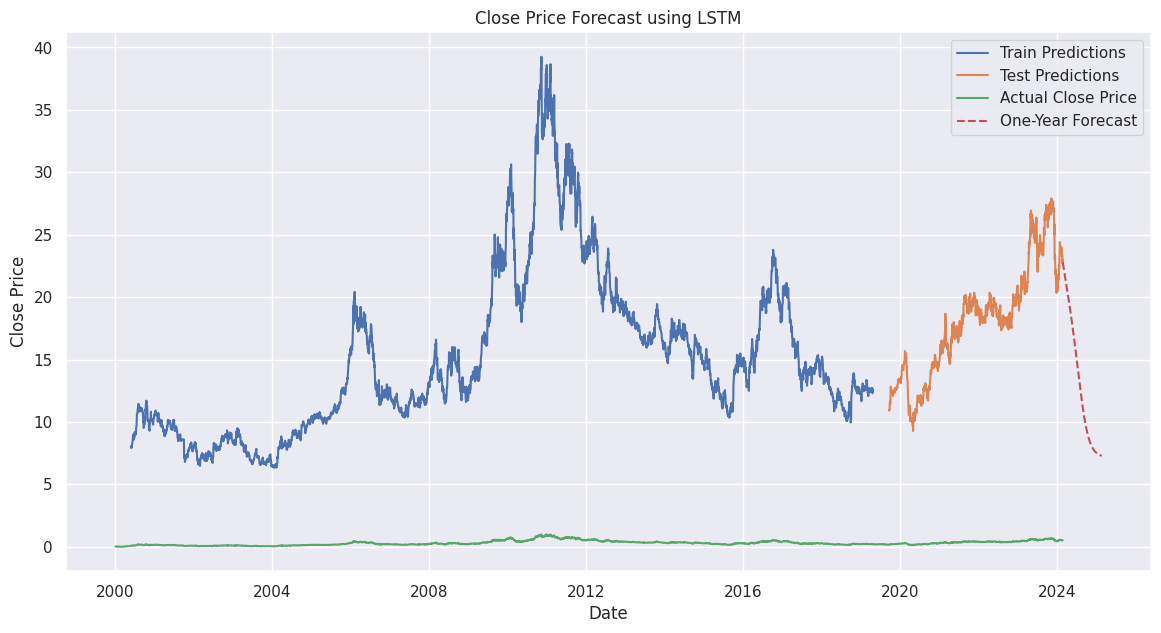

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
forecast_df.to_excel('SBY00_Forecast_2024_99.xlsx')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#### LSTM with Business Days Only

In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 59ms/step


Date   Forecast
0 2024-02-21  22.794788
1 2024-02-22  22.751144
2 2024-02-23  22.704744
3 2024-02-26  22.656227
4 2024-02-27  22.605740

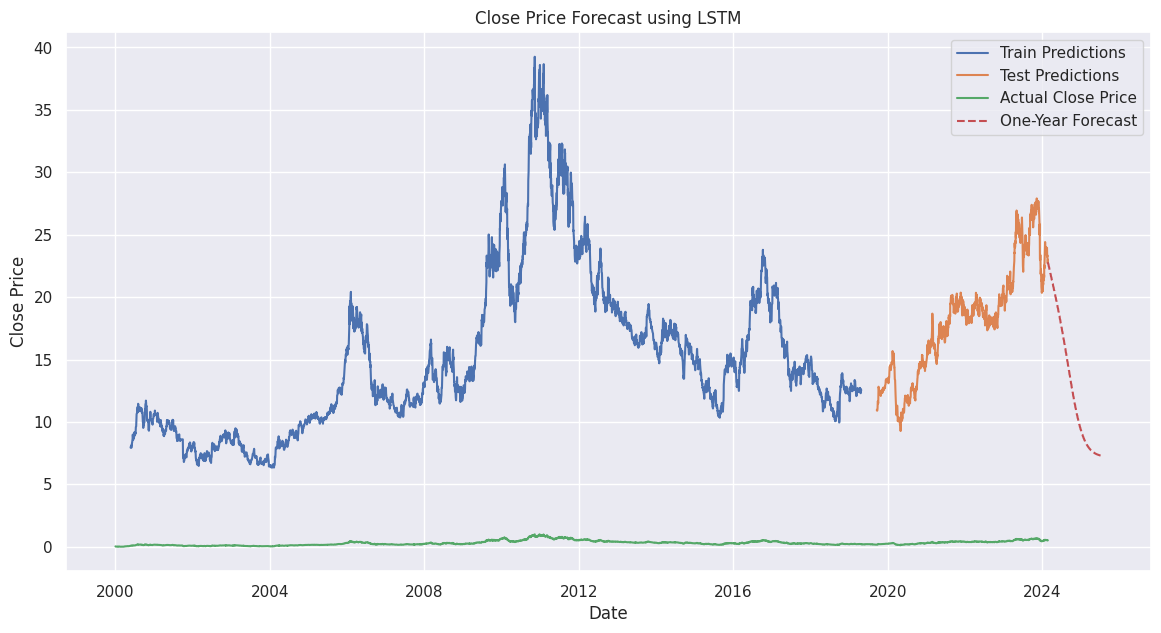

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
forecast_df.to_excel('SBY00_Forecast_2024_B_99.xlsx')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


### Removing Scaling

Epoch 1/100
75/75 [==============================] - 14s 116ms/step - loss: 124.0111
Epoch 2/100
75/75 [==============================] - 9s 119ms/step - loss: 52.4334
Epoch 3/100
75/75 [==============================] - 9s 120ms/step - loss: 42.5650
Epoch 4/100
75/75 [==============================] - 8s 107ms/step - loss: 35.0386
Epoch 5/100
75/75 [==============================] - 8s 111ms/step - loss: 20.1925
Epoch 6/100
75/75 [==============================] - 8s 109ms/step - loss: 13.6996
Epoch 7/100
75/75 [==============================] - 8s 102ms/step - loss: 10.0675
Epoch 8/100
75/75 [==============================] - 9s 117ms/step - loss: 7.6562
Epoch 9/100
75/75 [==============================] - 8s 111ms/step - loss: 6.0134
Epoch 10/100
75/75 [==============================] - 10s 127ms/step - loss: 4.8131
Epoch 11/100
75/75 [==============================] - 8s 104ms/step - loss: 3.8915
Epoch 12/100
75/75 [==============================] - 8s 110ms/step - loss: 3.1595
Epo

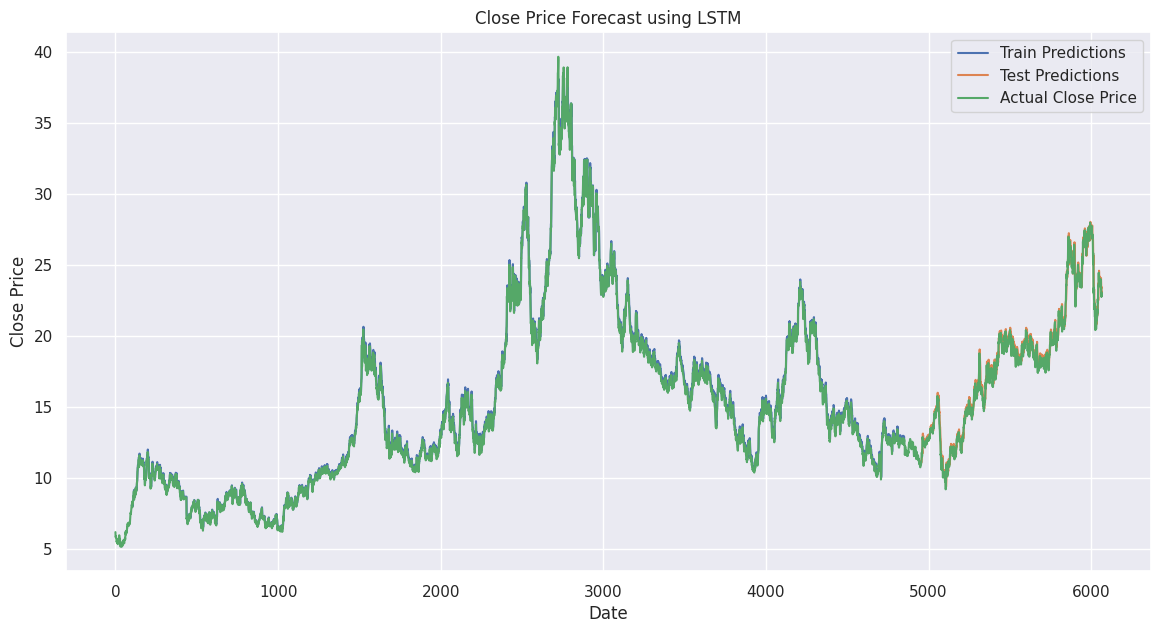

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train, train_predict[:,0])
test_r2 = r2_score(y_test, test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 32ms/step


Date    Forecast
0 2024-02-21  795.715576
1 2024-02-22  799.289490
2 2024-02-23  802.728699
3 2024-02-26  806.264404
4 2024-02-27  809.748535

### Adding Droput Layer without Scaling

Epoch 1/100
75/75 [==============================] - 12s 94ms/step - loss: 121.4332
Epoch 2/100
75/75 [==============================] - 8s 112ms/step - loss: 50.8784
Epoch 3/100
75/75 [==============================] - 8s 108ms/step - loss: 39.2232
Epoch 4/100
75/75 [==============================] - 7s 96ms/step - loss: 24.7113
Epoch 5/100
75/75 [==============================] - 8s 108ms/step - loss: 17.2682
Epoch 6/100
75/75 [==============================] - 7s 93ms/step - loss: 13.4631
Epoch 7/100
75/75 [==============================] - 8s 106ms/step - loss: 10.8096
Epoch 8/100
75/75 [==============================] - 8s 110ms/step - loss: 8.6393
Epoch 9/100
75/75 [==============================] - 7s 96ms/step - loss: 7.4454
Epoch 10/100
75/75 [==============================] - 8s 112ms/step - loss: 6.2858
Epoch 11/100
75/75 [==============================] - 8s 110ms/step - loss: 5.3161
Epoch 12/100
75/75 [==============================] - 7s 95ms/step - loss: 4.7372
Epoch 13/

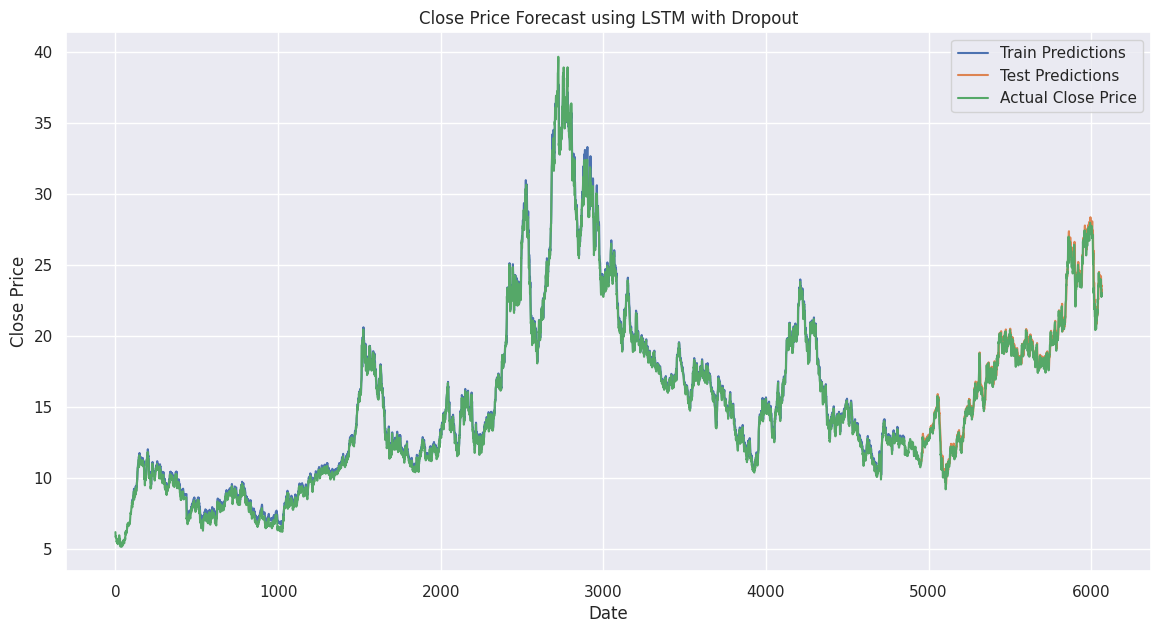

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=50))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train, train_predict[:,0])
test_r2 = r2_score(y_test, test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM with Dropout')
plt.show()


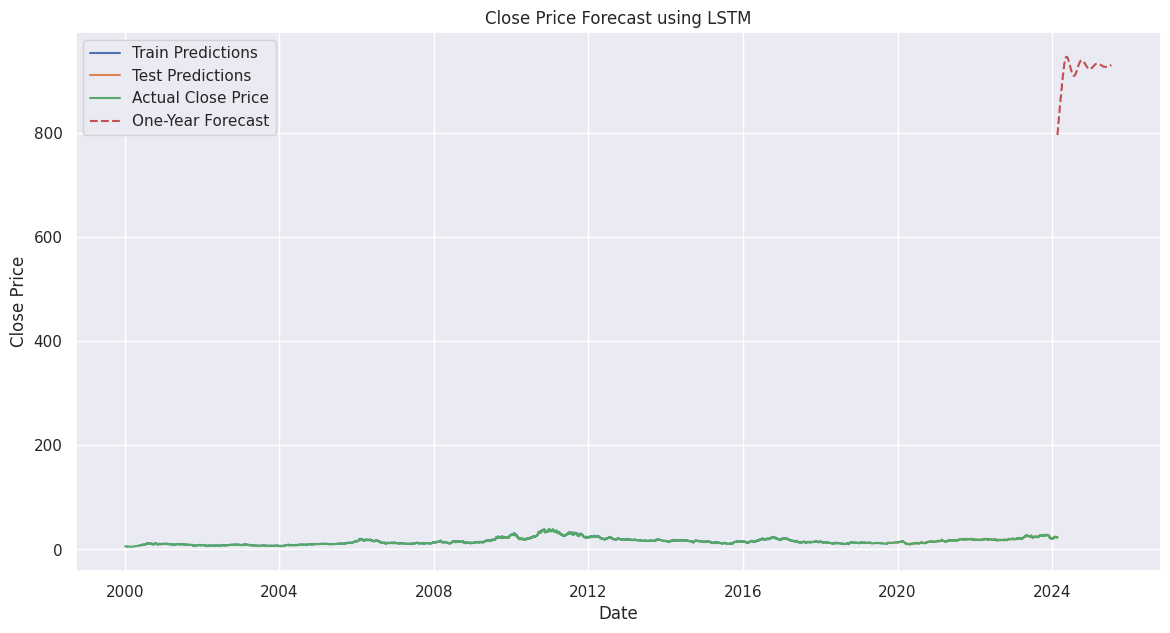

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


#### Adding Dropout Layer With Scaling

<ipython-input-97-8f6c2a81f113>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


Epoch 1/100
75/75 [==============================] - 34s 381ms/step - loss: 0.0061
Epoch 2/100
75/75 [==============================] - 24s 319ms/step - loss: 0.0022
Epoch 3/100
75/75 [==============================] - 26s 347ms/step - loss: 0.0018
Epoch 4/100
75/75 [==============================] - 26s 349ms/step - loss: 0.0019
Epoch 5/100
75/75 [==============================] - 23s 311ms/step - loss: 0.0018
Epoch 6/100
75/75 [==============================] - 23s 311ms/step - loss: 0.0017
Epoch 7/100
75/75 [==============================] - 23s 310ms/step - loss: 0.0015
Epoch 8/100
75/75 [==============================] - 36s 488ms/step - loss: 0.0014
Epoch 9/100
75/75 [==============================] - 23s 311ms/step - loss: 0.0012
Epoch 10/100
75/75 [==============================] - 23s 311ms/step - loss: 0.0013
Epoch 11/100
75/75 [==============================] - 23s 303ms/step - loss: 0.0012
Epoch 12/100
75/75 [==============================] - 23s 310ms/step - loss: 0.0011
E

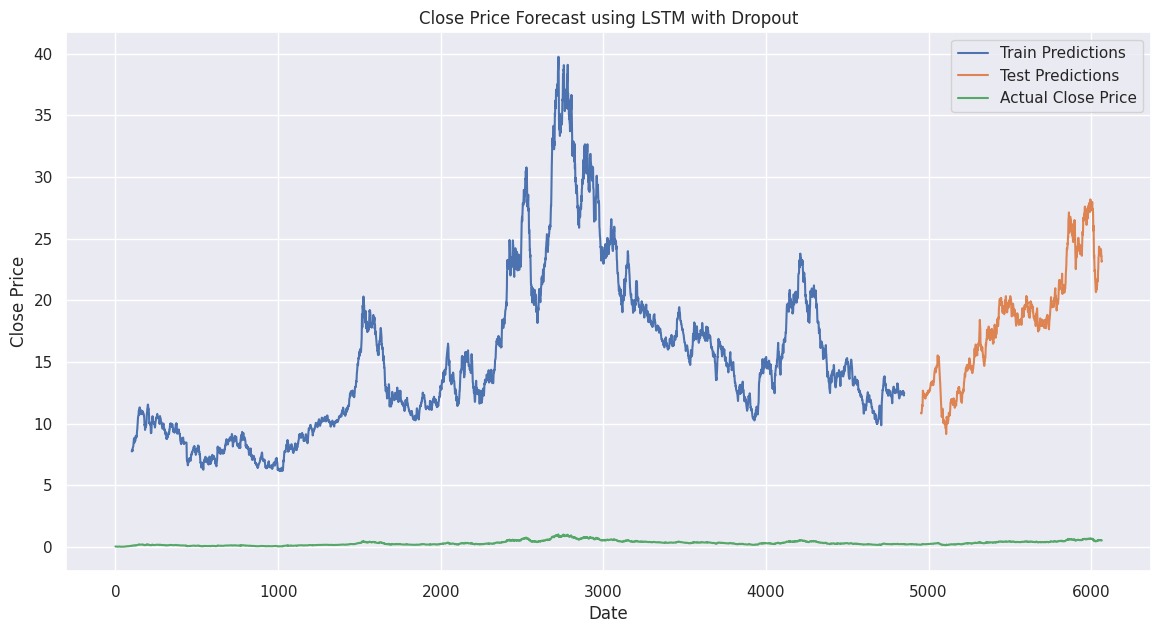

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=32))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM with Dropout')
plt.show()
# This code takes 41 minutes to run

In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 56ms/step


Date   Forecast
0 2024-02-21  23.023457
1 2024-02-22  23.158089
2 2024-02-23  23.292889
3 2024-02-26  23.413900
4 2024-02-27  23.528906

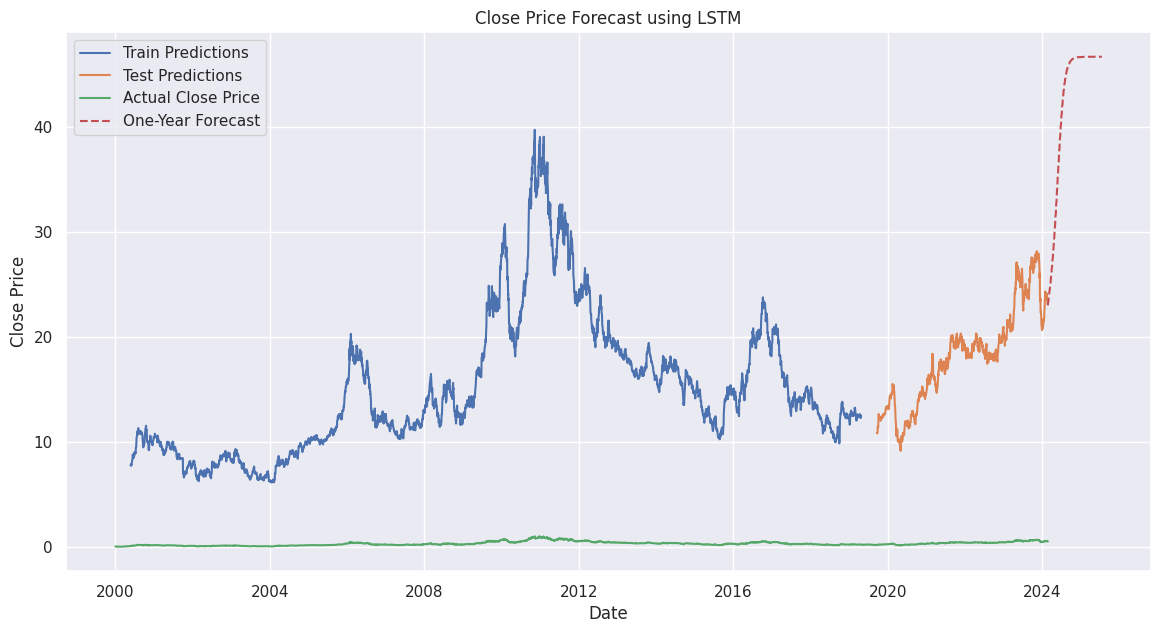

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


#### Reducing batch size to 32 from 64 and epochs to 25 from 100

<ipython-input-113-2ee62d409ed4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


Epoch 1/5
297/297 [==============================] - 31s 80ms/step - loss: 0.0015
Epoch 2/5
297/297 [==============================] - 20s 67ms/step - loss: 5.6429e-04
Epoch 3/5
297/297 [==============================] - 20s 67ms/step - loss: 3.4651e-04
Epoch 4/5
297/297 [==============================] - 21s 71ms/step - loss: 4.1729e-04
Epoch 5/5
35/35 [==============================] - 1s 22ms/step
Train RMSE: 0.6840219335094988
Test RMSE: 0.5157030225384364
Train R^2 Score: 0.988683133348705
Test R^2 Score: 0.9866174100300379


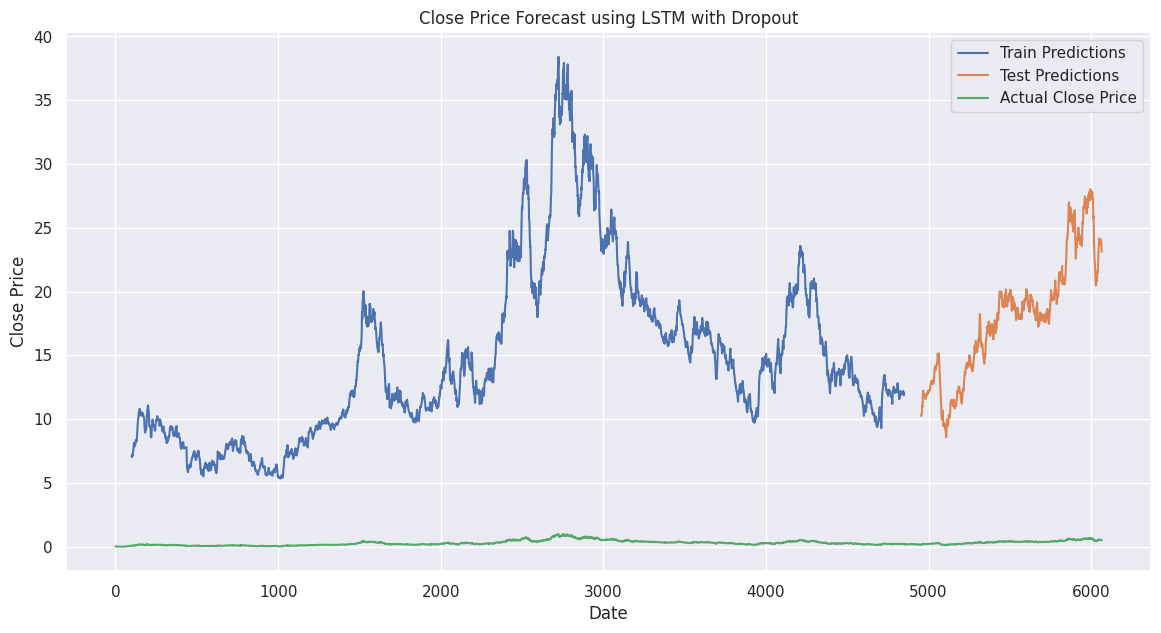

In [ ]:
import pandas as pd
import numpy as np
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model with dropout layers
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
# model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
# model.add(LSTM(units=32, return_sequences=True))
# model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=32))
# model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(1))

# Define optimizer with specified learning rate
opt = Adam(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer=opt)

# model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=5, batch_size=16, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM with Dropout')
plt.show()
# This code takes 14 minutes to run

In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 27ms/step


Date   Forecast
0 2024-02-21  22.958612
1 2024-02-22  23.009508
2 2024-02-23  23.065508
3 2024-02-26  23.116737
4 2024-02-27  23.163149

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


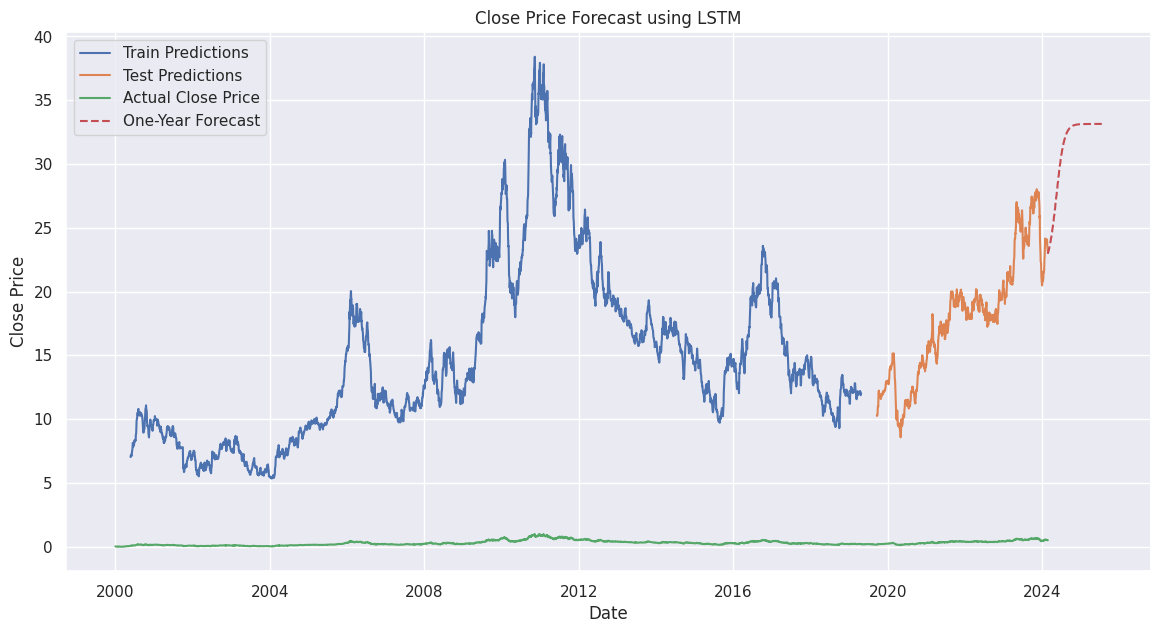

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


#### Reducing the Batch Size, Epochs With no dropout layer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


#### Adding Learning Rate

<ipython-input-125-2ddff03cf7e6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


Epoch 1/15
268/268 [==============================] - 30s 89ms/step - loss: 0.3998 - val_loss: 0.0043
Epoch 2/15
268/268 [==============================] - 21s 78ms/step - loss: 0.0031 - val_loss: 0.0103
Epoch 3/15
268/268 [==============================] - 20s 75ms/step - loss: 0.0016 - val_loss: 6.0168e-04
Epoch 4/15
268/268 [==============================] - 21s 79ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 5/15
268/268 [==============================] - 21s 78ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/15
268/268 [==============================] - 22s 82ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 7/15
268/268 [==============================] - 20s 75ms/step - loss: 0.0041 - val_loss: 0.0103
Epoch 8/15
268/268 [==============================] - 21s 79ms/step - loss: 0.0076 - val_loss: 5.4211e-04
Epoch 9/15
268/268 [==============================] - 21s 79ms/step - loss: 0.0020 - val_loss: 0.0148
Epoch 10/15
268/268 [==============================] - 20s 75ms/step - los

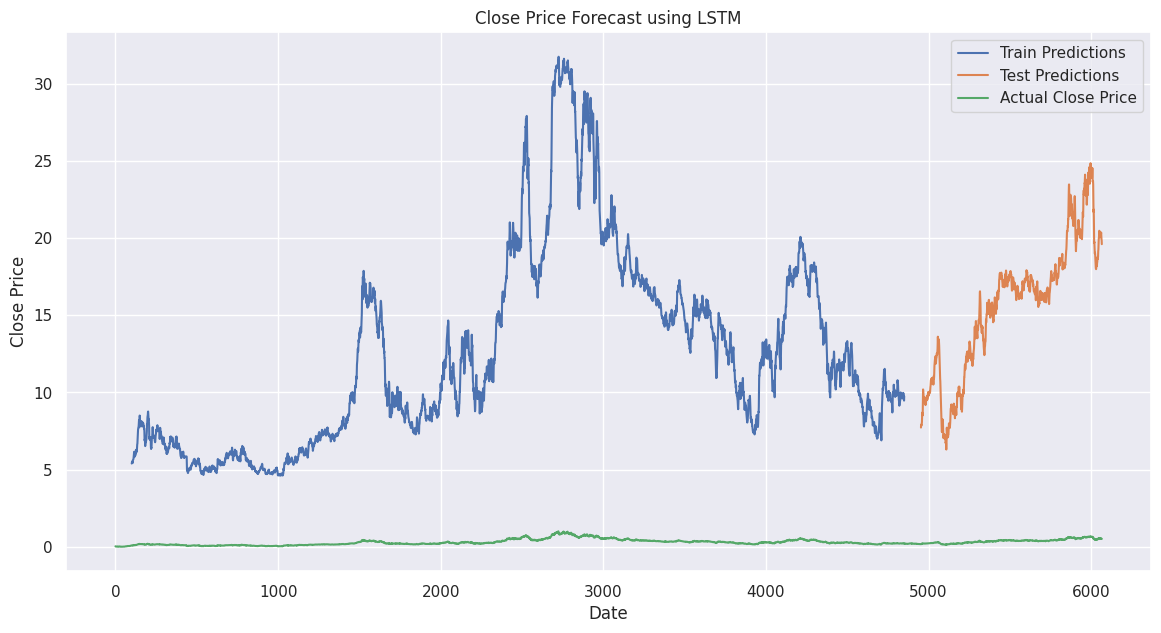

In [ ]:
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define optimizer with specified learning rate
opt = Adam(learning_rate=0.1)

# Create and fit the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer=opt)
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=1, validation_split=0.1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# # Make predictions
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=5*365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(1825):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

1/1 [==============================] - 0s 27ms/step


Date   Forecast
0 2024-02-21  22.757092
1 2024-02-22  22.684450
2 2024-02-23  22.606371
3 2024-02-26  22.527266
4 2024-02-27  22.446636

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


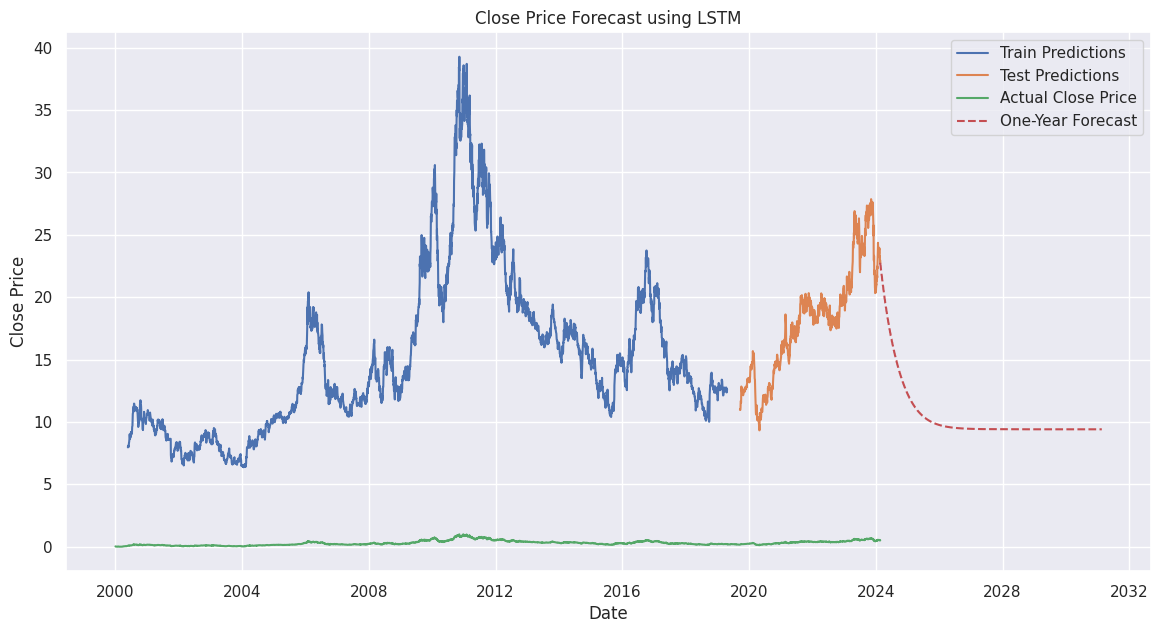

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Select relevant columns
data = df[['Date', 'Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Convert DataFrame to numpy array
dataset = data['Close'].values

# Split data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create and fit the LSTM model with dropout layers and a specified learning rate
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(LSTM(units=32))
model.add(Dropout(0.2))  # Add dropout layer with dropout rate of 0.2
model.add(Dense(1))

# Define optimizer with specified learning rate
opt = Adam(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(np.mean(np.power((y_train[0] - train_predict[:,0]), 2)))
test_rmse = np.sqrt(np.mean(np.power((y_test[0] - test_predict[:,0]), 2)))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R^2 score
train_r2 = r2_score(y_train[0], train_predict[:,0])
test_r2 = r2_score(y_test[0], test_predict[:,0])
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index[time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data.index[train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM with Dropout and Learning Rate')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generate future timestamps for one year forecast
future_timestamps = pd.date_range(start=df['Date'].iloc[-1], periods=365, freq='B')

# Reshape last time_step data to predict future values
last_X = dataset[-time_step:]
last_X = last_X.reshape((1, time_step, 1))

# Predict future values
forecast = []
for i in range(365):
    next_pred = model.predict(last_X)[0][0]
    forecast.append(next_pred)
    last_X = np.roll(last_X, -1)
    last_X[0][-1] = next_pred

# Inverse transform forecasted values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create DataFrame for dates and forecasted values
forecast_df = pd.DataFrame({'Date': future_timestamps, 'Forecast': forecast.flatten()})
forecast_df.head()

In [ ]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][time_step:train_size-1], train_predict, label='Train Predictions')
plt.plot(data['Date'][train_size+time_step+1:], test_predict, label='Test Predictions')
plt.plot(data['Date'], data['Close'], label='Actual Close Price')
plt.plot(future_timestamps[:len(forecast)], forecast, label='One-Year Forecast', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast using LSTM')
plt.show()


#### Adding Regressor Parameter Including 4 Parameters

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/SBY00_2000_01_03_to_2024_02_21_Y_M_D.xlsx")

# Calculate average price
df['avg_price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

# Select relevant columns
data = df[['Date', 'Close', 'avg_price']]

# Rename columns
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create Prophet model
model = Prophet(
    interval_width=0.95,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    yearly_seasonality='auto',
    weekly_seasonality=True,
    daily_seasonality=True,
    holidays=None
)

# Add regressor
model.add_regressor('avg_price')

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)

# Calculate average price for future dates
future['avg_price'] = (future['Open'] + future['High'] + future['Low'] + future['Close']) / 4

# Predictions
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Close Price Forecast with 95% Confidence Interval (Including Average Price)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


<ipython-input-66-40a05344d5c8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common 

KeyError: 'Open'

### ARIMA Model

## Part 1 : Prepare the dataset for training

### 1. Choose the dataset
A dataset which contains the Bitcoins prices which is one of the biggest moving cryptocurrency in the market. The retrived dataset is obtained with a freaquency of one minute between an instance between the period January 2000 to December 2023.
We will be taking the last one year's data for our machine learning purpose that is from April 22 2019 to April 22 2020. (December 29 2022 to December 29 2023)

**Source and Refference**
* https://www.barchart.com/futures/quotes/SB*0/futures-prices?viewName=main

In [ ]:
dataframe = pd.read_excel("/content/global_brown_sugar11_data.xlsx",index_col=0)


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
dataframe.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

Price
Date                  
2000-01-03  136.686440
2000-01-04  128.749808
2000-01-05  129.190732
2000-01-06  130.513504
2000-01-07  128.970270

In [ ]:
# unit='s' parameter specifies that the integer timestamps are measured in seconds
dataframe.index = pd.to_datetime(dataframe.index) #Convert Index to DateTime Object
print(dataframe.head())
print("\nShape of the Original data: ", dataframe.shape)

                 Price
Date                  
2000-01-03  136.686440
2000-01-04  128.749808
2000-01-05  129.190732
2000-01-06  130.513504
2000-01-07  128.970270

Shape of the Original data:  (6066, 1)


In [ ]:
period = '2000-01-03'
dataframe = dataframe.loc[(dataframe.index > period)] # Consider only the data after given Period
dataframe.head()

Price
Date                  
2000-01-04  128.749808
2000-01-05  129.190732
2000-01-06  130.513504
2000-01-07  128.970270
2000-01-10  128.308884

In [ ]:
print("Total Number of Variables ->",dataframe.shape[1])
print("Total Number of Entries ->",dataframe.shape[0])
print("Shape of the Dataframe Constructed ->",dataframe.shape)
dataframe

Total Number of Variables -> 1
Total Number of Entries -> 6065
Shape of the Dataframe Constructed -> (6065, 1)


Price
Date                  
2000-01-04  128.749808
2000-01-05  129.190732
2000-01-06  130.513504
2000-01-07  128.970270
2000-01-10  128.308884
...                ...
2024-02-14  515.074800
2024-02-15  502.952800
2024-02-16  508.683200
2024-02-20  501.410000
2024-02-21  498.985600

[6065 rows x 1 columns]

#### Attributes present in the Dataset

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6065 entries, 2000-01-04 to 2024-02-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   6065 non-null   float64
dtypes: float64(1)
memory usage: 94.8 KB


In [ ]:
print('Price - ',dataframe['Price'].isnull().values.any())


Price -  False


### 2. Extract and describe the main statistics about the dataset and provide visual representation of the dataset.


#### Statistics

In [ ]:
dataframe.describe()

Price
count  6065.000000
mean    341.031408
std     137.935878
min     113.978854
25%     241.846814
50%     315.922046
75%     418.436876
max     874.131830

#### Visual Representations
Representing each column in the dataset with respect to the Time frame.

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

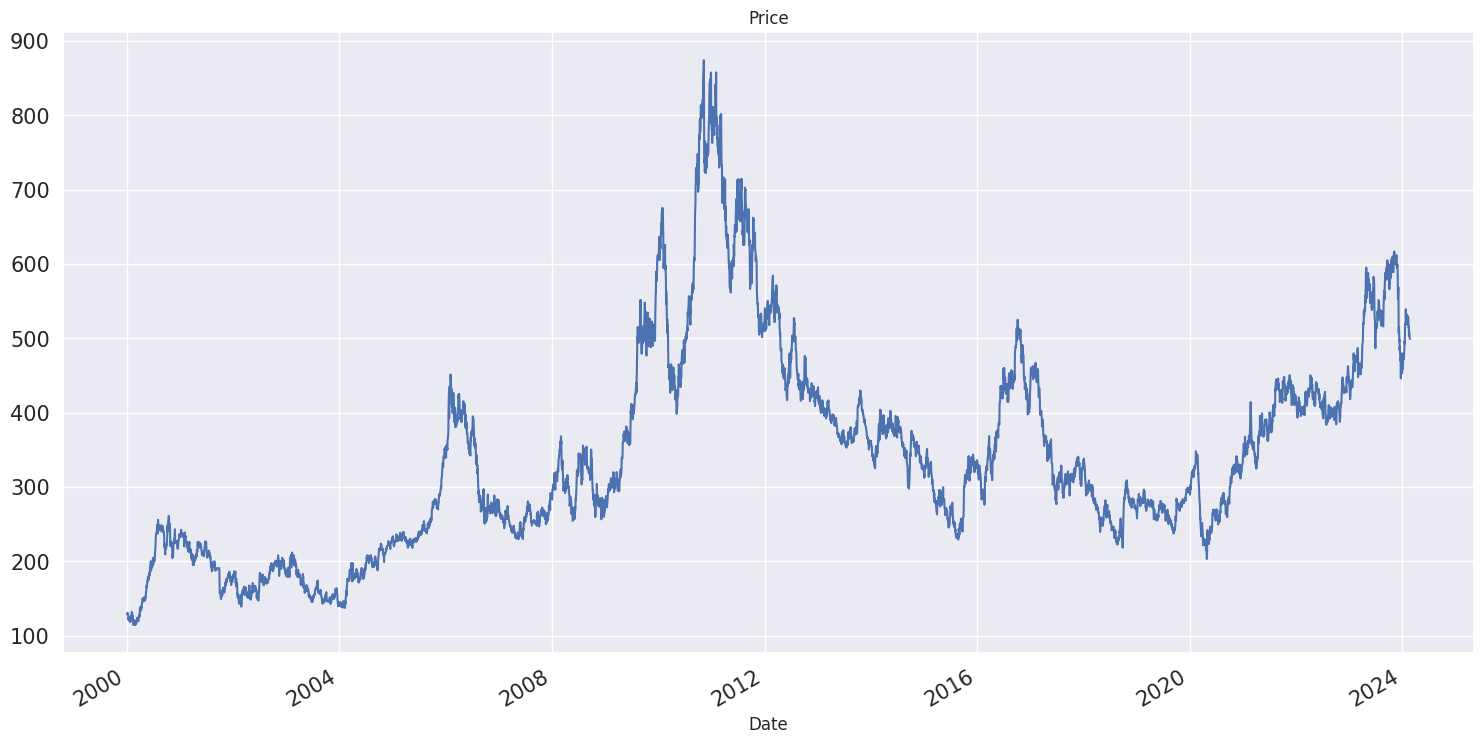

In [ ]:
for i in range(1,len(dataframe.columns)+1):
    plt.subplot(7,1,i)
    dataframe[dataframe.columns[i-1]].plot(title = '{}'.format(dataframe.columns[i-1]),fontsize=15, figsize=(15,50) )
plt.tight_layout()

In [ ]:
dataframe.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Price
Date                
2024-02-14  515.0748
2024-02-15  502.9528
2024-02-16  508.6832
2024-02-20  501.4100
2024-02-21  498.9856

### 3. Preprocess the dataset for training

#### Missing Data

In [ ]:
# Check for Missing Values in each Column
dataframe.isnull().sum()

Price    0
dtype: int64

#### Stationary Test for the Closing Price as it is the Target

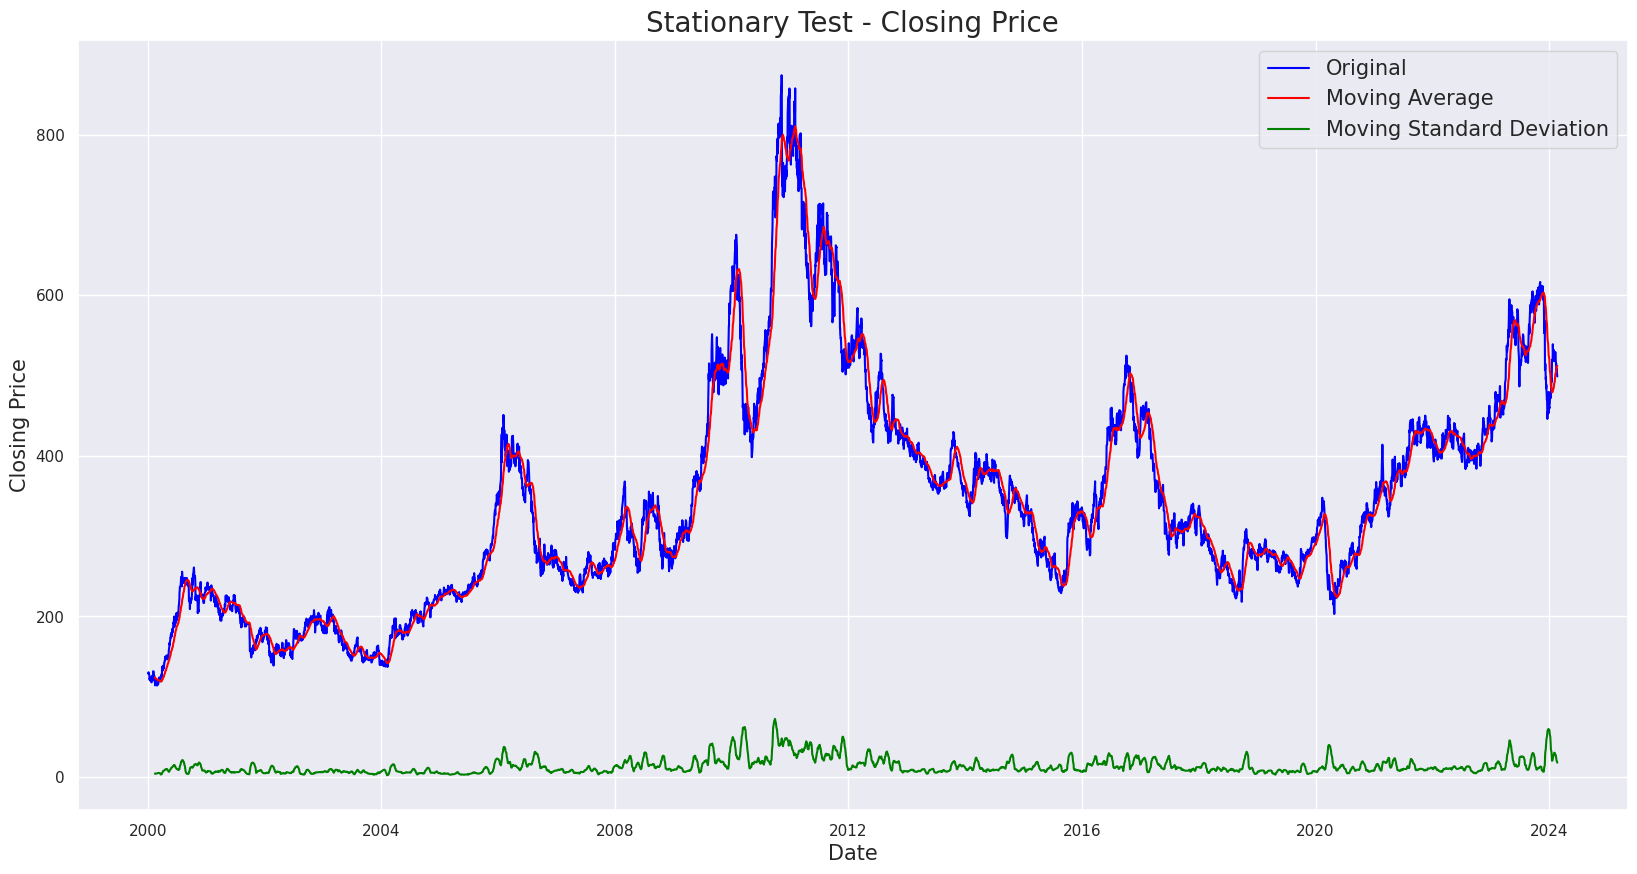

In [ ]:
window_days = 30 # 30 days per month)
plt.figure(figsize=(20,10))
plt.plot(dataframe['Price'],color='blue',label='Original')
plt.plot(dataframe['Price'].rolling(window_days).mean(),color='red',label='Moving Average')
plt.plot(dataframe['Price'].rolling(window_days).std(),color='green',label='Moving Standard Deviation')
plt.legend(loc='best',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Stationary Test - Closing Price',fontsize=20)
plt.show()

The Data is irregular and therefore it is non stationary.

### Split Training, Validation and Testing Dataset

The Training,Validation and Testing Datasets are split on the basis of Time Period are

|   Dataset  |         Time Period         |
|:----------:|:---------------------------:|
|  training  | '2019-04-22' - '2019-12-01' |
| validation | '2019-12-02' - '2020-02-10' |
|   testing  | '2020-02-11' - '2020-04-22' |

In [ ]:
# period1 = '2014-06-02'
# period2 = '2019-03-17'
# training = dataframe.loc[(dataframe.index <= period1)]
# validation =  dataframe.loc[(dataframe.index > period1)&(dataframe.index <= period2)]
# testing =  dataframe.loc[(dataframe.index > period2)]
# print('Training Data Shape - ',training.shape)
# print('Validation Data Shape - ',validation.shape)
# print('Testing Data Shape - ',testing.shape)

In [ ]:
period1 = '2022-12-31'
period2 = '2023-01-01'
training = dataframe.loc[(dataframe.index <= period1)]
# validation =  dataframe.loc[(dataframe.index > period1)&(dataframe.index <= period2)]
testing =  dataframe.loc[(dataframe.index > period2)]
print('Training Data Shape - ',training.shape)
# print('Validation Data Shape - ',validation.shape)
print('Testing Data Shape - ',testing.shape)

Training Data Shape -  (5781, 1)
Testing Data Shape -  (284, 1)


In [ ]:
training.tail()

Price
Date                  
2022-12-23  462.529276
2022-12-27  447.978784
2022-12-28  444.451392
2022-12-29  447.317398
2022-12-30  441.805848

In [ ]:
testing.tail()

Price
Date                
2024-02-14  515.0748
2024-02-15  502.9528
2024-02-16  508.6832
2024-02-20  501.4100
2024-02-21  498.9856

## Part II: Classical time series forecasting method

#### Filter only datasets taken every one hour

In [ ]:
# # Filter Data taken every hour

# new_df = pd.DataFrame()
# for i in range(dataframe.shape[0]):
#     d = dataframe.iloc[i]
#     t = dataframe.index[i].timetuple()
#     time = [t[4],t[5]] # Min,Sec
#     if time == [0,0]: # Start of Every Hour
#         new_df=new_df.append(d)

In [ ]:
# new_df.info()

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA # Depracted
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

### 1. Choose the features and targets in the dataset

In [ ]:
training_data_p1=dataframe.loc[(dataframe.index <= period2)]
train_data = training_data_p1['Price']
test_data = testing['Price']
print('Training Data Shape -', train_data.shape)
print('Testing Data Shape -', train_data.shape)

Training Data Shape - (5781,)
Testing Data Shape - (5781,)


* For our model we take the Closing price as the Target and perform the univariate analysis of it.

### 2. Apply statistical algorithms

## ARIMA Model
* We perform the univaritate analysis of using the ARIMA model of the closing price of bitcoins
* We perform the rolling ARIMA forecasting as it is required based on the dependencies of the observations in prior time steps for differencing and the AR model.
* We perform this rolling forecast is to re-create the ARIMA model after each new observation is received.
* We append all the observations to a history list that is seeded with the training data and to which new observations are appended each iteration.


The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q)

* For our model we take the Closing price as the Target and perform the univariate analysis of it.
* First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.
* We use the forecast funtion to make a one step prediction

In [ ]:
#rolling ARIMA FORECAST
history = [x for x in train_data]
arima_predictions=[]
for i in range(len(test_data)):
    arima = ARIMA(history, order=(5,1,0)).fit()
    output = arima.forecast()
    arima_predictions.append(output[0])
    history.append(test_data[i])
    if i%100==0:
        print('Predicted=%f, Expected=%f' % (output[0], test_data[i]))

Predicted=441.548640, Expected=434.310140
Predicted=559.161718, Expected=558.430246
Predicted=600.707905, Expected=591.940470


In [ ]:
# #rolling ARIMA FORECAST
# history = [x for x in train_data]
# arima_predictions=[]
# for i in range(len(test_data)):
#     arima = ARIMA(history, order=(0,1,0)).fit()
#     output = arima.forecast()
#     arima_predictions.append(output[0])
#     history.append(test_data[i])
#     if i%100==0:
#         print('Predicted=%f, Expected=%f' % (output[0], test_data[i]))

Predicted=441.805848, Expected=434.310140
Predicted=559.312094, Expected=558.430246
Predicted=600.758950, Expected=591.940470


In [ ]:
# #rolling ARIMA FORECAST
# history = [x for x in train_data]
# arima_predictions=[]
# for i in range(len(test_data)):
#     arima = ARIMA(history, order=(0,1,0)).fit()
#     output = arima.forecast()
#     arima_predictions.append(output[0])
#     history.append(test_data[i])
#     if i%100==0:
#         print('Predicted=%f, Expected=%f' % (output[0], test_data[i]))

In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib

In [ ]:
from pmdarima.arima import auto_arima

# rolling ARIMA FORECAST
history = [x for x in train_data]
arima_predictions = []

# Fit the auto ARIMA model
auto_model = auto_arima(history, start_p=1, start_q=1,
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

for i in range(len(test_data)):
    # Fit ARIMA model with the selected parameters
    arima = ARIMA(history, order=auto_model.order).fit()

    # Forecast next value
    output = arima.forecast()

    # Append prediction to the list
    arima_predictions.append(output[0])

    # Update history with the actual value
    history.append(test_data[i])

    if i % 100 == 0:
        print('Predicted=%f, Expected=%f' % (output[0], test_data[i]))


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=40.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=43490.019, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=41734.899, Time=2.50 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=18.99 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=43484.054, Time=0.34 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=41046.693, Time=4.85 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=64.02 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=25.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=41049.286, Time=5.39 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=41047.815, Time=8.83 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=41048.016, Time=8.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=41046.579, Time=5.24 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=41734.778, Time=2.69 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=60.67 sec
 ARIMA(0,1,1)(1,1,1)[12]      

The above model runtime 18 mins

In [ ]:
len(test_data), len(arima_predictions)

(284, 284)

In [ ]:
arima_error = mean_squared_error(test_data, arima_predictions)
print('Test MSE: %.3f' % arima_error)

Test MSE: 93.589


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_predictions))
print('Test RMSE: %.3f' % arima_rmse)

# Calculate R2
arima_r2 = r2_score(test_data, arima_predictions)
print('Test R2: %.3f' % arima_r2)

Test RMSE: 9.674
Test R2: 0.966


* We calculate the Mean Squared Error between the Expected value and the value predictedd by the ARIMA model

<>:3: DeprecationWarning: invalid escape sequence '\D'


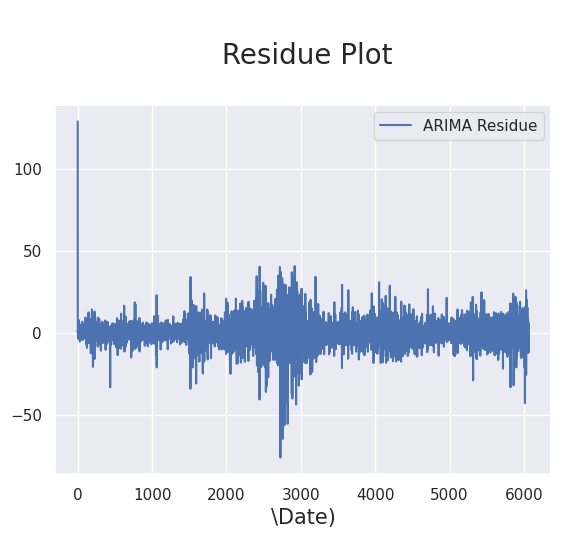

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


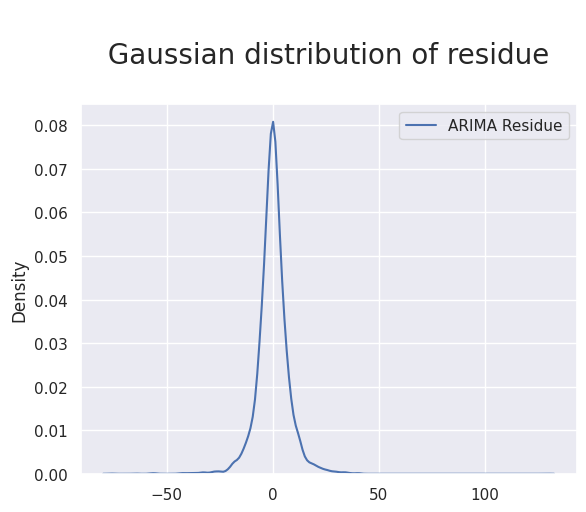

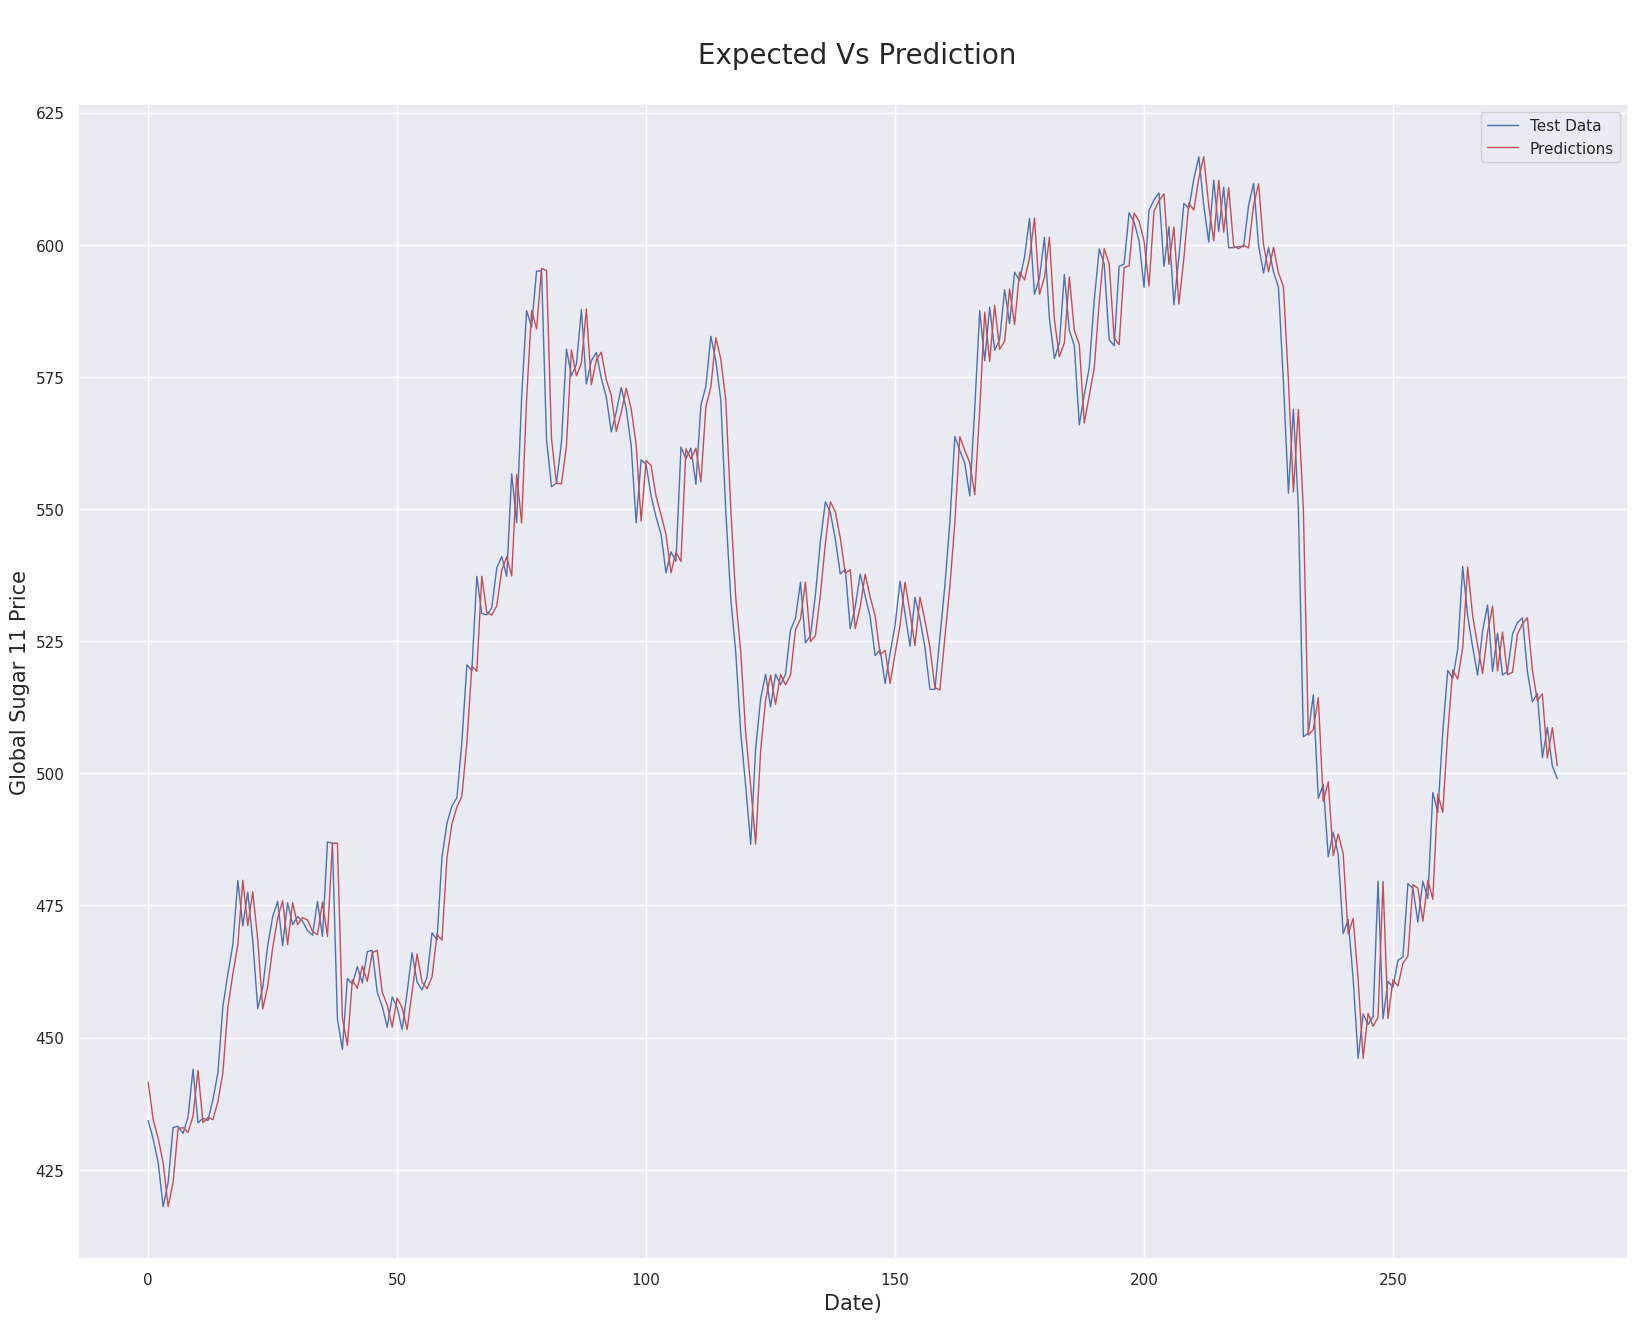

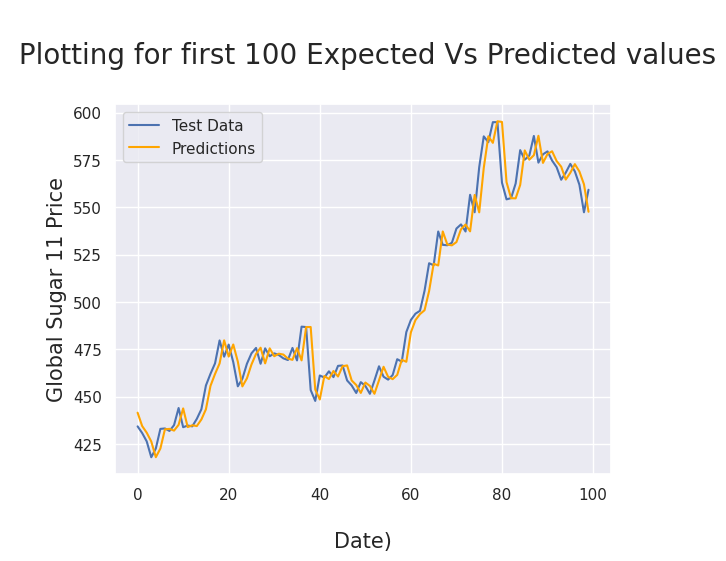

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


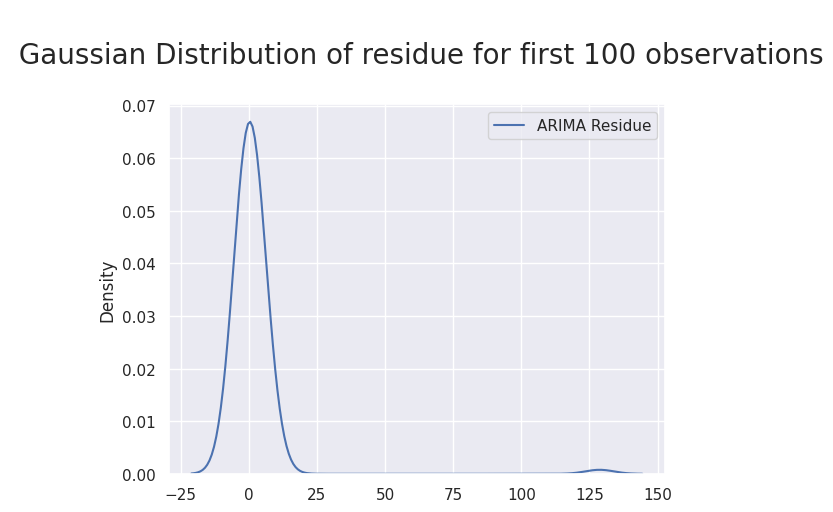

In [ ]:
# plots for ARIMA model
plt.title("\n Residue Plot\n", size=20)
plt.xlabel("\Date)",size=15)
plt.plot(arima.resid, label='ARIMA Residue')
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(arima.resid,label='ARIMA Residue')
plt.legend()
plt.show()
plt.figure(figsize=(20,15))
plt.title("\n Expected Vs Prediction\n", size=20)
plt.xlabel("Date)",size=15)
plt.ylabel("Global Sugar 11 Price",size=15)
plt.plot(test_data.tolist(),color='b',linewidth=1,label='Test Data')
plt.plot(arima_predictions,color='r',linewidth=1,label='Predictions')
plt.legend()
plt.show()
pred=[]
tes=[]
res=[]
for i in range(0,100):
    pred.append(arima_predictions[i])
    tes.append(test_data[i])
    res.append(arima.resid[i])
plt.title("\n Plotting for first 100 Expected Vs Predicted values\n", size=20)
plt.plot(tes,color='b',label="Test Data")
plt.plot(pred,color='orange', label= 'Predictions')
plt.xlabel("\nDate)",size=15)
plt.ylabel("Global Sugar 11 Price",size=15)
plt.legend()
plt.show()
plt.title("\n Gaussian Distribution of residue for first 100 observations\n", size=20)
sns.kdeplot(res,label='ARIMA Residue')
plt.legend()
plt.show()

* We plot the residue of the model and also show the gaussian distribution of the residue.
* Since the Expected Vs Predicted graph of the slightly overlapping, we plot a reduced version of it by only considering the first 100 values of the expected & predicted values so as to get a Clear Visuvalization

In [ ]:
# Create a date range for the forecasted period (30 days per month for 12 months)
# forecast_dates = pd.date_range(start='2023-11-25', end='2024-07-30')
forecast_dates = pd.date_range(start='2024-01-30', end='2025-03-01', freq='B')
# start='2021-01-01', end='2024-04-20
# # Define the start and end dates
# start_date = '2022-09-01'
# end_date = '2027-04-15'

# # Generate business days (weekdays) between start and end dates
# forecast_dates = pd.date_range(start=start_date, end=end_date, freq='B')

# Combine forecasted dates with forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': arima_predictions}) # The forecast dates and arima predictions length should be the same.

# Print the forecast DataFrame
print(forecast_df)


          Date    Forecast
0   2024-01-30  441.883716
1   2024-01-31  434.416893
2   2024-02-01  430.833633
3   2024-02-02  426.435719
4   2024-02-05  418.112612
..         ...         ...
279 2025-02-24  513.612807
280 2025-02-25  515.054637
281 2025-02-26  503.120332
282 2025-02-27  508.605095
283 2025-02-28  501.511901

[284 rows x 2 columns]


In [ ]:
print('ARIMA predictions length:', len(arima_predictions), 'Forecast Dates length:', len(forecast_dates))

ARIMA predictions length: 284 Forecast Dates length: 284


In [ ]:
print(forecast_df.tail(90))

           Date    Forecast
1116 2024-01-22  515.769228
1117 2024-01-23  525.646291
1118 2024-01-24  535.256324
1119 2024-01-25  547.312732
1120 2024-01-26  563.691037
...         ...         ...
1201 2024-04-16  446.077350
1202 2024-04-17  454.559602
1203 2024-04-18  452.142430
1204 2024-04-19  453.833217
1205 2024-04-20  479.520033

[90 rows x 2 columns]


In [ ]:
forecast_df[1090:1105]

Date    Forecast
1090 2023-12-27  524.912711
1091 2023-12-28  526.044211
1092 2023-12-29  533.738854
1093 2023-12-30  543.464385
1094 2023-12-31  551.374783
1095 2024-01-01  549.503270
1096 2024-01-02  544.500901
1097 2024-01-03  537.841426
1098 2024-01-04  538.515039
1099 2024-01-05  527.373920
1100 2024-01-06  531.486418
1101 2024-01-07  537.689839
1102 2024-01-08  533.323194
1103 2024-01-09  529.794850
1104 2024-01-10  522.436807

In [ ]:
forecast_df.to_excel('Predicted_Price_Global_Sugar_11_Feb_21_2024_1.xlsx')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


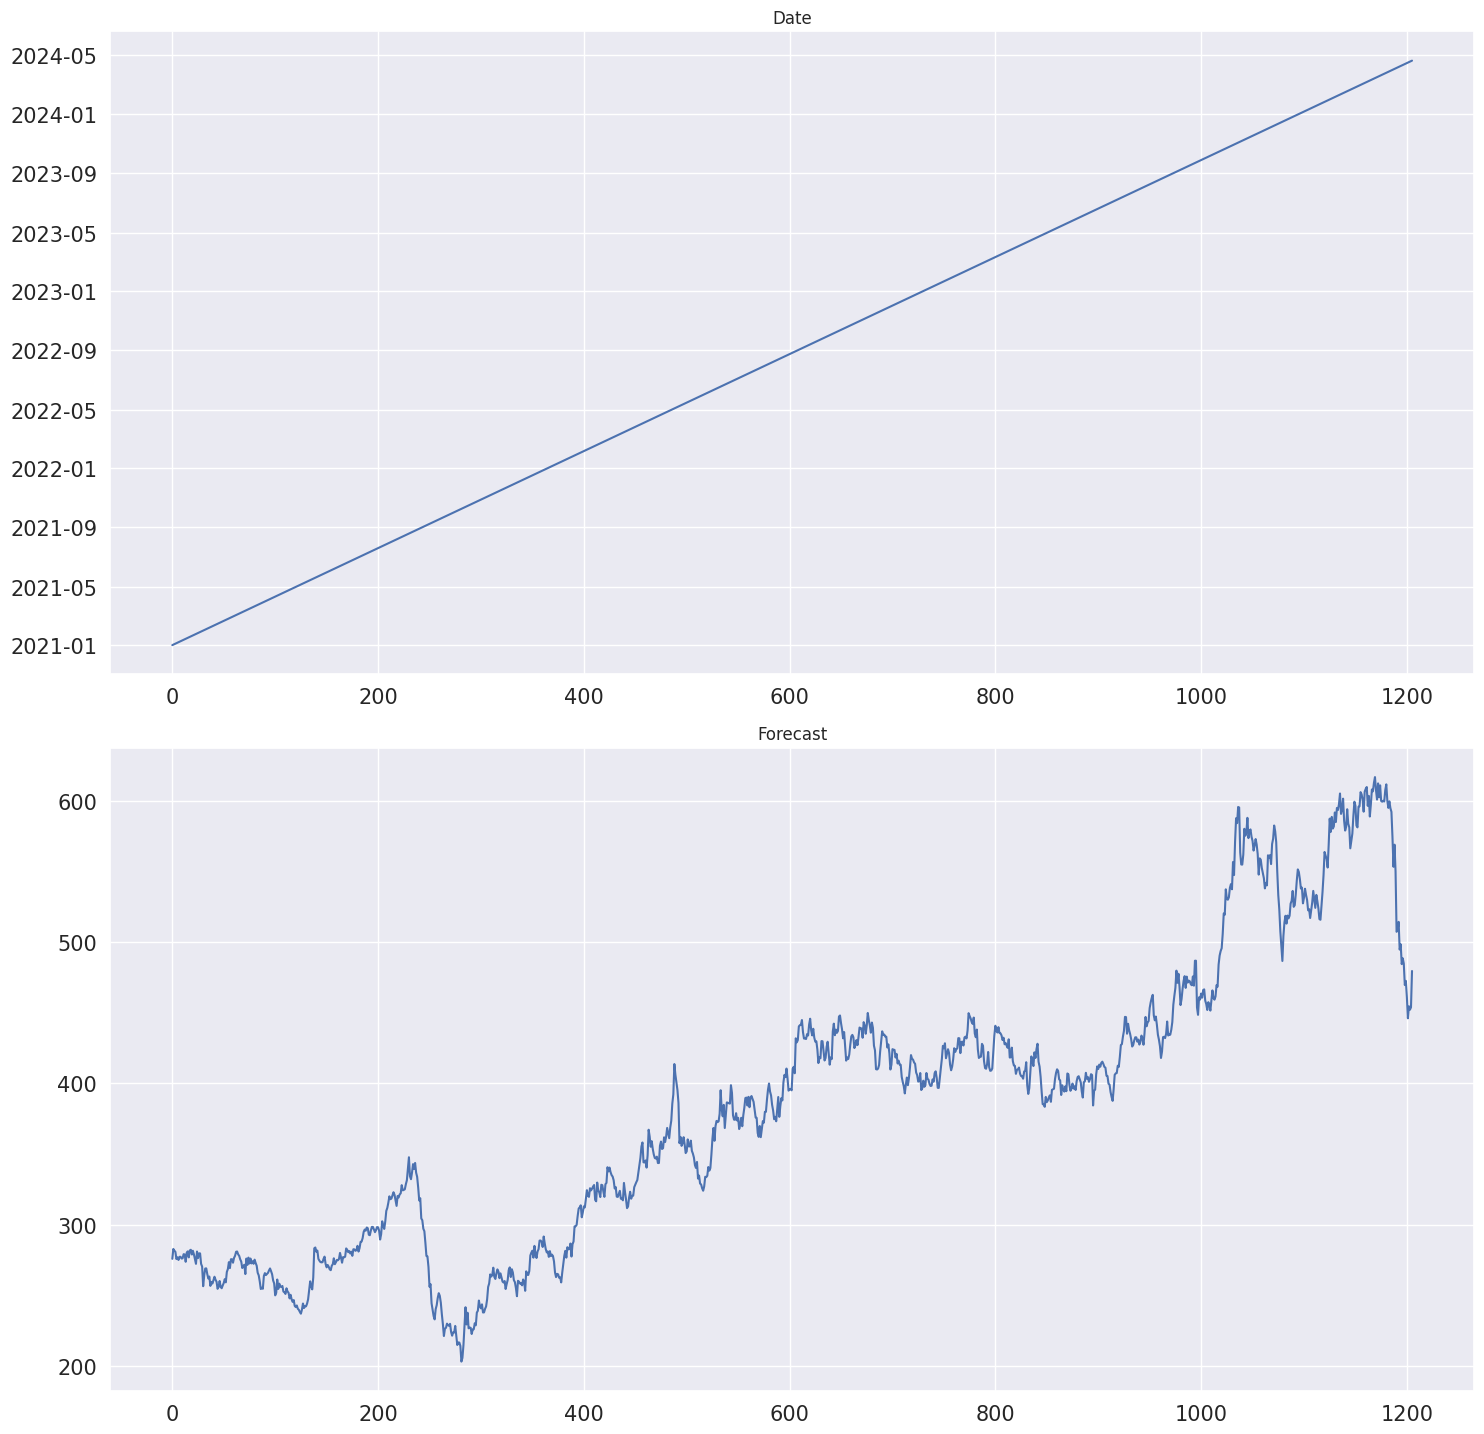

In [ ]:
predicted_dataframe = pd.read_excel("/content/Predicted_Price_Global_Sugar_11_Feb_13_2024.xlsx",index_col=0)

for i in range(1,len(predicted_dataframe.columns)+1):
    plt.subplot(7,1,i)
    predicted_dataframe[predicted_dataframe.columns[i-1]].plot(title = '{}'.format(predicted_dataframe.columns[i-1]),fontsize=15, figsize=(15,50) )
plt.tight_layout()

In [ ]:
predicted_dataframe.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date    Forecast
0 2021-01-01  275.975356
1 2021-01-02  282.957275
2 2021-01-03  281.741038
3 2021-01-04  280.909368
4 2021-01-05  275.830724

In [ ]:
original_data = pd.read_excel('/content/global_brown_sugar11_data_feb_09_2024.xlsx', index_col=0)

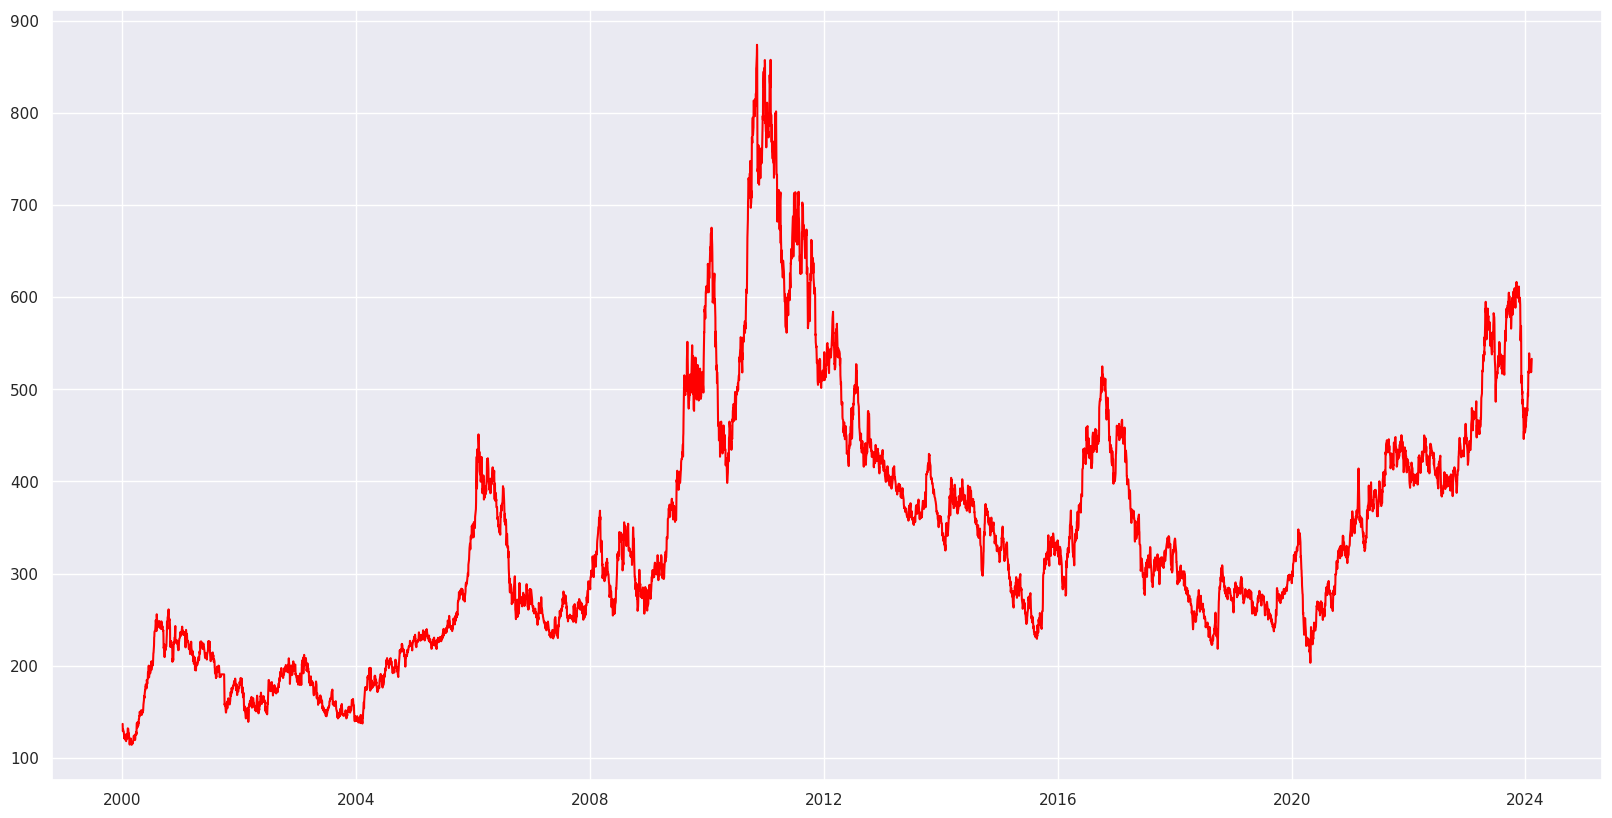

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(original_data['Price'],color='red',label='Original');

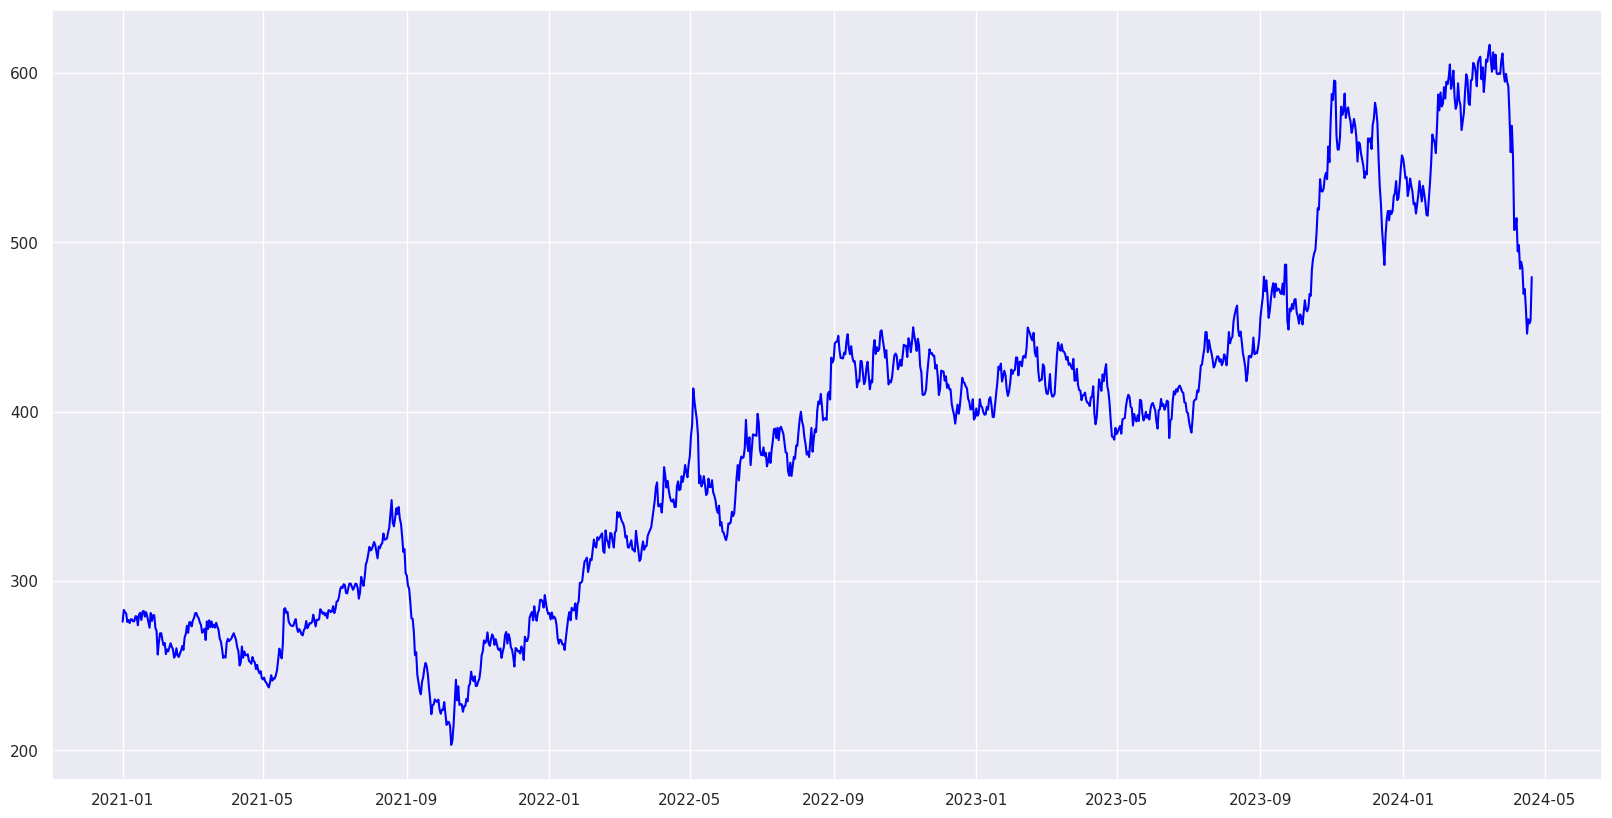

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(predicted_dataframe['Date'],predicted_dataframe['Forecast'],color='blue',label='Predicted Values')

In [ ]:
# window_days = 30 # 30 days per month)
# plt.figure(figsize=(20,10))
# plt.plot(original_data['Price'],color='red',label='Original')
# plt.plot(predicted_dataframe['Forecast'],color='blue',label='Predicted Values')
# # plt.plot(dataframe['Price'].rolling(window_days).std(),color='green',label='Moving Standard Deviation')
# plt.legend(loc='best',fontsize=15)
# plt.xlabel('Date',fontsize=15)
# plt.ylabel('Closing Price',fontsize=15)
# plt.title('Original Price - Predicted Price',fontsize=20)
# plt.show()

In [ ]:
predicted_dataframe.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date    Forecast
1201 2024-04-16  446.077350
1202 2024-04-17  454.559602
1203 2024-04-18  452.142430
1204 2024-04-19  453.833217
1205 2024-04-20  479.520033

# Run the below only

## SARIMA Model
* Since we are not using the exteranl data, we implement the SARIMA Model and perform the univariate analysis
* The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMAX(order=(p, d, q),seasonal_order=(P, D, Q, M) where "M" is the number of time steps in each season (the seasonal period).

We can use these values for M,
* 1 for yearly
* 4 for quarterly
* 12 for monthly
* 52 for weekly
* 365 for daily


In [ ]:
# SARIMA Model using SARIMAX
sarima = SARIMAX(train_data, order=(1,1,1),seasonal_order=(1,1,1,12)).fit()

In [ ]:
# SARIMA Model using SARIMAX
sarima = SARIMAX(train_data, order=(5,1,0),seasonal_order=(1,1,1,12)).fit()

* We use the predict function to predict multiple stpes by giving the start date and end date

In [ ]:
sarima_predictions=[]
start_date='2014-06-02'
end_date='2019-03-15'
sarima_predictions=sarima.predict(start_date,end_date)

In [ ]:
print(sarima.summary())

In [ ]:
pred=[]
for i in range(len(test_data)):
    pred.append(sarima_predictions[i])
    if i%100==0:
        print('Predicted=%f, Expected=%f' % (pred[i], test_data[i]))

* We calculate the mean squared error between the expected values and the values predicted by the the SARIMA model.

In [ ]:
sarima_error = mean_squared_error(test_data, pred)
print('Test MSE: %.3f' % sarima_error)

* We see that this value is very high than that of the ARIMA model, this is due to the seasonality, we predict values at monthly seasonal interval. Therefore the mean square error has not much significance at this place

In [ ]:
# plots for SARIMA model
plt.title("\n Residue Plot\n", size=20)
plt.plot(sarima.resid, label='SARIMA Residue')
plt.xlabel("\nDays",size=15)
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(sarima.resid,label='SARIMA Residue')
plt.legend()
plt.show()
plt.title("\n SARIMA predictions (Monthly Seasonality) \n", size=20)
plt.xlabel("\nDays",size=15)
plt.ylabel("Global Sugar 11 Price",size=15)
plt.plot(sarima_predictions,color='r',linewidth=1,label='Monthly Seasonality Predictions ')
plt.legend()
plt.show()

## Observation
* From the predictions graph we can observe that the closing prices over the season is Linear.

## VAR Model
* It is the generalization of AR to multiple parallel time series such as multivariate time series.
* The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

In [ ]:
new_train=[]
new_test=[]
c1=training_data_p1['Open']
c2=training_data_p1['Close']
c3=testing['Open']
c4=testing['Close']
for i in range(len(training_data_p1)):
    col1=c1[i]
    col2=c2[i]
    row1=[col1,col2]
    new_train.append(row1)
for i in range(len(testing)):
    col3=c3[i]
    col4=c4[i]
    row2=[col3,col4]
    new_test.append(row2)

In [ ]:
var_hist=[x for x in new_train]
var_predictions=[]

* We use the forcast and use steps=1 to predict the next step, as the ARIMA model we perfrom the rolling forecast.
* Inorder to perform the multivariate analysis we consider the opening values and the closing values as our two variables in discussion and we analyse the correlation between them and predict them, thus, performing a bivariate analysis

In [ ]:
for i in range(len(new_test)):
    var=VAR(var_hist).fit()
    output = var.forecast(var.y,steps=1)
    var_predictions.append(output)
    var_hist.append(new_test[i])

In [ ]:
print(var.summary())

In [ ]:
# plots for VAR model
var_p= list(zip(*var_predictions))
plt.title("\n Residue Plot\n", size=20)
plt.plot(var.resid, label='VAR model Residue')
plt.legend()
plt.show()
plt.title("\n Gaussian distribution of residue \n", size=20)
sns.kdeplot(var.resid, label='VAR Residue')
plt.legend()
plt.show()
plt.title("\n Expected\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(new_test,color='b',linewidth=1,label='Test data')
plt.legend()
plt.show()
plt.title("\n Predicted\n", size=20)
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.plot(var_p[0],color='r',linewidth=1, label='VAR predictions')
plt.legend()
plt.show()

* We plot the residue of the model and also show the gaussian distribution of the residue.
* From the expectation and prediction graphs we can say that there is slight shift in the prediction, this can be attributed to the correlation between the opening and closing values.

# Comparing the Algorithms

In [ ]:
plt.figure(figsize=(15,5))
plt.title("\n Comapring the predictions for Closing values of the 3 algorithms", size=20)
plt.plot(arima_predictions, label='ARIMA', color='b')
plt.plot(sarima_predictions.tolist(), label='SARIMA', color='r')
plt.plot(list(var_p[0]), label='VAR', color='orange')
plt.xlabel("\nDays x Time (1 day * 24 hours=24)",size=15)
plt.ylabel("Closing Price",size=15)
plt.legend()
plt.show()

## Observation
* From the comparison graph we can observe that the ARIMA and VAR models produce the similar results, but the VAR model has a very slight shift to the expected values due to the correlation between the opening and closing values. The output of the SARIMA model is a seasonal value whcih is linearly increasing over the season.

## Part III: Deep learning time series forecasting methods

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, LeakyReLU, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Binary Classification Problem
* In this training model we will design a model to classify whether at the given window of Bitcoin prices and forcast whether it's price will increase or not after the given forcast period.
* We will be generating a Training/Testing dataset which will have have the prices from current date to the previous prices within the given window period as the feature set and it is the Input Data.
* For the Target we will be generating a set of forcast period ahead Closing Price as the output.

### 1. Apply MLP to predict the value. Show the results on 3 different MLP setups

### Generating Training/Testing data for forcasting whether Closing Price will go up or down 7 days ahead

#### Filter only datasets taken every one hour

In [ ]:
# Filter Data taken every hour

new_df = pd.DataFrame()
for i in range(dataframe.shape[0]):
    d = dataframe.iloc[i]
    t = dataframe.index[i].timetuple()
    time = [t[4],t[5]] # Min,Sec
    if time == [0,0]: # Start of Every Hour
        new_df=new_df.append(d)

In [ ]:
new_df.info()

In [ ]:
window_days = 10
window = window_days*24 # Days Multiplied by 24 hours per day
forecast = 7

#### Generate Dataset for Classification problem

In [ ]:
X = np.array(new_df['Close'])
X_new = []
Y_new = []
for i in range(new_df.shape[0]):
    try:
        x = X[i:i+window]
        forcast = X[i+window+forecast]
        y = [0,0]
        if x[window-1] > forcast: #Compare Forcast Period Ahead Price
            # Hot Encoding Target
            y = [0,1] #Decrease
        else:
            y=[1,0] #Increase
        X_new.append(x)
        Y_new.append(y)
    except Exception as e:
        break
X_new= np.array(X_new)
Y_new = np.array(Y_new)
print('X',X_new.shape)
print('Y',Y_new.shape)

In [ ]:
from sklearn.model_selection import train_test_split
# Split and Shuffle the Data
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.3, random_state=42)
print('Xtrain Shape',X_train.shape)
print('Ytrain Shape',y_train.shape)
print('Xtest Shape',X_test.shape)
print('Ytest Shape',y_test.shape)

#### Normalizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.fit_transform(X_test)

### Model 1

In [ ]:
model1 = Sequential()

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
model1.add(BatchNormalization())
# model1.add(Dropout(0.3))

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
# model1.add(BatchNormalization())
# model1.add(Dropout(0.3))

model1.add(Dense(240, activation='sigmoid', input_dim=X_train.shape[1]))
model1.add(Dropout(0.3))

model1.add(Dense(2, activation='softmax')) # softmax for probability distribution
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=1000,
          batch_size=1000)

In [ ]:
model1.summary()
print('Training Accuracy-',history1.history['accuracy'][-1])
print('Testing Accuracy-',history1.history['val_accuracy'][-1])

### Model 2

In [ ]:
model2 = Sequential()

model2.add(Dense(240, activation='relu', input_dim=X_train.shape[1]))
model2.add(BatchNormalization())

model2.add(Dense(240, activation='relu'))

model2.add(Dense(240, activation='relu'))
# model2.add(Dropout(0.3))

model2.add(Dense(2, activation='softmax')) # softmax for probability distribution
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=1000,
          batch_size=1000)

In [ ]:
print(model2.summary())
print('Training Accuracy-',history2.history['accuracy'][-1])
print('Testing Accuracy-',history2.history['val_accuracy'][-1])

### Model 3

In [ ]:
model3 = Sequential()
model3.add(Dense(240, activation='relu', input_dim=X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(2, activation='softmax')) # softmax for probability distribution
model3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=1000,
          batch_size=1000)

In [ ]:
model3.summary()
print('Training Accuracy-',history3.history['accuracy'][-1])
print('Testing Accuracy-',history3.history['val_accuracy'][-1])

### 2. LSTM architecture to predict the value.

In [ ]:
from keras.layers import LSTM
from time import time

In [ ]:
X_train, X_test = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)), np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# y_train, y_test = np.reshape(y_train,(y_train.shape[0],y_train.shape[1],1)), np.reshape(y_test,(y_test.shape[0],y_test.shape[1],1))

In [ ]:
print('(X_train shape,y_train shape) ->',X_train.shape,y_train.shape)
print('(X_test shape,y_test shape) ->',X_test.shape,y_test.shape)

In [ ]:
lstm = Sequential()
lstm.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(BatchNormalization())
# lstm.add(Dropout(0.5))
lstm.add(LSTM(128, return_sequences=True))
lstm.add(Dropout(0.5))
lstm.add(Flatten())
lstm.add(Dense(2, activation='softmax')) # softmax for probability distribution
lstm.add(Activation('softmax'))
print(lstm.summary())

##### Define a Keras Callback to Reduce the Learning rate during training when the metrics are becoming stagnant.

In [ ]:

ReduceLr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_lr=0.000001, verbose=1)


lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_lstm = lstm.fit(X_train, y_train,
               validation_data=(X_test, y_test),
               epochs=200,
               batch_size=800,
               callbacks=[ReduceLr])

In [ ]:
print('Training Accuracy-',history_lstm.history['accuracy'][-1])
print('Testing Accuracy-',history_lstm.history['val_accuracy'][-1])

### 3. Plot the Resultant Metric graphs

In [ ]:
def plot_results(history1,name):
    plt.figure(figsize=(15,7))
    plt.plot(history1.history['loss'],label='Training Loss')
    plt.plot(history1.history['val_loss'],label='Testing Loss')
    plt.legend(loc='best',fontsize=15)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('{} Loss'.format(name),fontsize=20)
    plt.show()
    plt.figure(figsize=(15,7))
    plt.plot(history1.history['accuracy'],label='Training accuracy')
    plt.plot(history1.history['val_accuracy'],label='Testing accuracy')
    plt.legend(loc='best',fontsize=15)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.title('{} Accuracy'.format(name),fontsize=20)
    plt.show()

### MLP Models

In [ ]:
plot_results(history1,'Model 1')
plot_results(history2,'Model 2')
plot_results(history3,'Model 3')

#### LSTM Model

In [ ]:
plot_results(history_lstm,'LSTM Model')

### 4. Discuss and provide the results of predicting the values using different deep learning structures.


In [ ]:
accuracies = [history1.history['accuracy'],history2.history['accuracy'],history3.history['accuracy'],history_lstm.history['accuracy']]
plt.figure(figsize=(15,7))
plt.figure(figsize=(10,5))
plt.plot(accuracies[0],label='MLP Model 1')
plt.plot(accuracies[1],label='MLP Model 2')
plt.plot(accuracies[2],label='MLP Model 3')
# plt.plot(accuracies[3],label='LSTM Model')
plt.ylabel('Training Accuracy')
plt.legend(loc='best',fontsize=15)
plt.xlabel('Epochs')
plt.title('Training Accuracies of MLP Models Used')
plt.show()

accuracies = [history1.history['val_accuracy'],history2.history['val_accuracy'],history3.history['val_accuracy'],history_lstm.history['val_accuracy']]
plt.figure(figsize=(15,7))
plt.figure(figsize=(10,5))
plt.plot(accuracies[0],label='MLP Model 1')
plt.plot(accuracies[1],label='MLP Model 2')
plt.plot(accuracies[2],label='MLP Model 3')
# plt.plot(accuracies[3],label='LSTM Model')
plt.ylabel('Testing Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best',fontsize=15)
plt.title('Testing Accuracies of MLP Models Used')
plt.show()

accuracies = [history1.history['accuracy'][-1],history2.history['accuracy'][-1],history3.history['accuracy'][-1],history_lstm.history['accuracy'][-1]]
plt.figure(figsize=(10,5))
plt.bar(['MLP Model 1','MLP Model 2','MLP Model 3','LSTM'],accuracies)
plt.ylabel('Training Accuracy')
plt.title('Training Accuracies of Models Used')
plt.show()

accuracies = [history1.history['val_accuracy'][-1],history2.history['val_accuracy'][-1],history3.history['val_accuracy'][-1],history_lstm.history['val_accuracy'][-1]]
plt.figure(figsize=(10,5))
plt.bar(['MLP Model 1','MLP Model 2','MLP Model 3','LSTM'],accuracies)
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracies of Models Used')
plt.show()

* The MLP Model 2 gives the highest Training Accuracy (99%) whereas its testing accuracy (72%) is the lowest. This is a result of over fitting the model.
* The MLP Model 1 gives the optimum Training Accuracy (98%) and the Testing Accuracy (77%) which is the highest.

#### Visualization of Binary Classification Prediction

In [ ]:
def plot_predict(prediction,name):
    p = prediction
    x = []
    x2 = []
    for i in range(p.shape[0]):
        x.append(p[i][0])
        x2.append(y_test[i][0])
    plt.figure(figsize=(20,10))
    plt.stem(x2,label='True - Increase Price Probability[0/1]',use_line_collection=True,linefmt='grey')
    plt.stem(x,label='Predicted - Increase Price Probability',markerfmt='D',linefmt='green',bottom=0.5,use_line_collection=True)
    plt.ylabel('Probability',fontsize=15)
    plt.xlabel('Timeframe',fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title('100 Predicted Binary Classification Probabilities - {}'.format(name),fontsize=20)
    plt.show()



In [ ]:
x = X_test.reshape(X_test.shape[0],X_test.shape[1])
plot_predict(model1.predict(x[0:100]),'MLP Model 1')
plot_predict(model2.predict(x[0:100]),'MLP Model 2')
plot_predict(model3.predict(x[0:100]),'MLP Model 3')
plot_predict(lstm.predict(X_test[0:100]),'LSTM Model')

* The above plot shows the probability plot [0-1] of the prediction that is if the price increases or not.
* Becasue of using the SoftMax activation we will be able to get the probability distribution of for the categorical classification problem.
* The MLP Models show better probabilities towards the true prediction compared with the LSTM, but generalization is better in LSTM Models.